In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import datetime

SELECT DataSavedTime, Item005 FROM HisItemCurr     WHERE DataSavedTime     BETWEEN '2019-10-18 13:56:30' and '2019-10-18 13:58:00' ORDER BY DataSavedTime ASC
              DataSavedTime  Item005
0   2019-10-18 13:56:30.000      NaN
1   2019-10-18 13:56:30.100      NaN
2   2019-10-18 13:56:30.200      NaN
3   2019-10-18 13:56:30.300      NaN
4   2019-10-18 13:56:30.400      NaN
..                      ...      ...
896 2019-10-18 13:57:59.600      NaN
897 2019-10-18 13:57:59.700      NaN
898 2019-10-18 13:57:59.800      NaN
899 2019-10-18 13:57:59.900      NaN
900 2019-10-18 13:58:00.000      NaN

[901 rows x 2 columns]
901


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


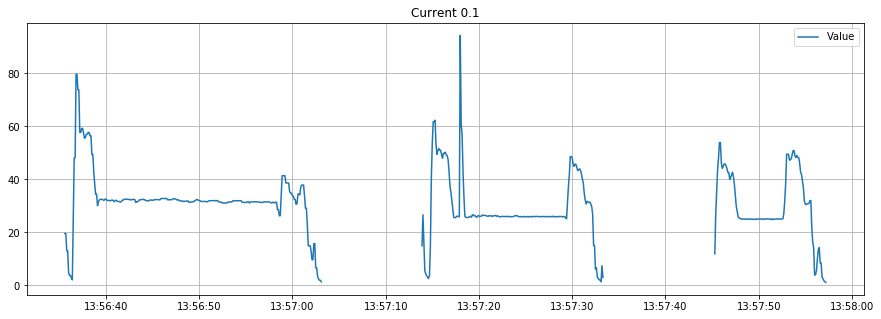

In [2]:
conn2 = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)
curs = conn2.cursor()

set_day1 = '2019-10-18 13:56:30'
set_day2 = '2019-10-18 13:58:00'


sql = "SELECT DataSavedTime, Item005 FROM HisItemCurr \
    WHERE DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime ASC"
print(sql)
curs.execute(sql)
rows=curs.fetchall()


data = list(rows)
df = pd.DataFrame(data)

df.columns = ['DataSavedTime', 'Item005']

print(df)
print(len(df))
conn2.close()

plt.figure(figsize=(15,5))
plt.plot(df['DataSavedTime'], df['Item005'], label="Value")
plt.legend(loc='best')
plt.title("Current 0.1")
plt.grid()
plt.show()

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf     WHERE DataSavedTime     BETWEEN '2019-11-20 08:37:20' and '2019-11-20 08:39:30' ORDER BY DataSavedTime ASC
               DataSavedTime  Item005
0    2019-11-20 08:37:20.000      NaN
1    2019-11-20 08:37:20.050      NaN
2    2019-11-20 08:37:20.100      NaN
3    2019-11-20 08:37:20.150    25.67
4    2019-11-20 08:37:20.200    25.67
...                      ...      ...
2596 2019-11-20 08:39:29.800      NaN
2597 2019-11-20 08:39:29.850      NaN
2598 2019-11-20 08:39:29.900      NaN
2599 2019-11-20 08:39:29.950      NaN
2600 2019-11-20 08:39:30.000      NaN

[2601 rows x 2 columns]
2601


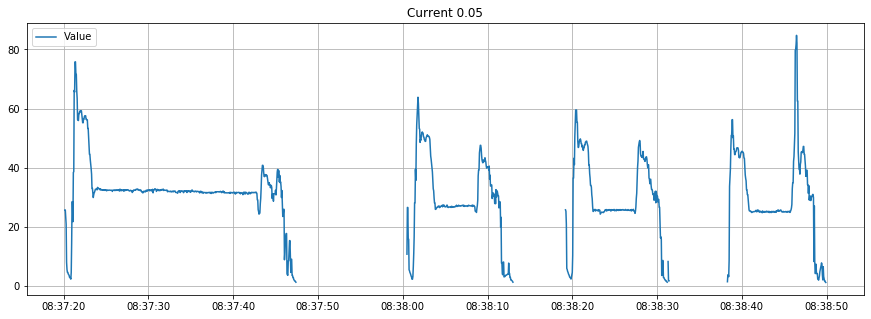

In [3]:
conn2 = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)
curs = conn2.cursor()

set_day1 = '2019-11-20 08:37:20'
set_day2 = '2019-11-20 08:39:30'


sql = "SELECT DataSavedTime, Item005 FROM HisItemCurrHalf \
    WHERE DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime ASC"
print(sql)
curs.execute(sql)
rows=curs.fetchall()


data = list(rows)
df = pd.DataFrame(data)

df.columns = ['DataSavedTime', 'Item005']

print(df)
print(len(df))
conn2.close()

plt.figure(figsize=(15,5))
plt.plot(df['DataSavedTime'], df['Item005'], label="Value")
plt.legend(loc='best')
plt.title("Current 0.05")
plt.grid()
plt.show()

### 10초 앞뒤로 찾기

In [10]:
conn = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)
curs = conn.cursor()

# set_day1 = '2019-10-18 07:00:00'
# set_day2 = '2019-11-20 15:39:30'

set_day1 = '2019-09-18 07:00:00'
set_day2 = '2019-10-18 06:59:59'

sql = "SELECT DataSavedTime, Item005 FROM HisItemCurr \
    WHERE DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' AND Item005 > 80 ORDER BY DataSavedTime ASC"

print(sql)
curs.execute(sql)
rows=curs.fetchall()


data = list(rows)
df = pd.DataFrame(data)

df.columns = ['DataSavedTime', 'Item005']

# print(df)
print(len(df))
conn.close()

df_date = list(df['DataSavedTime'])
# print(df_date)
prev_list = []
post_list = []

for date in df_date:
    prev = date - datetime.timedelta(seconds=10)
    post = date + datetime.timedelta(seconds=10)
    prev_list.append(prev)
    post_list.append(post)
    
    
df['prev'] = prev_list
df['post'] = post_list

# print(df)

SELECT DataSavedTime, Item005 FROM HisItemCurr     WHERE DataSavedTime     BETWEEN '2019-09-18 07:00:00' and '2019-10-18 06:59:59' AND Item005 > 80 ORDER BY DataSavedTime ASC
403


In [11]:
sqls = []

for i in range(len(df['DataSavedTime'])):
    sql = "SELECT DataSavedTime, Item005 FROM HisItemCurrHalf \
        WHERE DataSavedTime \
        BETWEEN '"+str(df['prev'][i])+"' and '"+str(df['post'][i])+"' ORDER BY DataSavedTime ASC"
    sqls.append(sql)

# print(sqls)

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 08:58:55.800000' and '2019-09-18 08:59:15.800000' ORDER BY DataSavedTime ASC


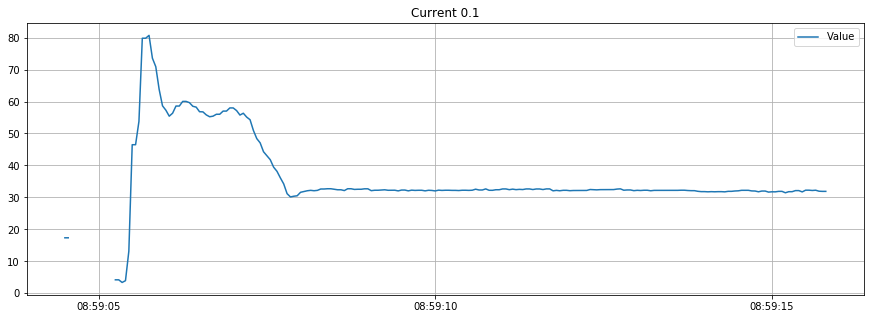

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:00:49.700000' and '2019-09-18 09:01:09.700000' ORDER BY DataSavedTime ASC


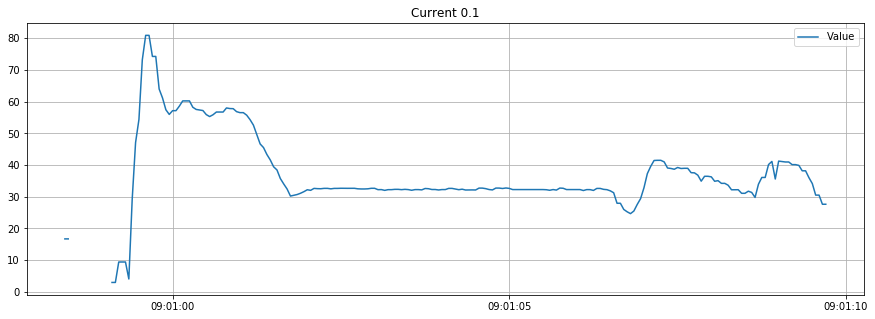

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:12:57.600000' and '2019-09-18 09:13:17.600000' ORDER BY DataSavedTime ASC


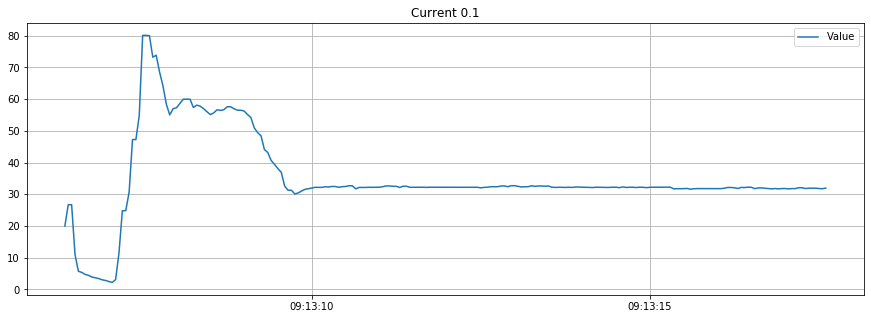

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:30:23.800000' and '2019-09-18 09:30:43.800000' ORDER BY DataSavedTime ASC


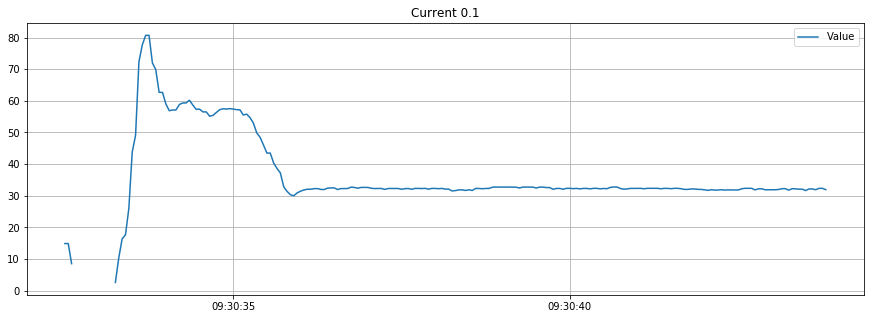

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:36:13.300000' and '2019-09-18 09:36:33.300000' ORDER BY DataSavedTime ASC


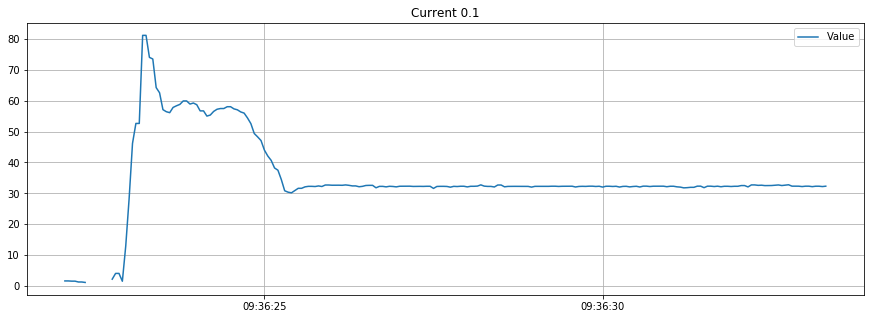

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:50:50.200000' and '2019-09-18 09:51:10.200000' ORDER BY DataSavedTime ASC


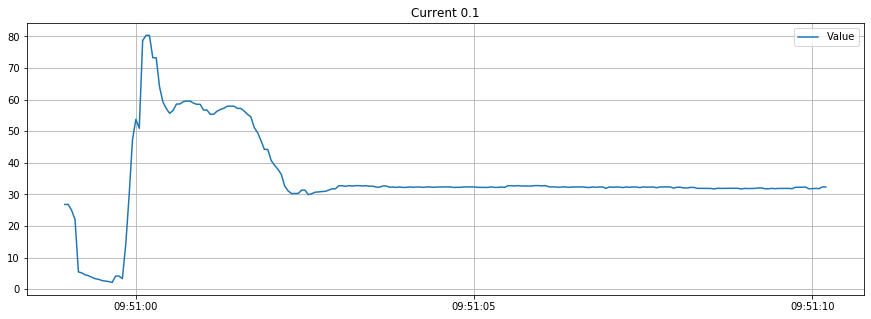

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:50:50.300000' and '2019-09-18 09:51:10.300000' ORDER BY DataSavedTime ASC


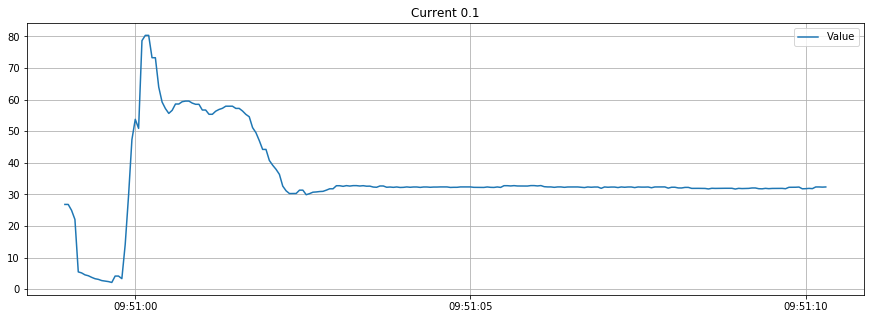

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:59:45.300000' and '2019-09-18 10:00:05.300000' ORDER BY DataSavedTime ASC


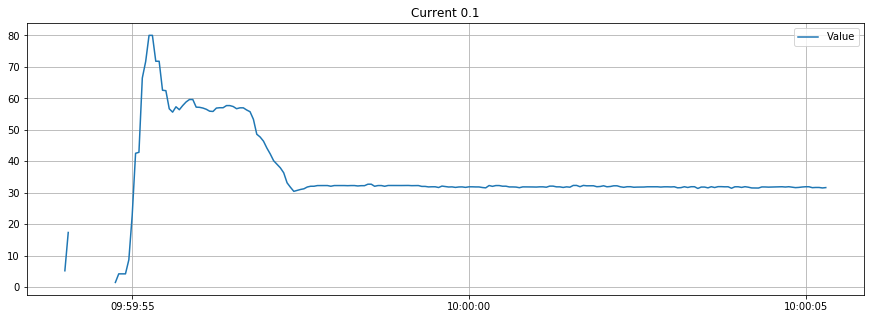

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 09:59:45.400000' and '2019-09-18 10:00:05.400000' ORDER BY DataSavedTime ASC


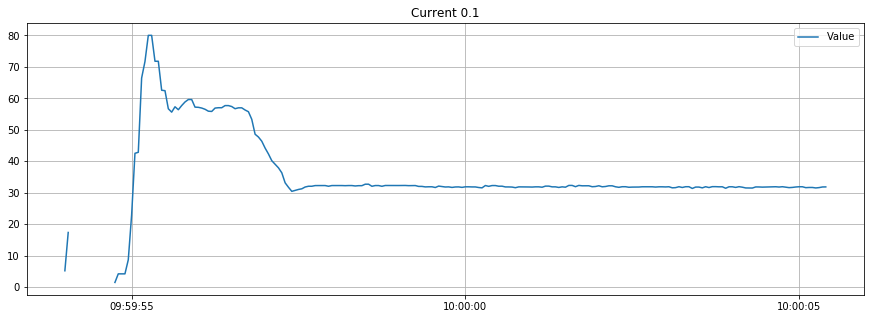

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 10:02:35.500000' and '2019-09-18 10:02:55.500000' ORDER BY DataSavedTime ASC


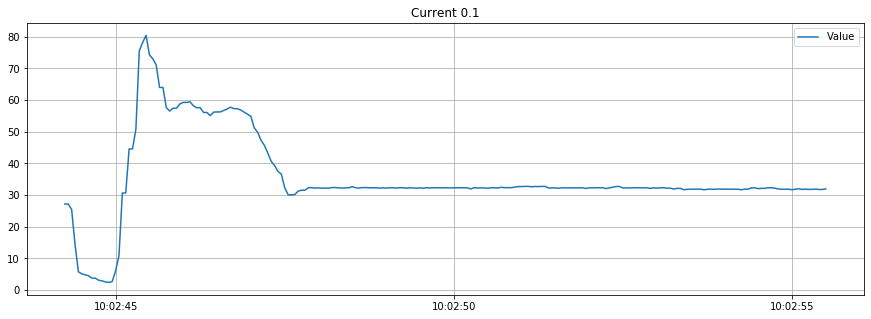

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 10:04:00.900000' and '2019-09-18 10:04:20.900000' ORDER BY DataSavedTime ASC


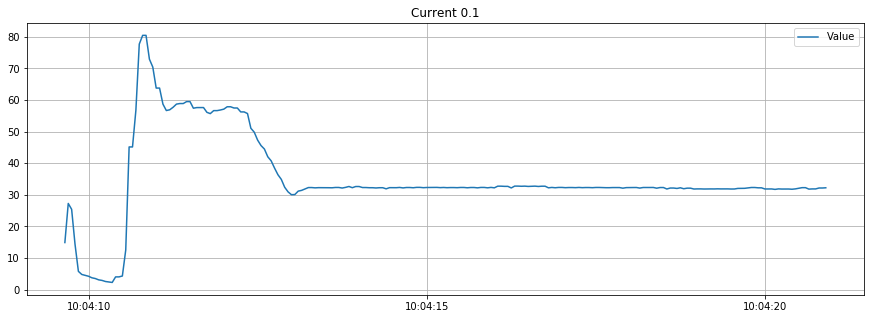

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 10:17:54.700000' and '2019-09-18 10:18:14.700000' ORDER BY DataSavedTime ASC


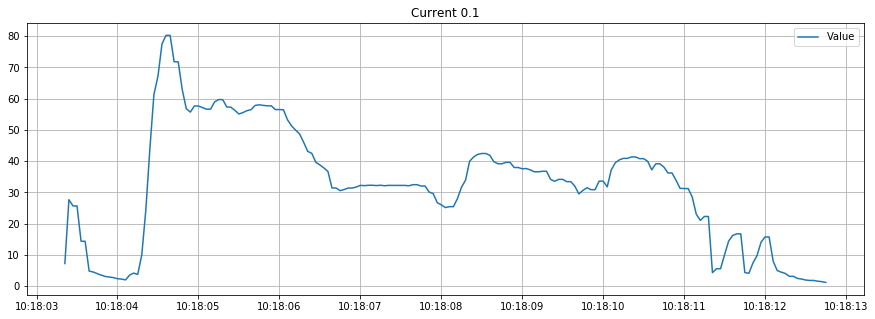

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 10:50:33.800000' and '2019-09-18 10:50:53.800000' ORDER BY DataSavedTime ASC


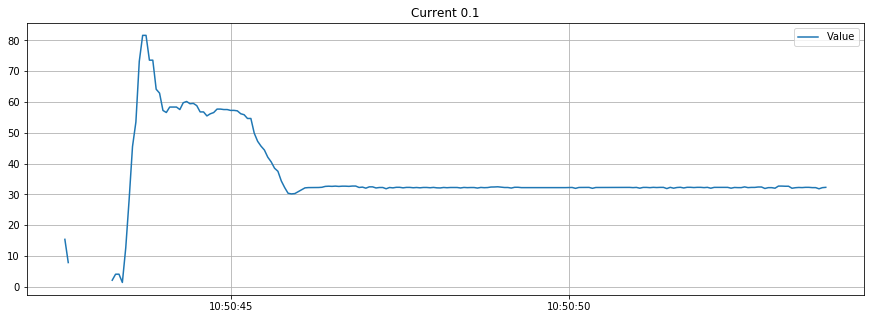

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 11:16:26.900000' and '2019-09-18 11:16:46.900000' ORDER BY DataSavedTime ASC


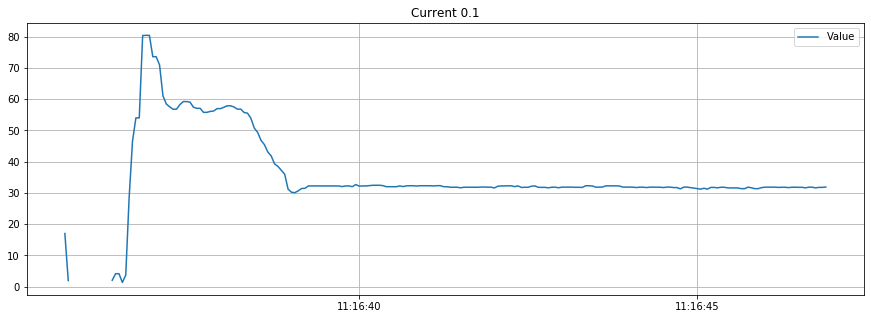

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 11:16:27' and '2019-09-18 11:16:47' ORDER BY DataSavedTime ASC


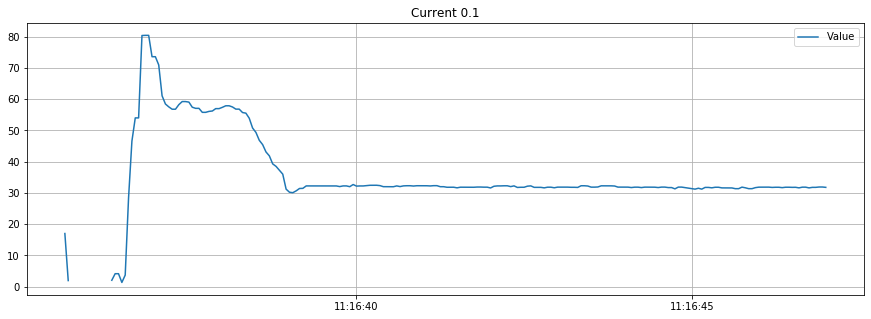

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 12:56:39.300000' and '2019-09-18 12:56:59.300000' ORDER BY DataSavedTime ASC


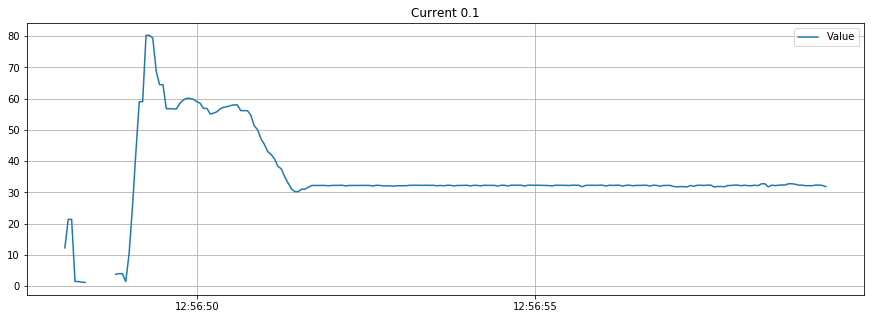

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 12:56:39.400000' and '2019-09-18 12:56:59.400000' ORDER BY DataSavedTime ASC


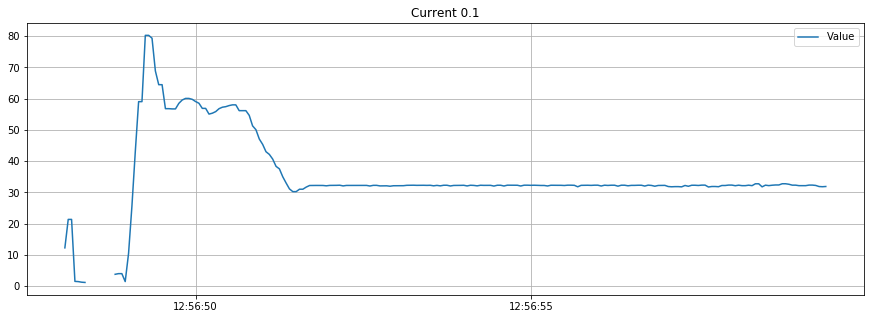

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 13:23:00.500000' and '2019-09-18 13:23:20.500000' ORDER BY DataSavedTime ASC


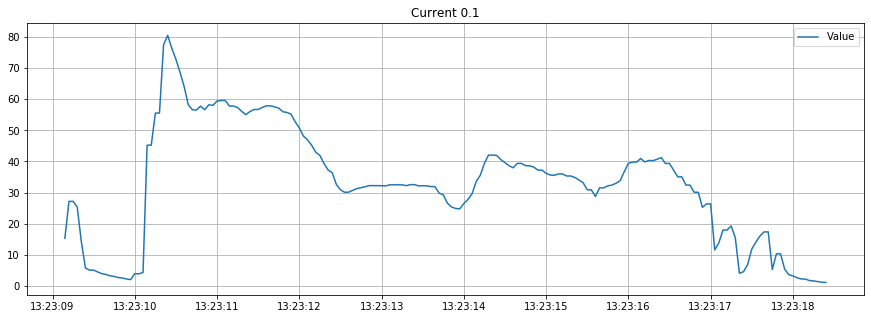

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 13:45:14.300000' and '2019-09-18 13:45:34.300000' ORDER BY DataSavedTime ASC


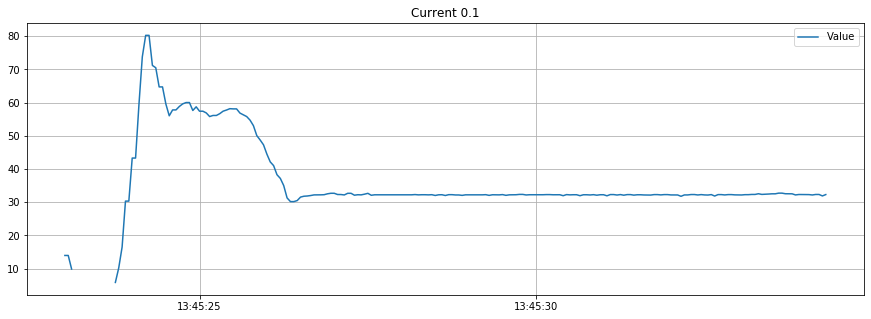

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 15:30:03' and '2019-09-18 15:30:23' ORDER BY DataSavedTime ASC


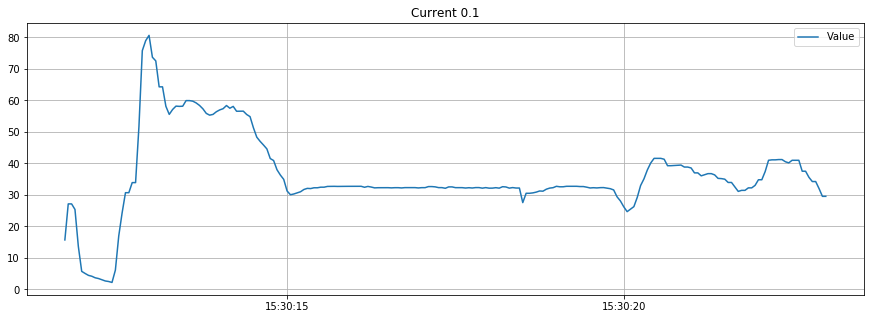

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 15:44:50.400000' and '2019-09-18 15:45:10.400000' ORDER BY DataSavedTime ASC


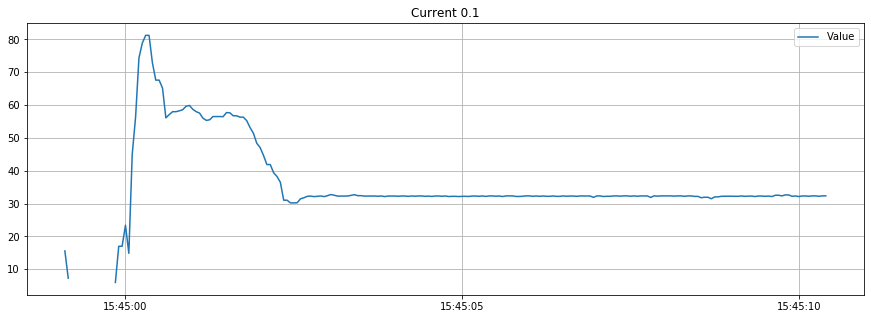

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 16:24:42' and '2019-09-18 16:25:02' ORDER BY DataSavedTime ASC


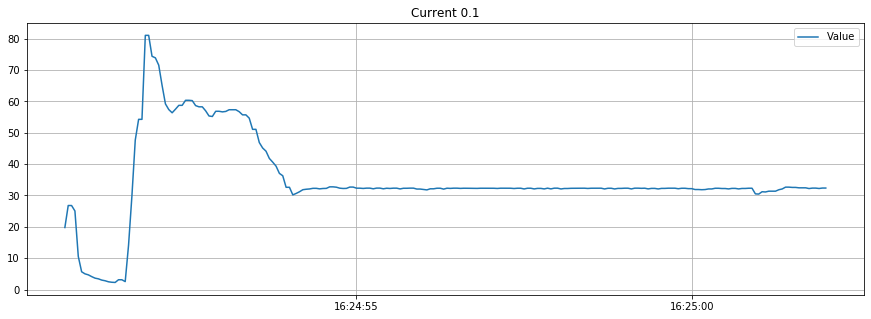

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 17:01:21.900000' and '2019-09-18 17:01:41.900000' ORDER BY DataSavedTime ASC


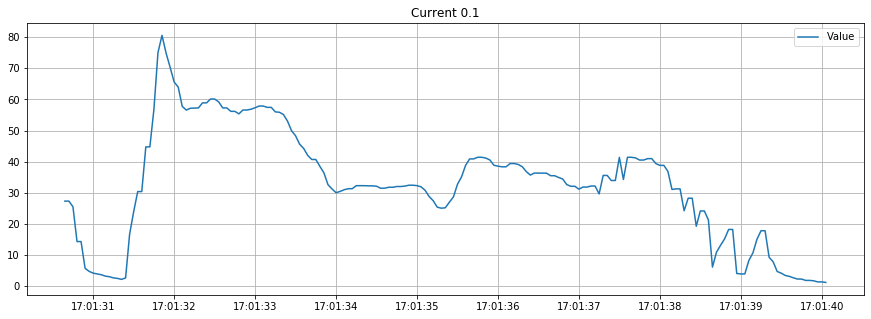

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 17:01:22' and '2019-09-18 17:01:42' ORDER BY DataSavedTime ASC


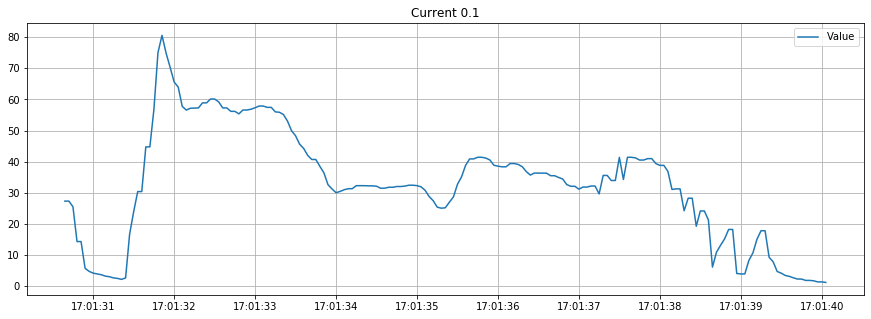

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 18:40:50.200000' and '2019-09-18 18:41:10.200000' ORDER BY DataSavedTime ASC


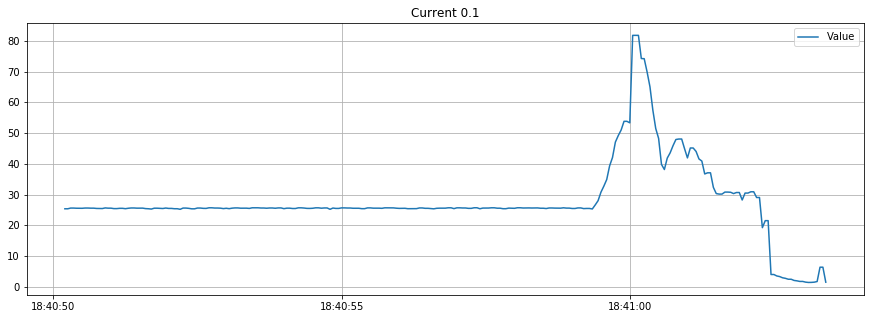

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 18:44:58.100000' and '2019-09-18 18:45:18.100000' ORDER BY DataSavedTime ASC


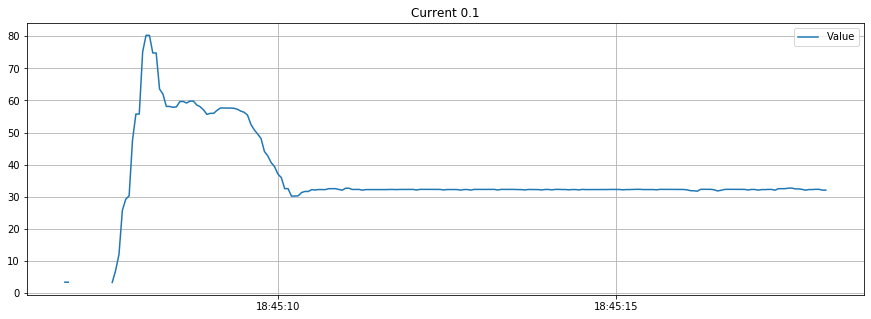

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 18:44:58.200000' and '2019-09-18 18:45:18.200000' ORDER BY DataSavedTime ASC


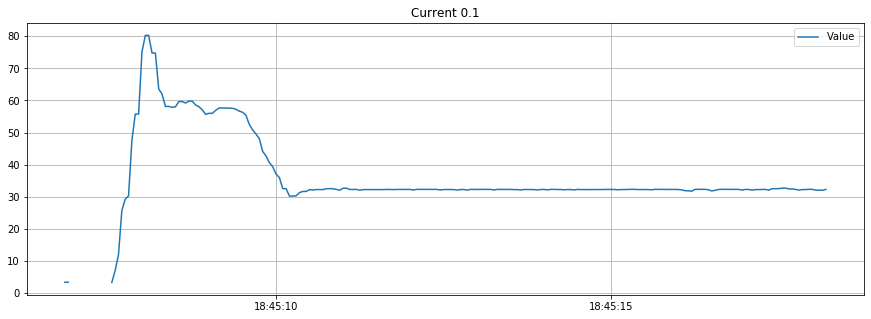

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 18:54:59.400000' and '2019-09-18 18:55:19.400000' ORDER BY DataSavedTime ASC


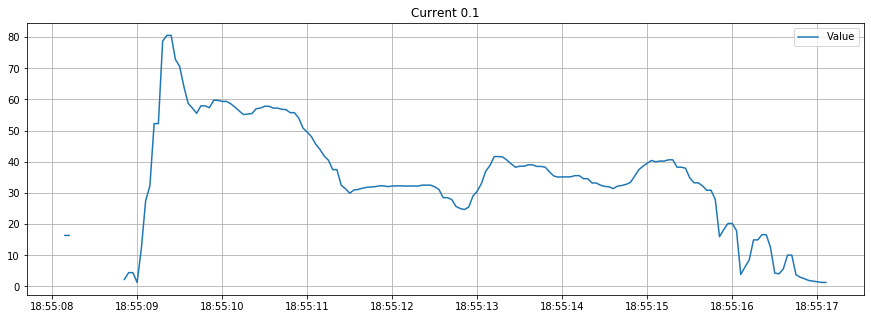

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 18:54:59.500000' and '2019-09-18 18:55:19.500000' ORDER BY DataSavedTime ASC


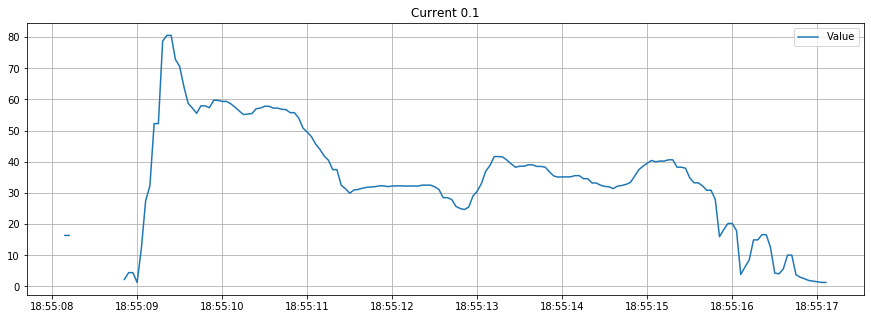

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-18 20:45:20' and '2019-09-18 20:45:40' ORDER BY DataSavedTime ASC


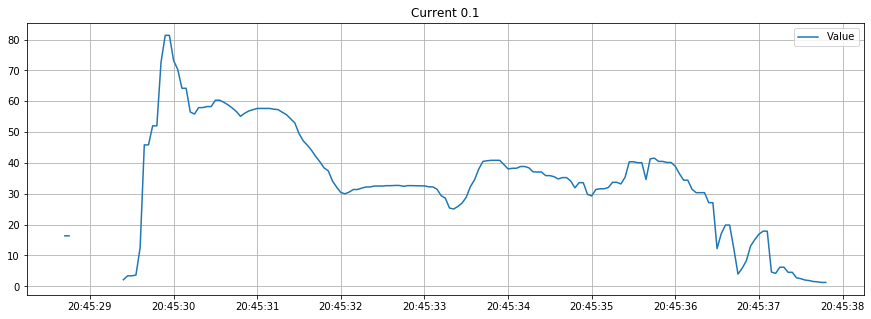

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 04:48:07.800000' and '2019-09-19 04:48:27.800000' ORDER BY DataSavedTime ASC


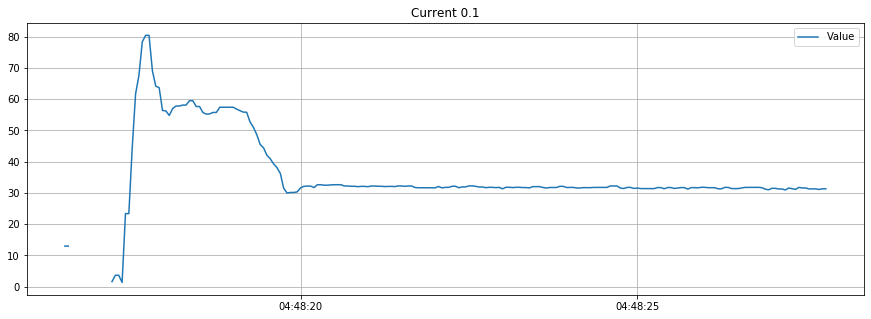

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 07:45:50.400000' and '2019-09-19 07:46:10.400000' ORDER BY DataSavedTime ASC


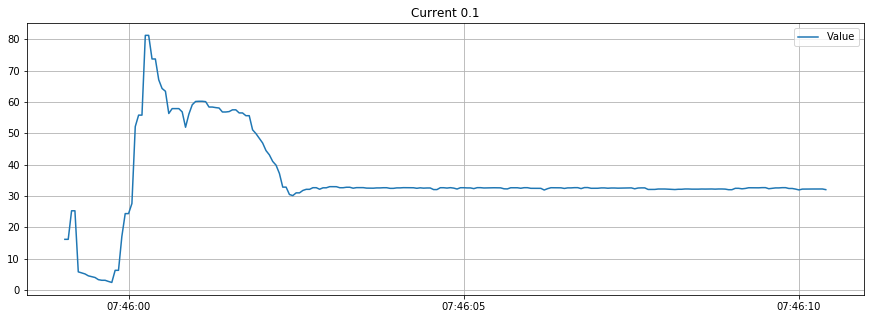

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 09:08:26.900000' and '2019-09-19 09:08:46.900000' ORDER BY DataSavedTime ASC


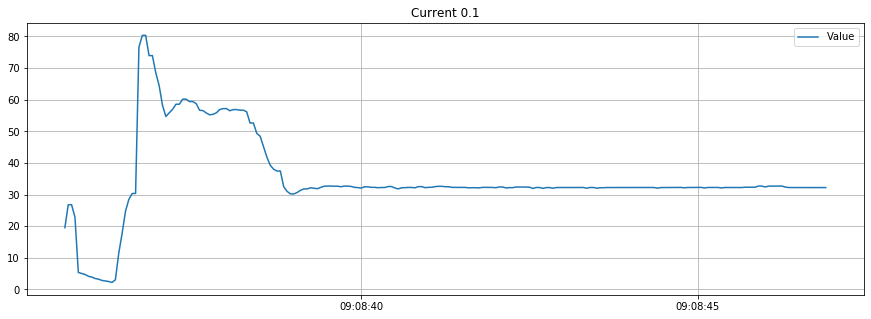

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 09:48:10.500000' and '2019-09-19 09:48:30.500000' ORDER BY DataSavedTime ASC


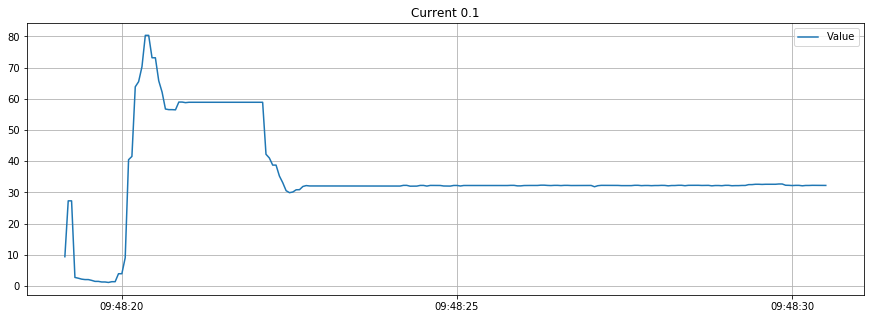

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 12:07:05.500000' and '2019-09-19 12:07:25.500000' ORDER BY DataSavedTime ASC


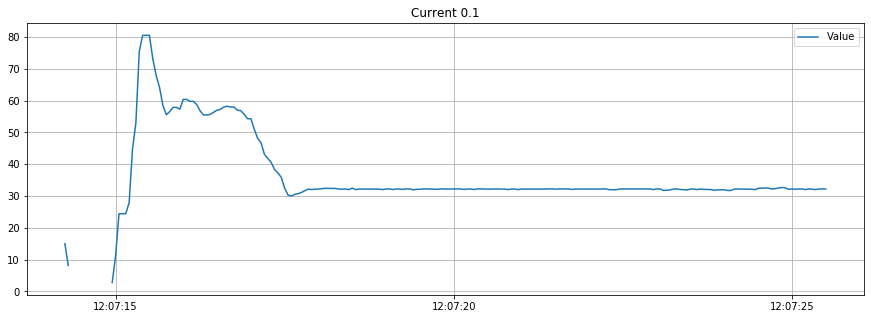

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 12:07:05.600000' and '2019-09-19 12:07:25.600000' ORDER BY DataSavedTime ASC


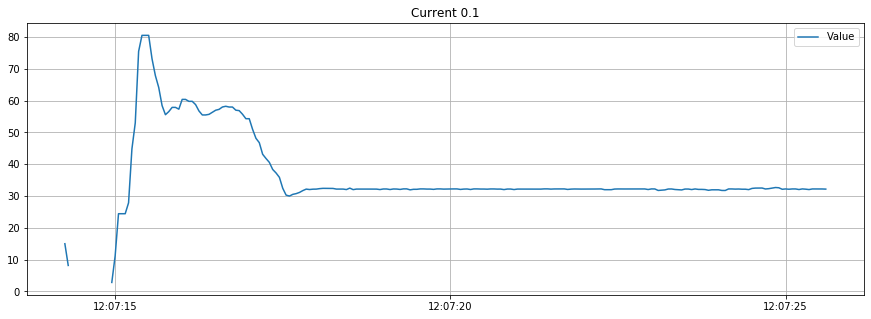

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 13:09:08' and '2019-09-19 13:09:28' ORDER BY DataSavedTime ASC


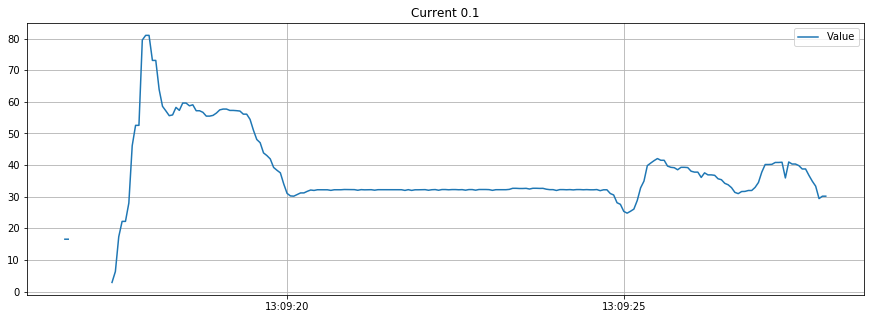

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 14:20:54.400000' and '2019-09-19 14:21:14.400000' ORDER BY DataSavedTime ASC


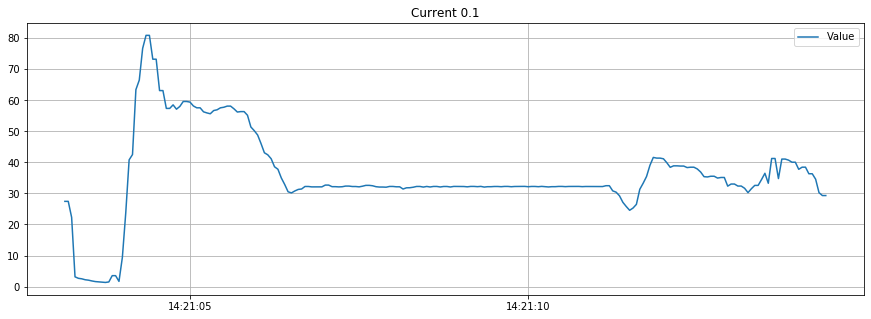

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 14:20:54.500000' and '2019-09-19 14:21:14.500000' ORDER BY DataSavedTime ASC


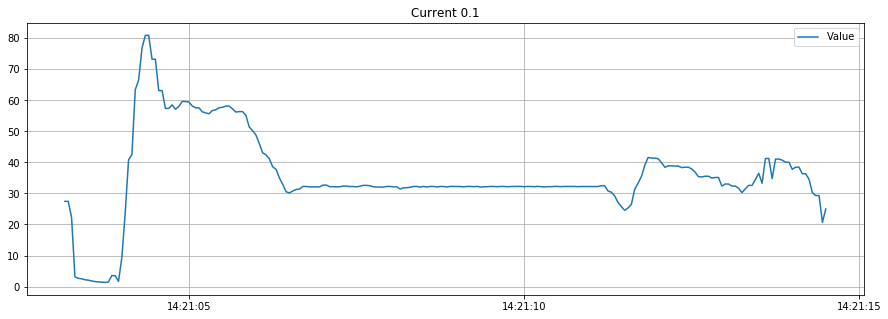

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 15:05:18.900000' and '2019-09-19 15:05:38.900000' ORDER BY DataSavedTime ASC


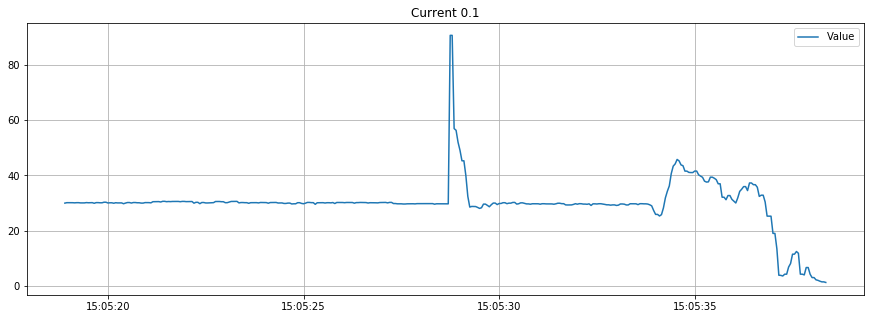

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 16:04:08.500000' and '2019-09-19 16:04:28.500000' ORDER BY DataSavedTime ASC


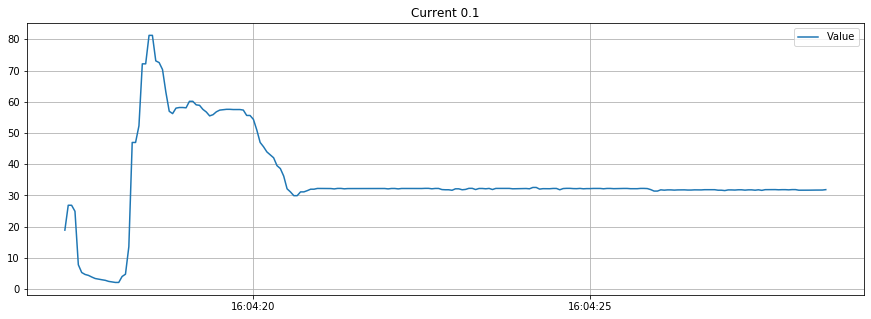

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-19 16:04:08.600000' and '2019-09-19 16:04:28.600000' ORDER BY DataSavedTime ASC


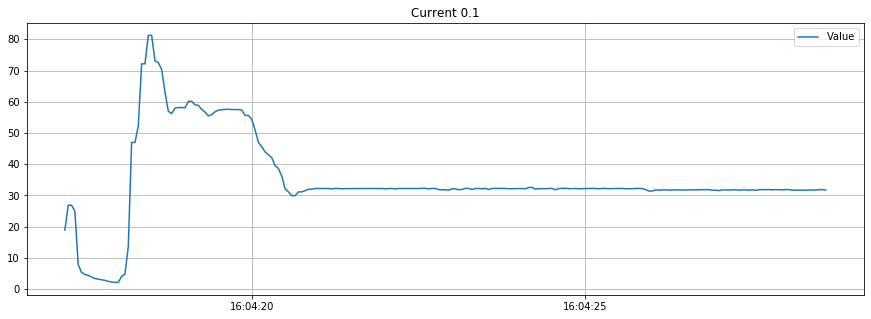

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:12:15.200000' and '2019-09-20 08:12:35.200000' ORDER BY DataSavedTime ASC


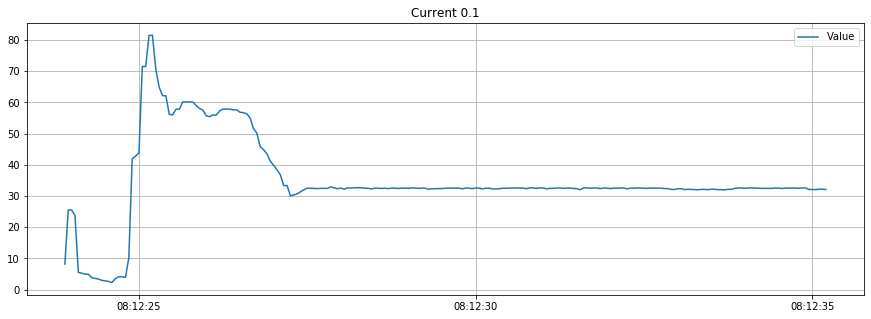

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:12:15.300000' and '2019-09-20 08:12:35.300000' ORDER BY DataSavedTime ASC


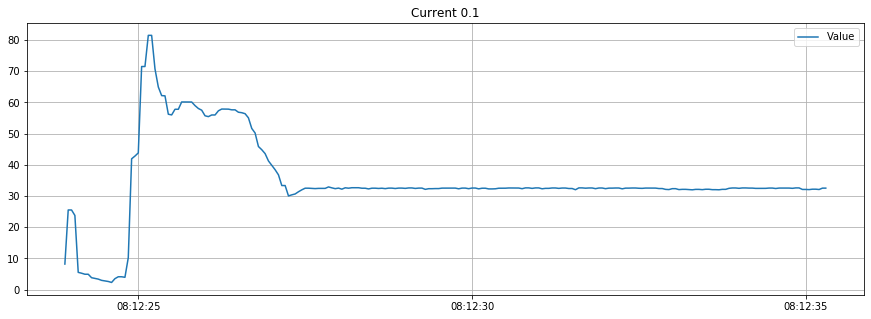

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:17:57.200000' and '2019-09-20 08:18:17.200000' ORDER BY DataSavedTime ASC


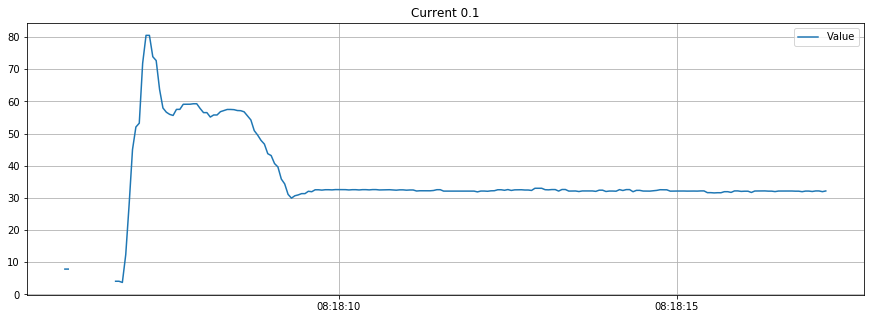

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:17:57.300000' and '2019-09-20 08:18:17.300000' ORDER BY DataSavedTime ASC


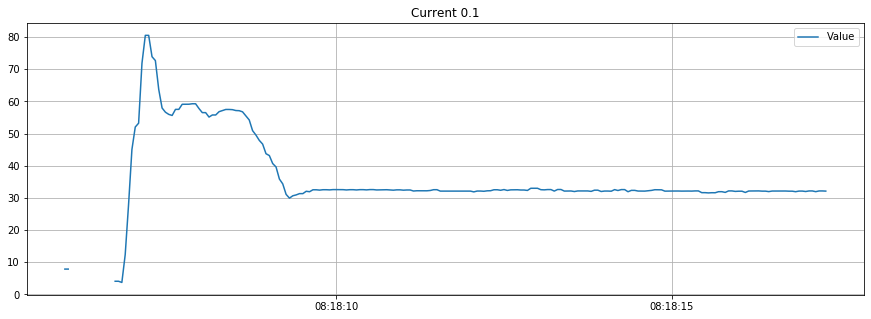

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:20:49.200000' and '2019-09-20 08:21:09.200000' ORDER BY DataSavedTime ASC


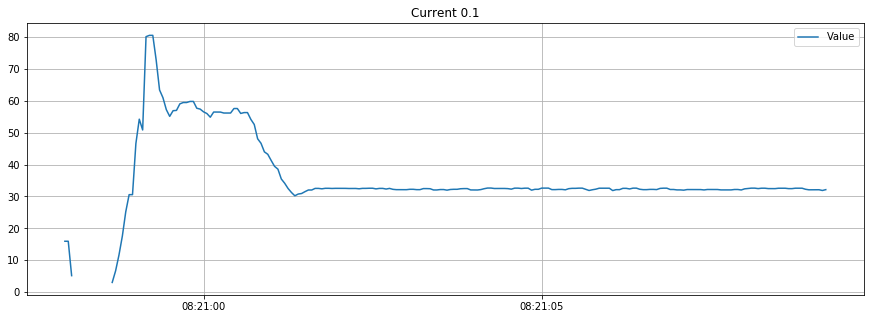

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:20:49.300000' and '2019-09-20 08:21:09.300000' ORDER BY DataSavedTime ASC


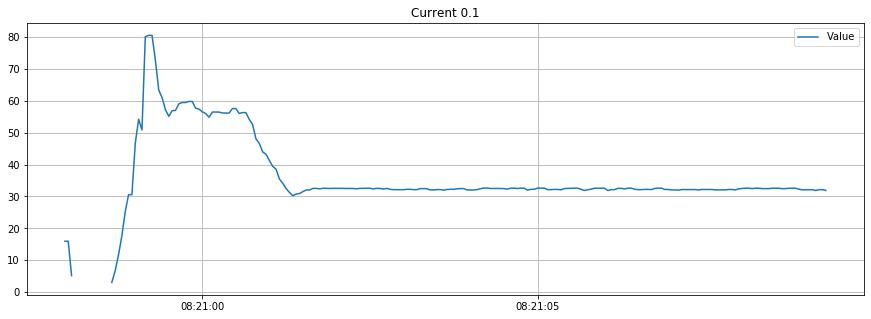

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:30:06.200000' and '2019-09-20 08:30:26.200000' ORDER BY DataSavedTime ASC


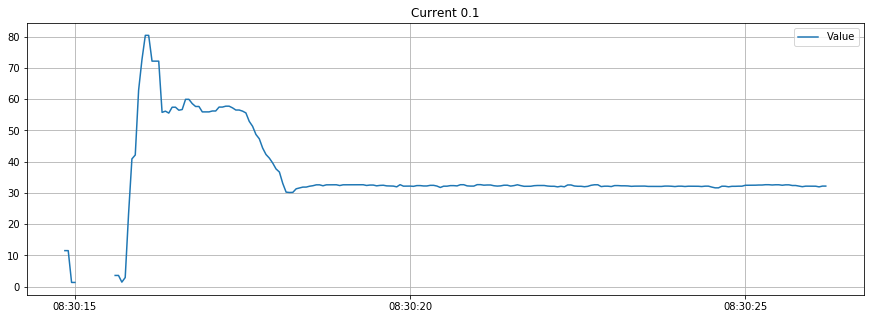

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:35:13.600000' and '2019-09-20 08:35:33.600000' ORDER BY DataSavedTime ASC


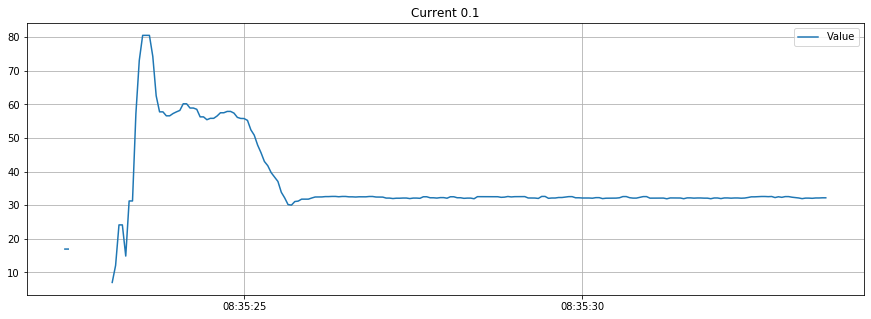

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:35:13.700000' and '2019-09-20 08:35:33.700000' ORDER BY DataSavedTime ASC


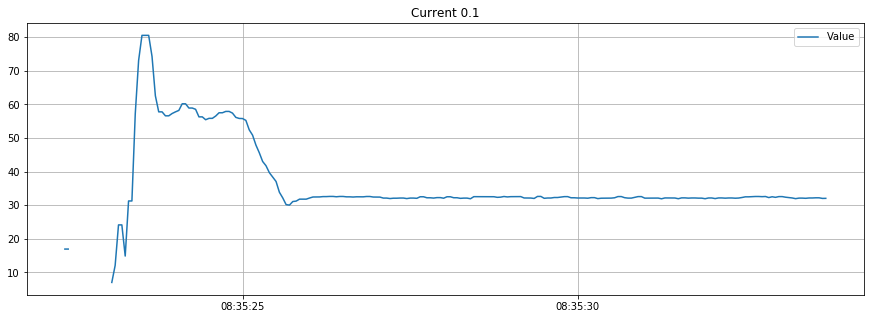

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:36:31.400000' and '2019-09-20 08:36:51.400000' ORDER BY DataSavedTime ASC


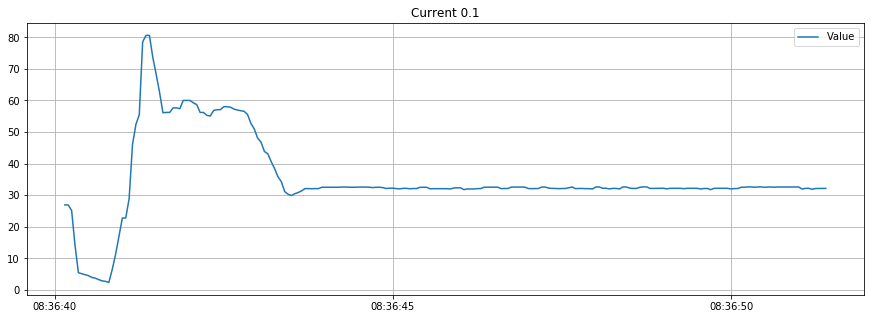

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 08:36:31.500000' and '2019-09-20 08:36:51.500000' ORDER BY DataSavedTime ASC


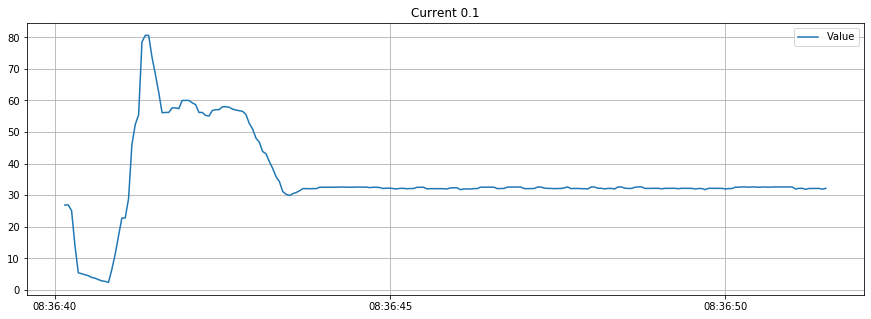

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 09:10:08.200000' and '2019-09-20 09:10:28.200000' ORDER BY DataSavedTime ASC


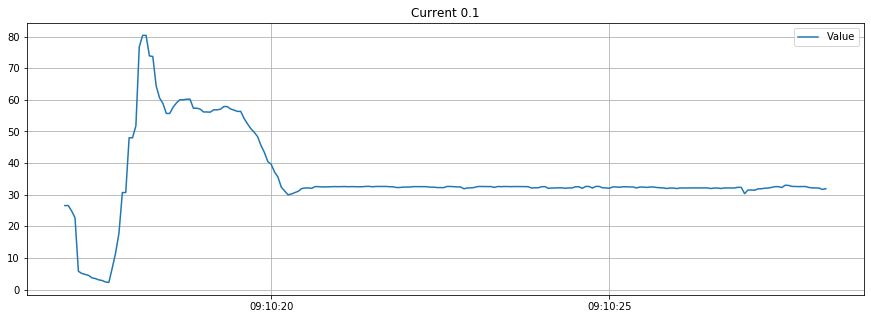

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 09:10:08.300000' and '2019-09-20 09:10:28.300000' ORDER BY DataSavedTime ASC


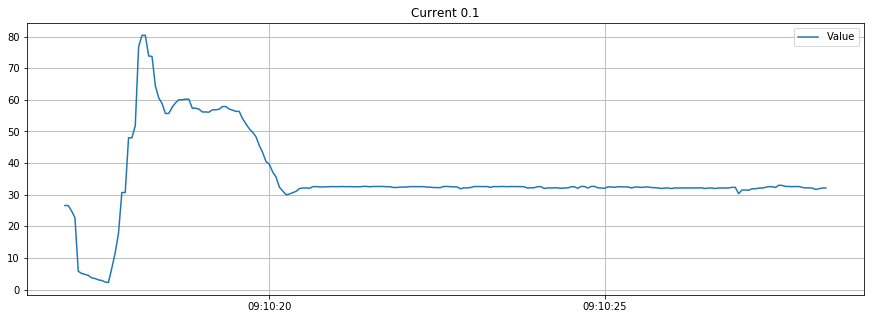

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 09:33:22.900000' and '2019-09-20 09:33:42.900000' ORDER BY DataSavedTime ASC


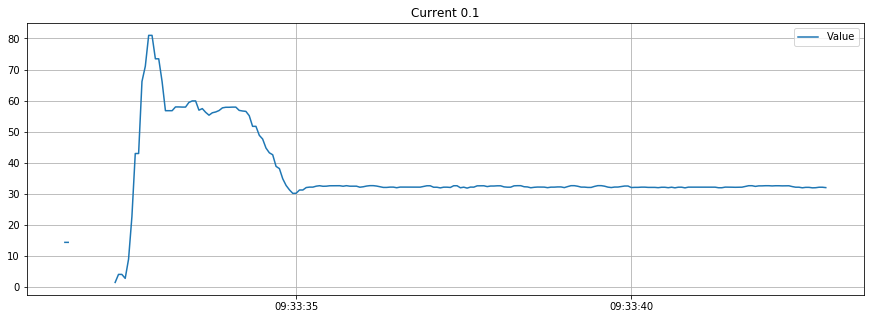

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 10:31:49.400000' and '2019-09-20 10:32:09.400000' ORDER BY DataSavedTime ASC


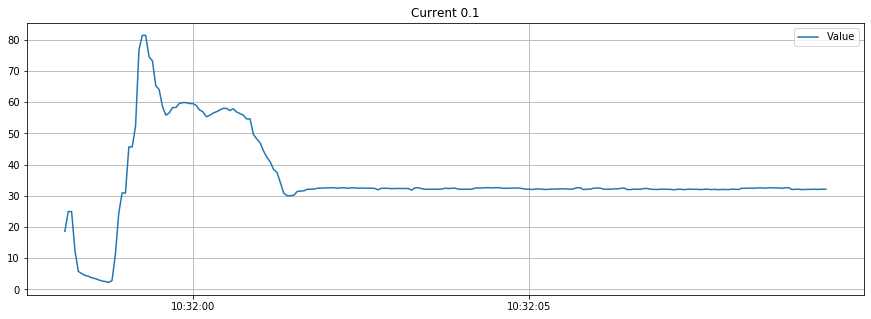

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 12:36:47.600000' and '2019-09-20 12:37:07.600000' ORDER BY DataSavedTime ASC


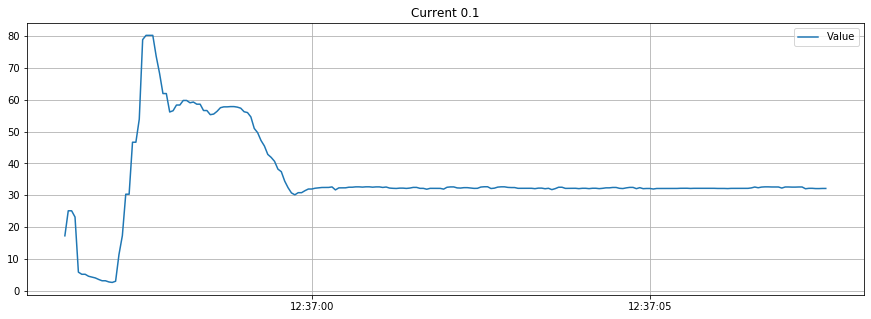

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 12:36:47.700000' and '2019-09-20 12:37:07.700000' ORDER BY DataSavedTime ASC


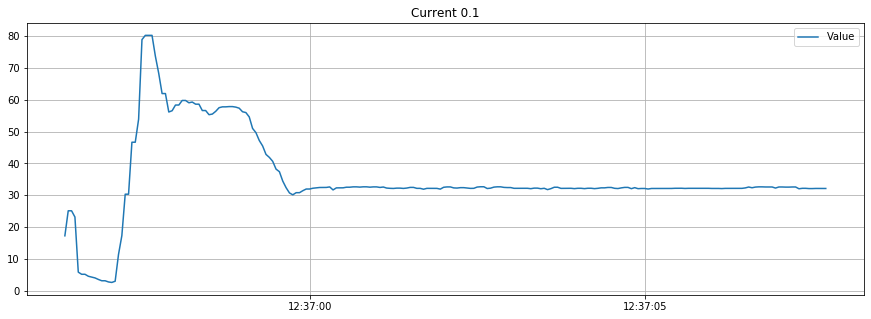

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 12:47:38' and '2019-09-20 12:47:58' ORDER BY DataSavedTime ASC


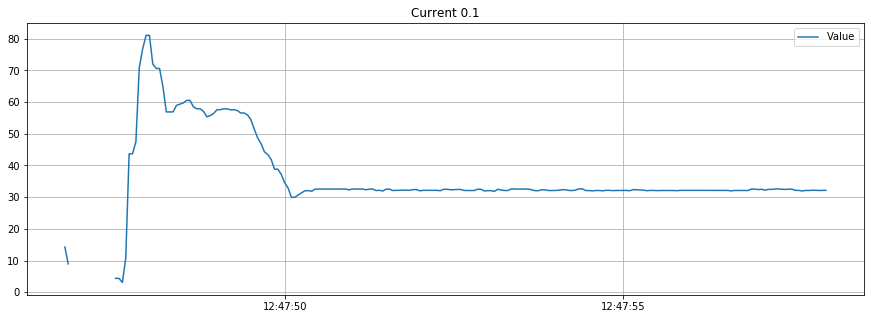

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 12:47:38.100000' and '2019-09-20 12:47:58.100000' ORDER BY DataSavedTime ASC


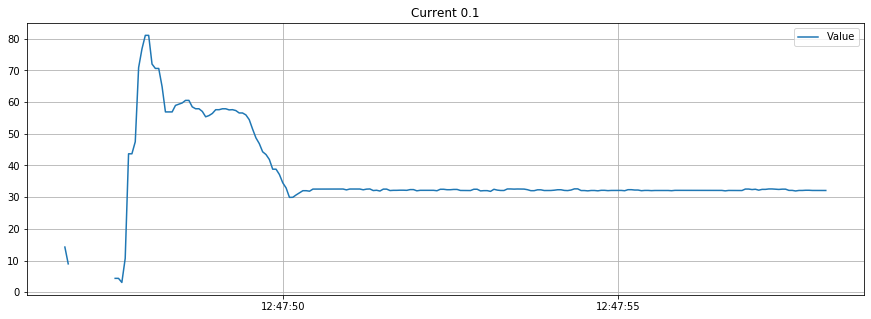

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 13:05:13.900000' and '2019-09-20 13:05:33.900000' ORDER BY DataSavedTime ASC


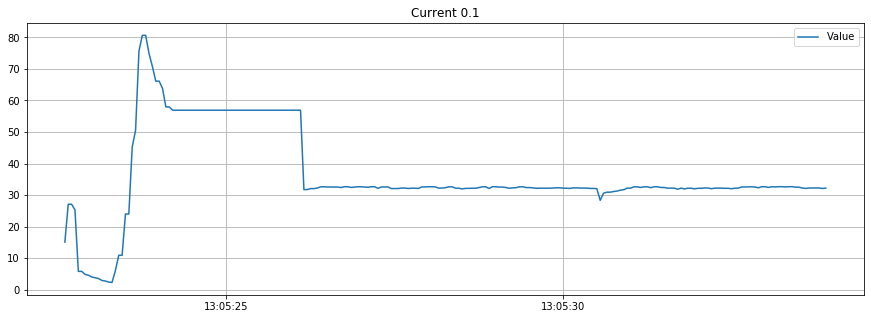

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 13:36:13.300000' and '2019-09-20 13:36:33.300000' ORDER BY DataSavedTime ASC


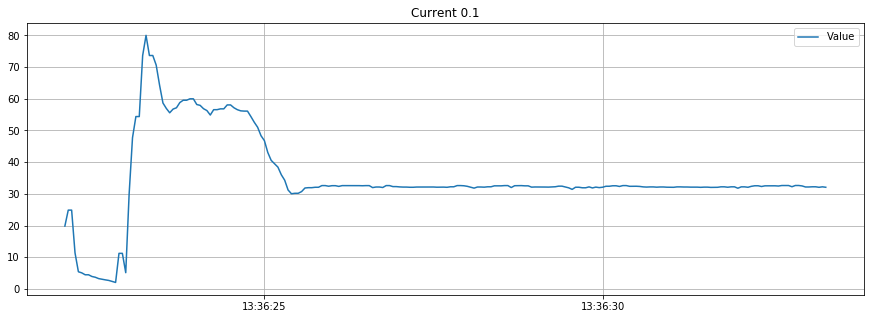

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 13:36:13.400000' and '2019-09-20 13:36:33.400000' ORDER BY DataSavedTime ASC


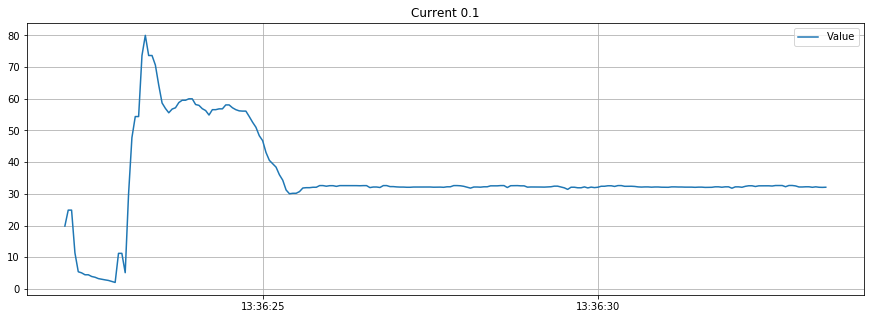

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 15:06:21.200000' and '2019-09-20 15:06:41.200000' ORDER BY DataSavedTime ASC


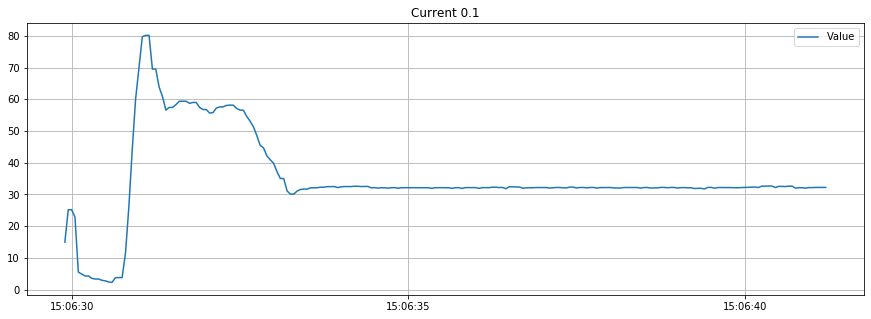

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 16:31:04.100000' and '2019-09-20 16:31:24.100000' ORDER BY DataSavedTime ASC


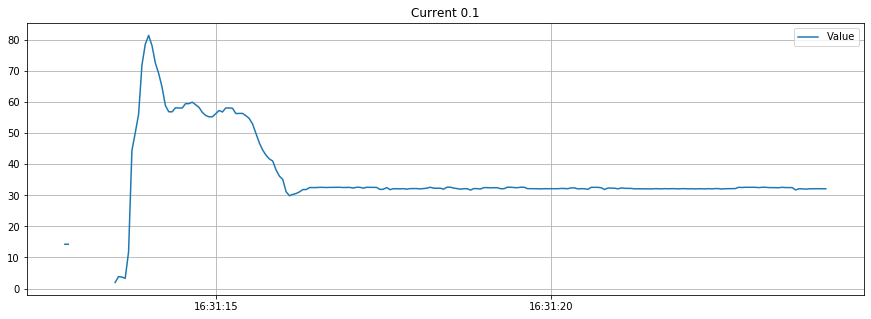

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-20 16:35:02.600000' and '2019-09-20 16:35:22.600000' ORDER BY DataSavedTime ASC


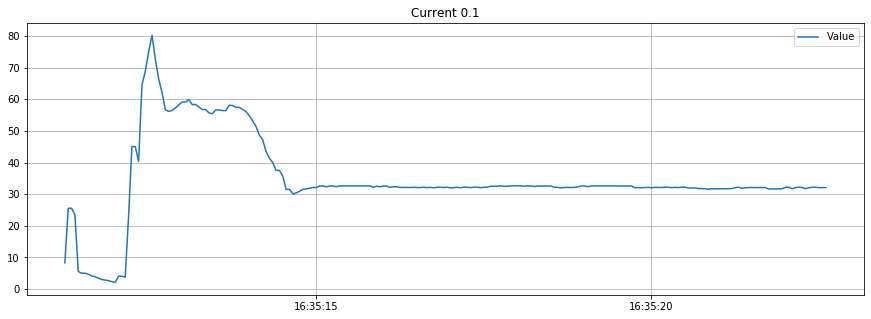

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 05:12:46.300000' and '2019-09-21 05:13:06.300000' ORDER BY DataSavedTime ASC


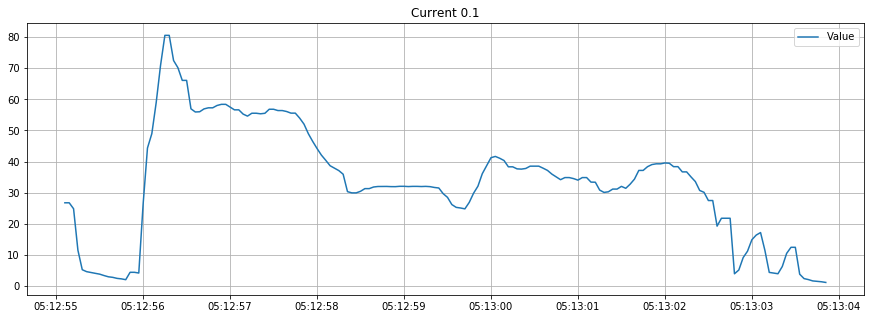

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 05:12:46.400000' and '2019-09-21 05:13:06.400000' ORDER BY DataSavedTime ASC


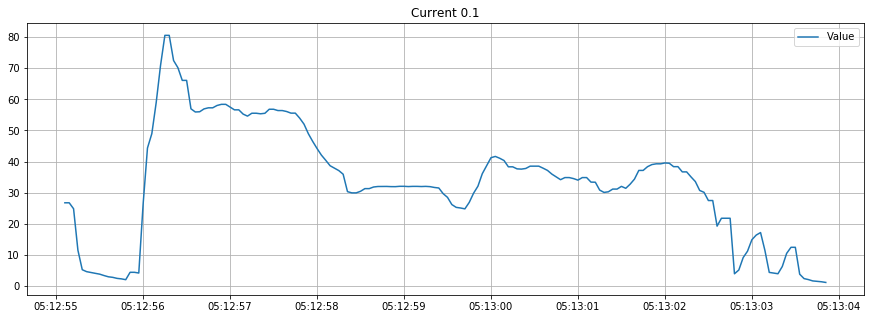

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 09:34:46.200000' and '2019-09-21 09:35:06.200000' ORDER BY DataSavedTime ASC


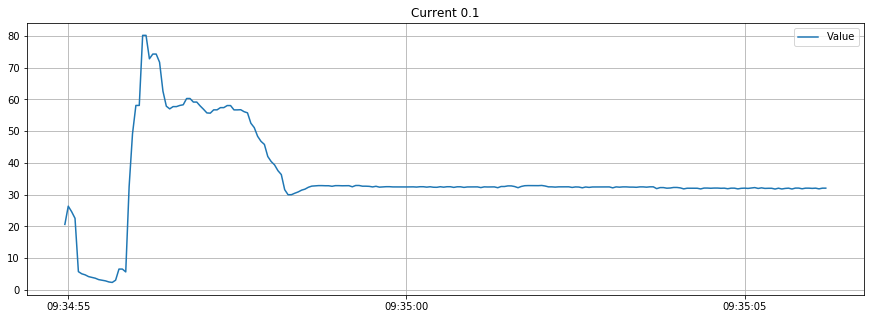

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 09:34:46.300000' and '2019-09-21 09:35:06.300000' ORDER BY DataSavedTime ASC


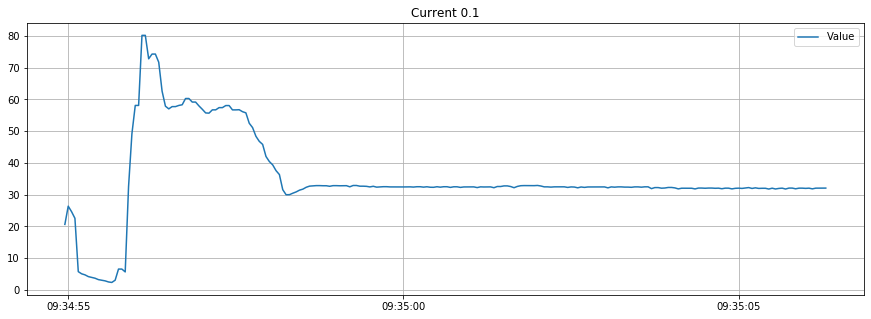

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 10:37:59.400000' and '2019-09-21 10:38:19.400000' ORDER BY DataSavedTime ASC


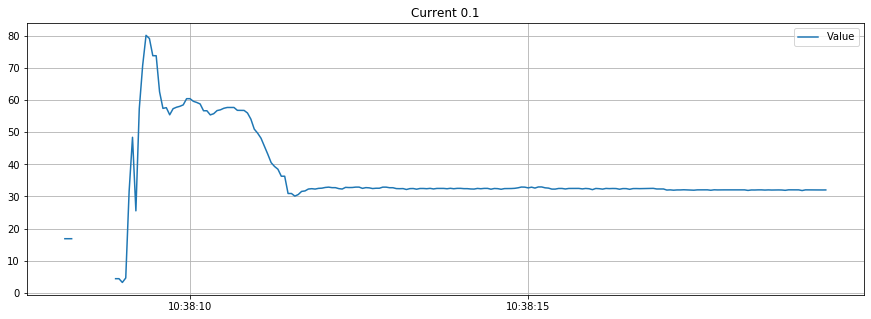

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 10:39:58.800000' and '2019-09-21 10:40:18.800000' ORDER BY DataSavedTime ASC


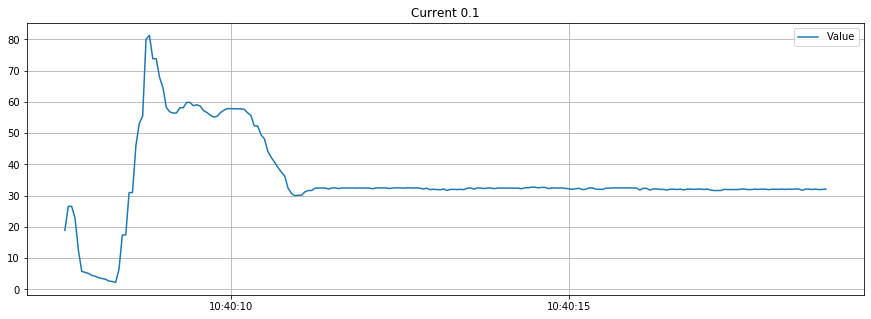

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 10:39:58.900000' and '2019-09-21 10:40:18.900000' ORDER BY DataSavedTime ASC


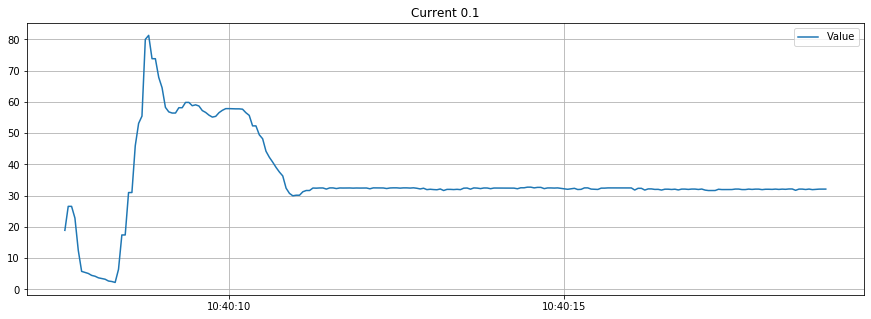

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 10:53:19.100000' and '2019-09-21 10:53:39.100000' ORDER BY DataSavedTime ASC


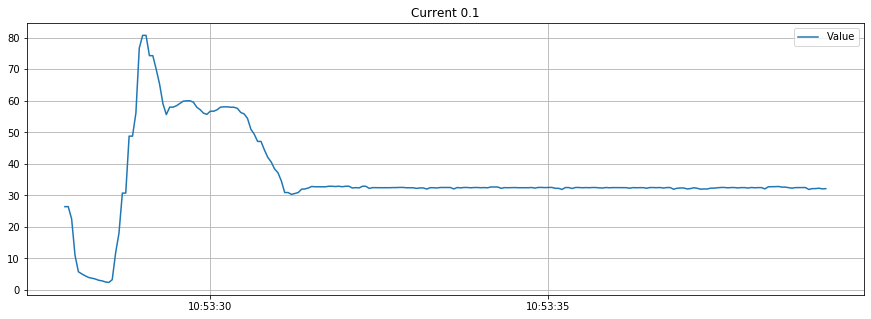

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 10:53:19.200000' and '2019-09-21 10:53:39.200000' ORDER BY DataSavedTime ASC


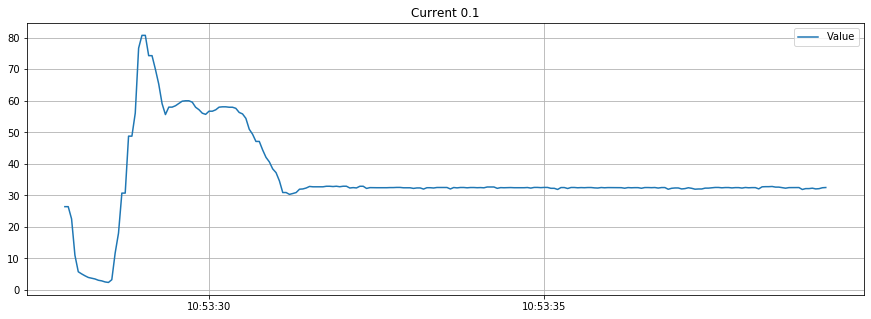

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 11:51:34.700000' and '2019-09-21 11:51:54.700000' ORDER BY DataSavedTime ASC


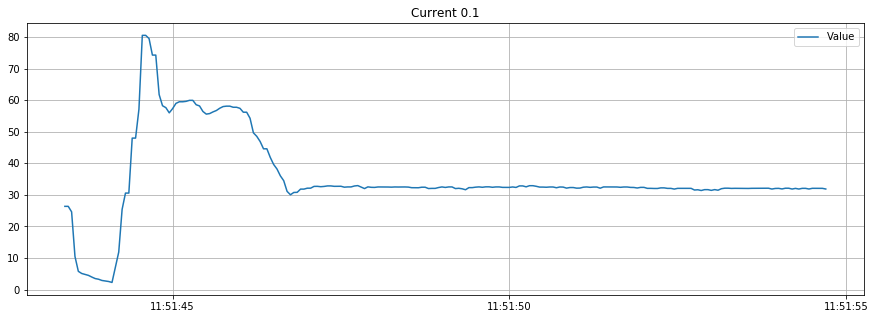

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 12:12:34.300000' and '2019-09-21 12:12:54.300000' ORDER BY DataSavedTime ASC


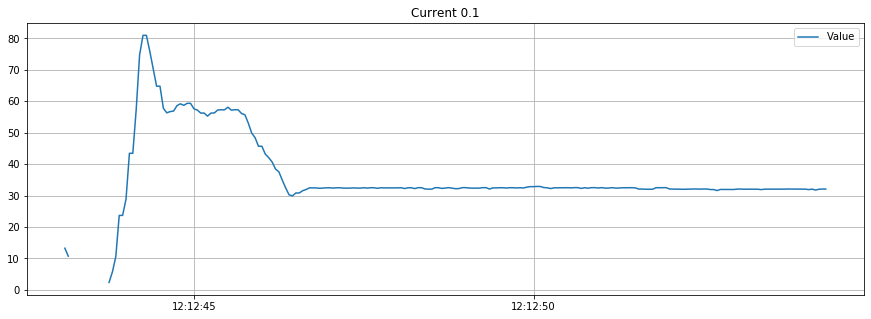

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 12:12:34.400000' and '2019-09-21 12:12:54.400000' ORDER BY DataSavedTime ASC


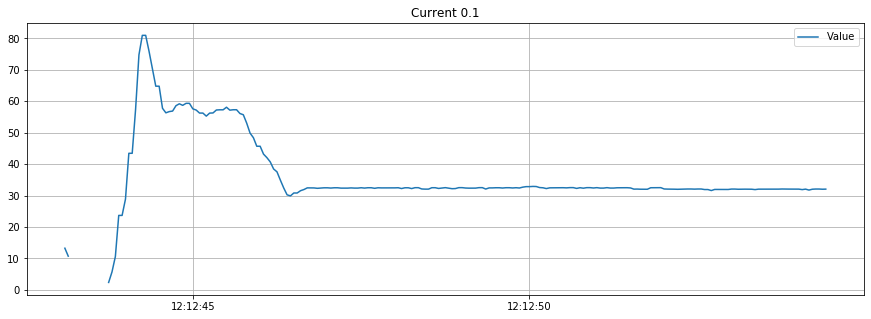

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 12:34:07.100000' and '2019-09-21 12:34:27.100000' ORDER BY DataSavedTime ASC


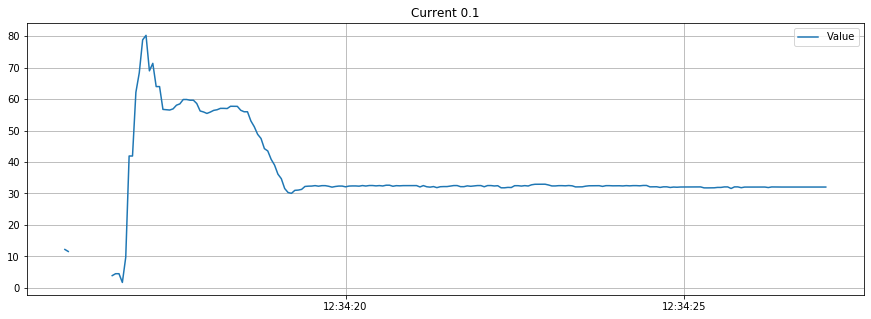

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 12:34:07.200000' and '2019-09-21 12:34:27.200000' ORDER BY DataSavedTime ASC


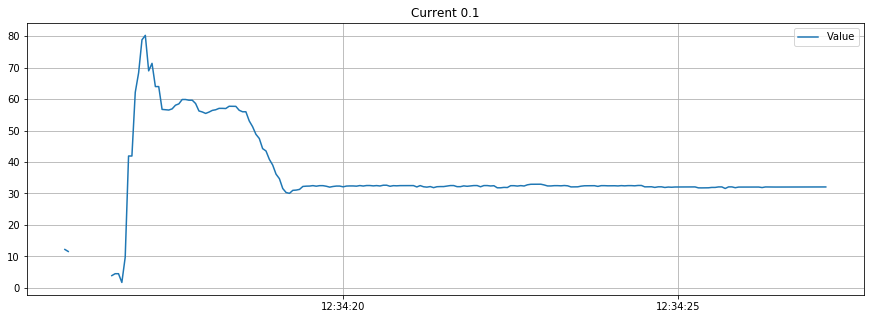

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 13:13:18.600000' and '2019-09-21 13:13:38.600000' ORDER BY DataSavedTime ASC


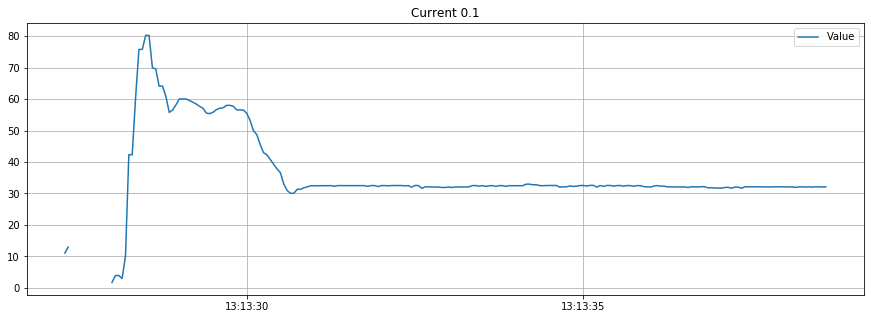

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 13:22:54.300000' and '2019-09-21 13:23:14.300000' ORDER BY DataSavedTime ASC


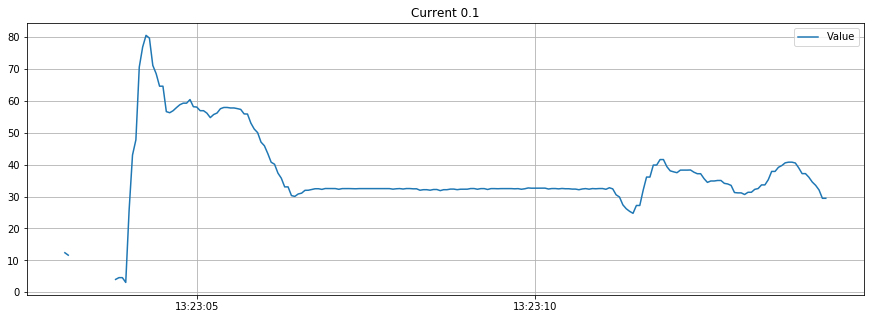

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 15:15:00' and '2019-09-21 15:15:20' ORDER BY DataSavedTime ASC


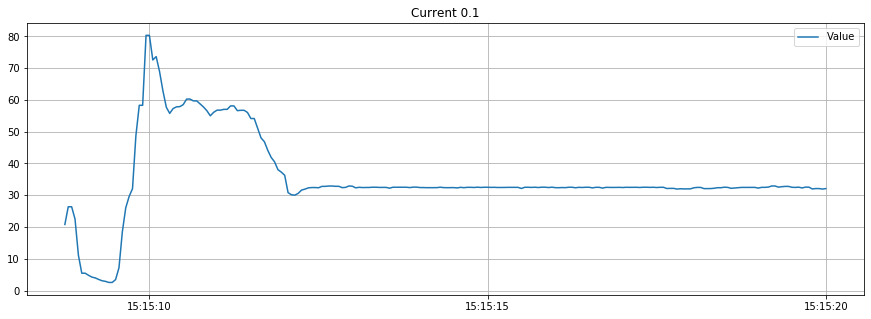

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 15:15:00.100000' and '2019-09-21 15:15:20.100000' ORDER BY DataSavedTime ASC


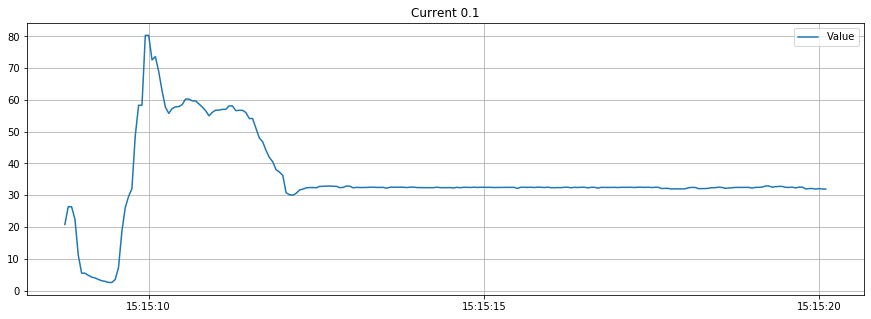

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 15:22:16.400000' and '2019-09-21 15:22:36.400000' ORDER BY DataSavedTime ASC


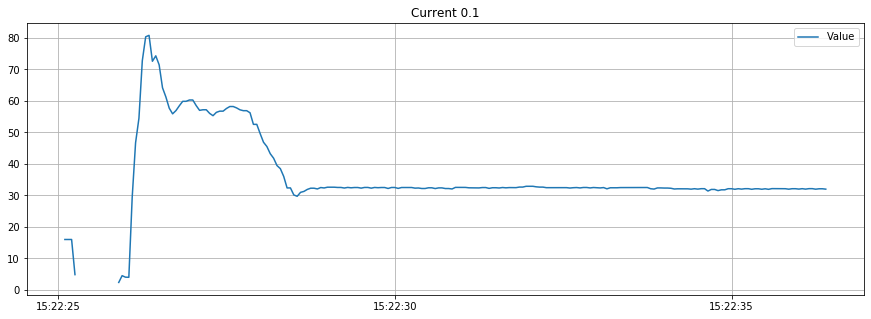

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 15:22:16.500000' and '2019-09-21 15:22:36.500000' ORDER BY DataSavedTime ASC


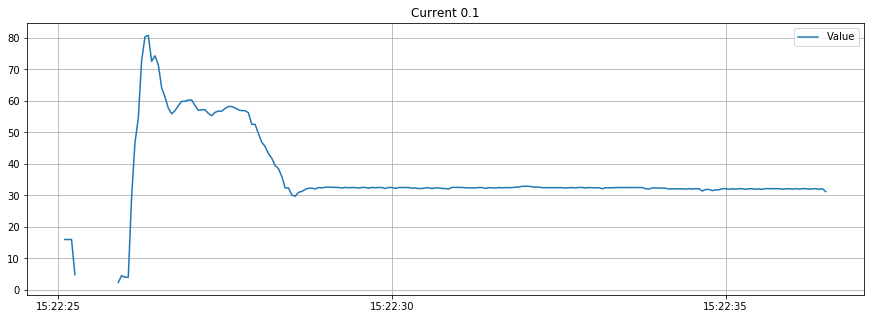

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 17:43:27.900000' and '2019-09-21 17:43:47.900000' ORDER BY DataSavedTime ASC


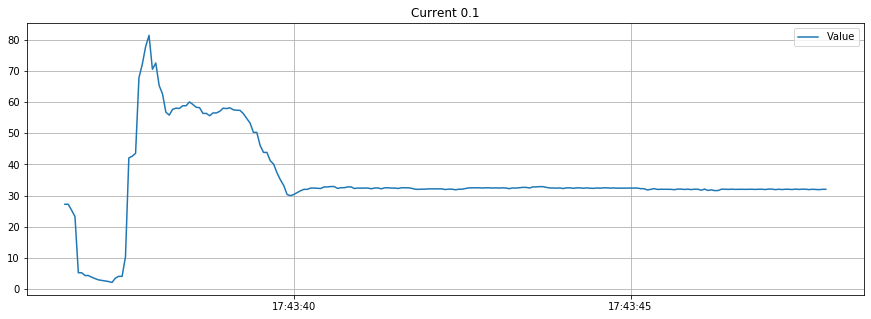

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-21 17:43:28' and '2019-09-21 17:43:48' ORDER BY DataSavedTime ASC


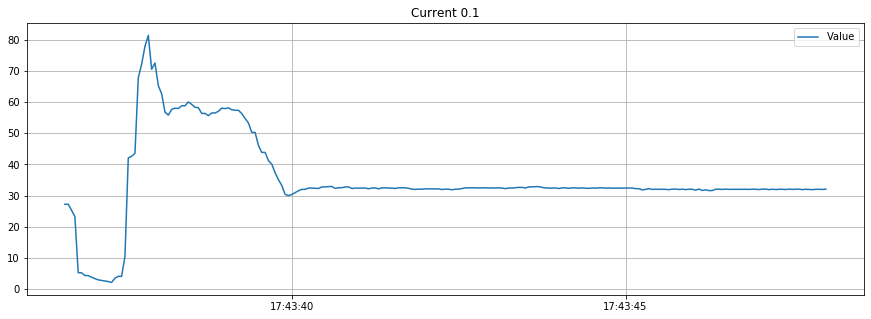

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 08:33:59.100000' and '2019-09-22 08:34:19.100000' ORDER BY DataSavedTime ASC


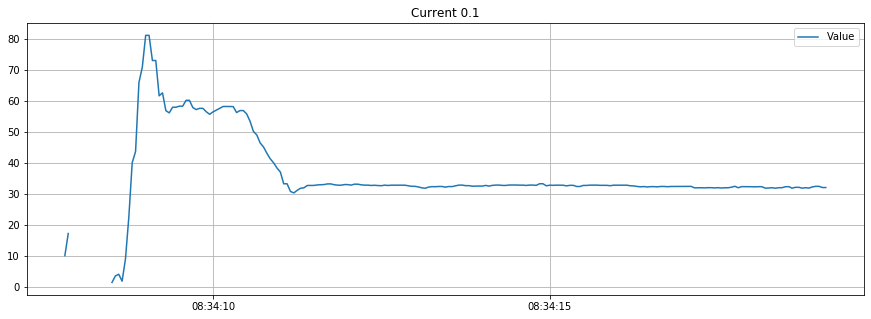

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 08:40:37.800000' and '2019-09-22 08:40:57.800000' ORDER BY DataSavedTime ASC


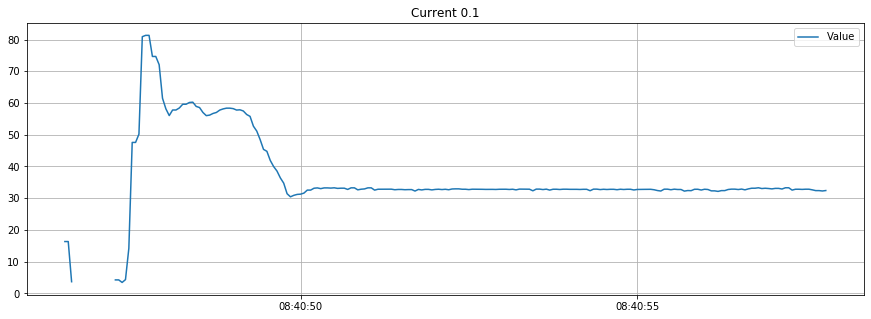

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 11:45:49.500000' and '2019-09-22 11:46:09.500000' ORDER BY DataSavedTime ASC


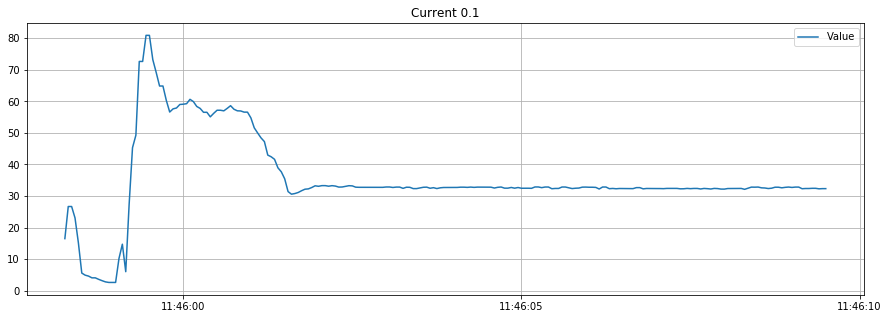

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 11:45:49.600000' and '2019-09-22 11:46:09.600000' ORDER BY DataSavedTime ASC


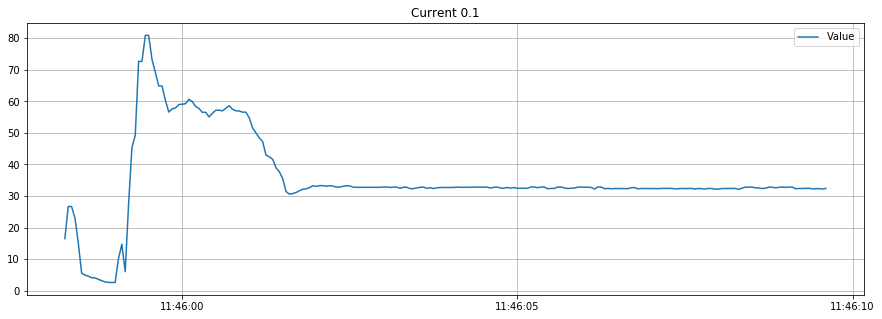

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 12:26:56.900000' and '2019-09-22 12:27:16.900000' ORDER BY DataSavedTime ASC


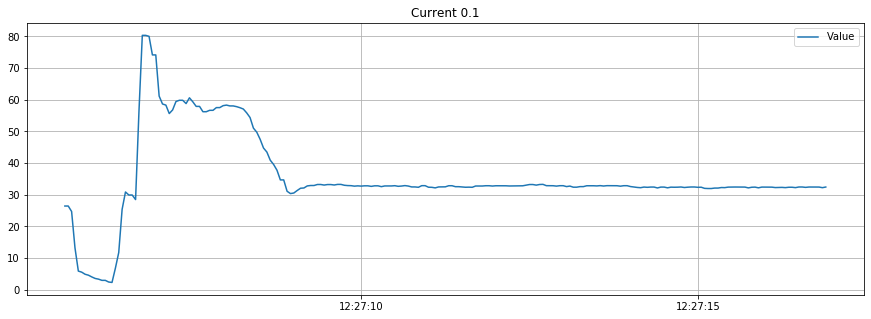

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 12:36:27.900000' and '2019-09-22 12:36:47.900000' ORDER BY DataSavedTime ASC


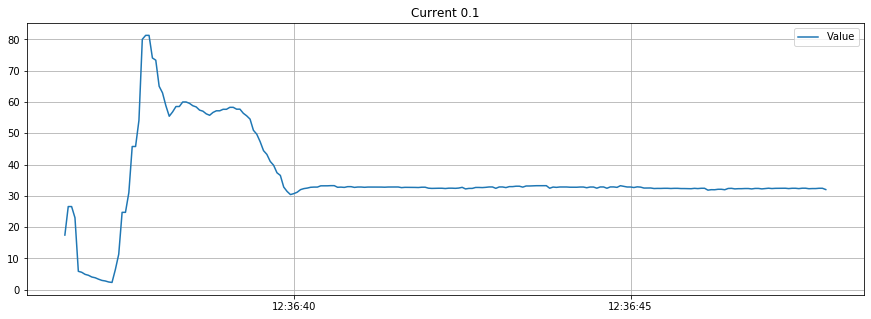

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 12:46:14.400000' and '2019-09-22 12:46:34.400000' ORDER BY DataSavedTime ASC


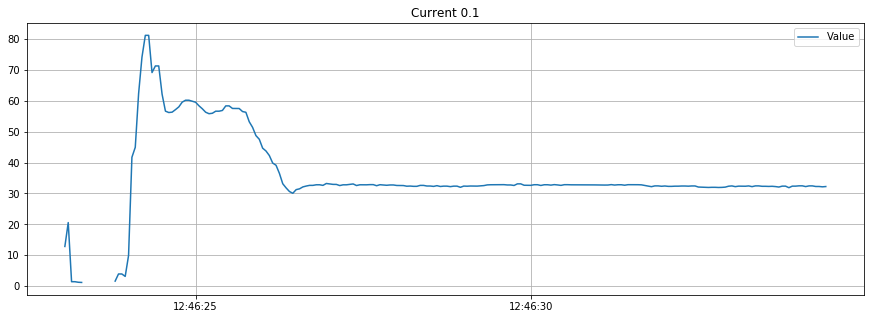

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 12:57:11' and '2019-09-22 12:57:31' ORDER BY DataSavedTime ASC


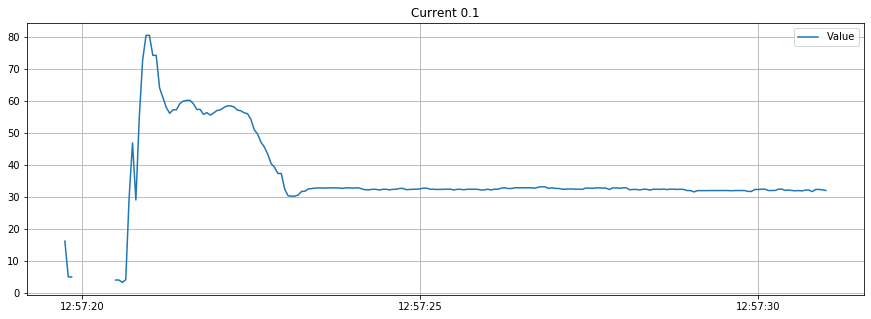

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 12:57:11.100000' and '2019-09-22 12:57:31.100000' ORDER BY DataSavedTime ASC


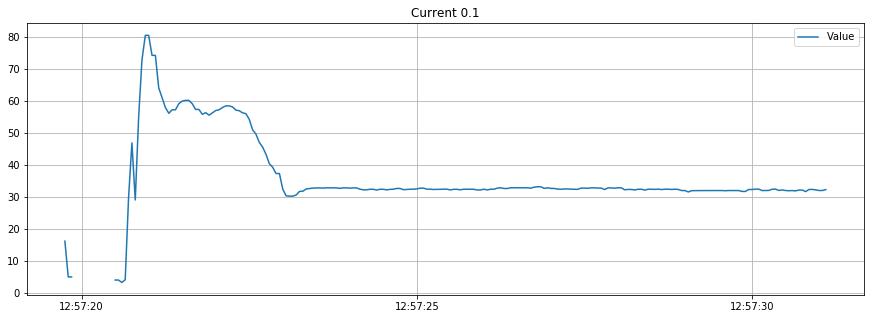

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 20:22:48.500000' and '2019-09-22 20:23:08.500000' ORDER BY DataSavedTime ASC


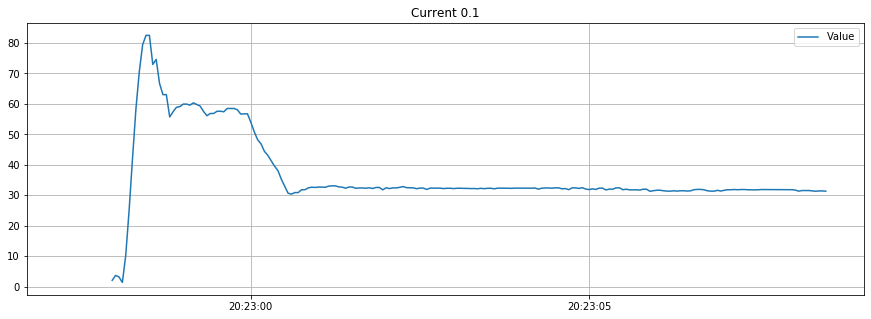

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-22 20:22:48.600000' and '2019-09-22 20:23:08.600000' ORDER BY DataSavedTime ASC


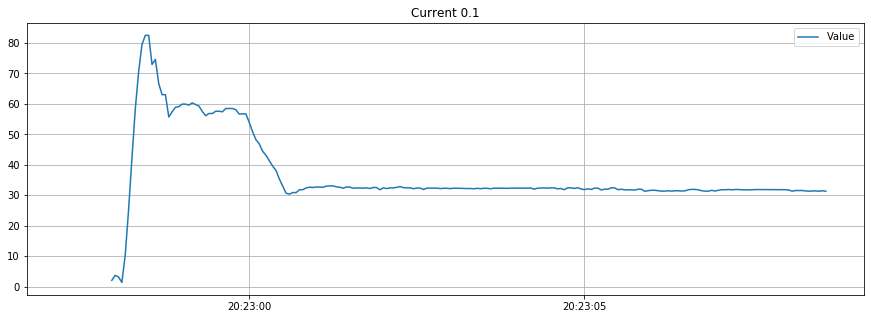

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:17:46.200000' and '2019-09-23 08:18:06.200000' ORDER BY DataSavedTime ASC


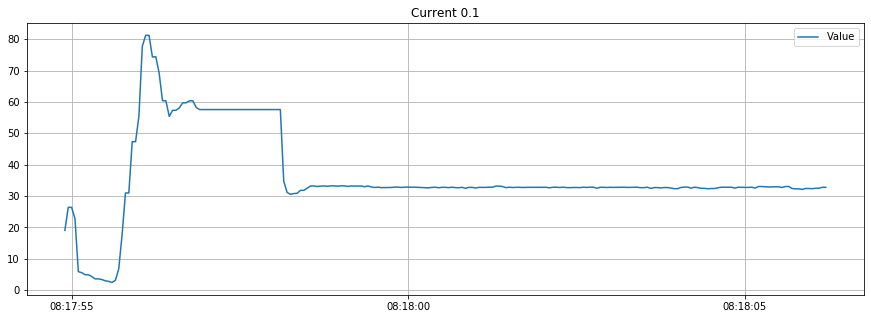

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:17:46.300000' and '2019-09-23 08:18:06.300000' ORDER BY DataSavedTime ASC


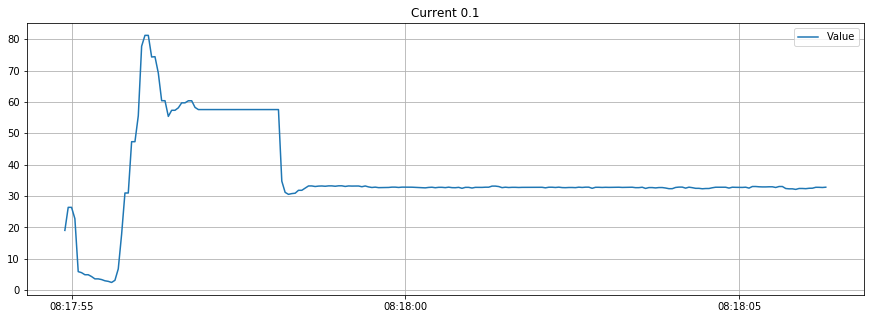

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:25:19' and '2019-09-23 08:25:39' ORDER BY DataSavedTime ASC


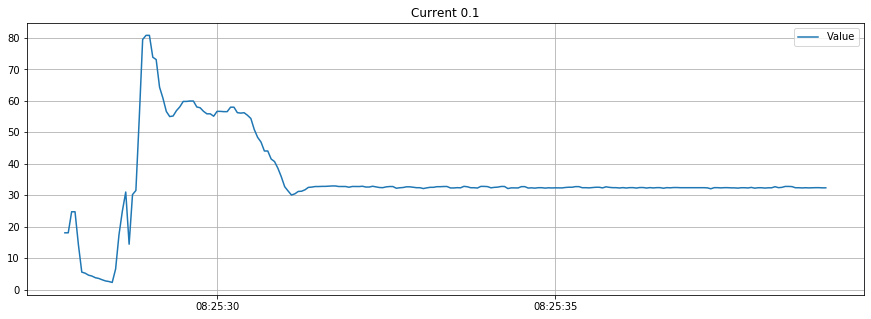

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:25:19.100000' and '2019-09-23 08:25:39.100000' ORDER BY DataSavedTime ASC


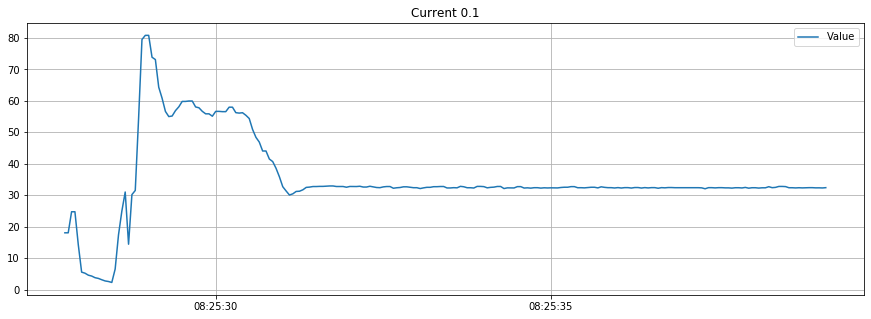

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:31:05.700000' and '2019-09-23 08:31:25.700000' ORDER BY DataSavedTime ASC


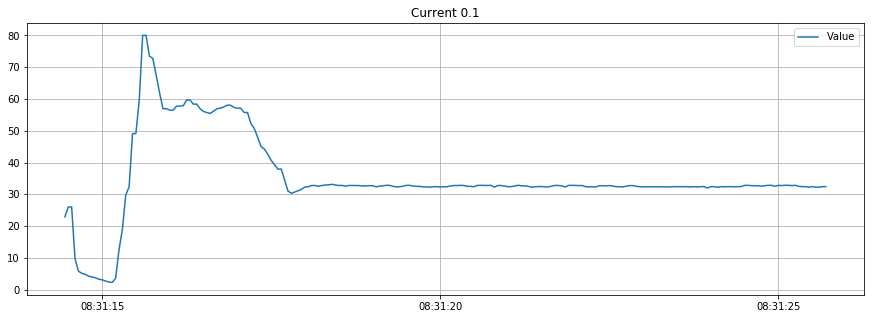

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:50:44.500000' and '2019-09-23 08:51:04.500000' ORDER BY DataSavedTime ASC


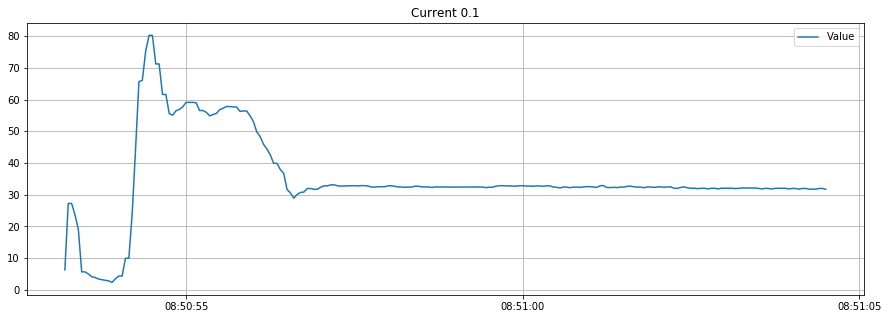

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 08:50:44.600000' and '2019-09-23 08:51:04.600000' ORDER BY DataSavedTime ASC


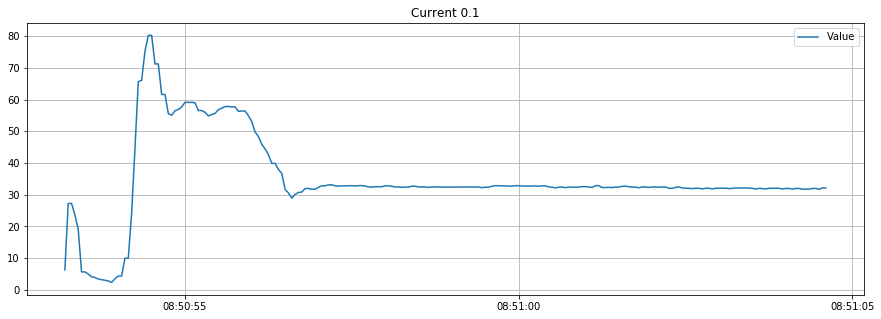

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 09:38:59.100000' and '2019-09-23 09:39:19.100000' ORDER BY DataSavedTime ASC


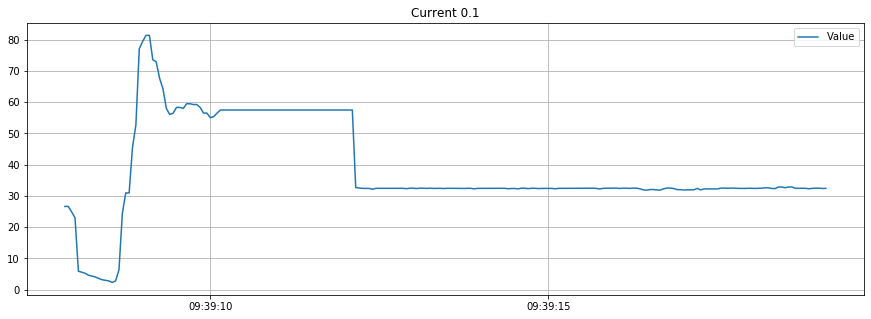

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 09:38:59.200000' and '2019-09-23 09:39:19.200000' ORDER BY DataSavedTime ASC


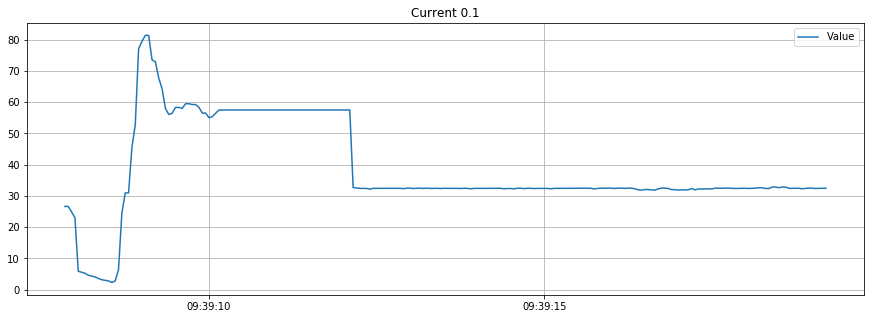

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 09:54:51.300000' and '2019-09-23 09:55:11.300000' ORDER BY DataSavedTime ASC


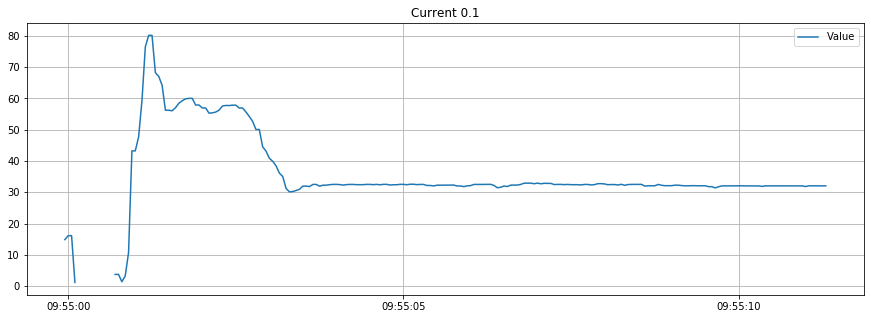

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 11:43:37.100000' and '2019-09-23 11:43:57.100000' ORDER BY DataSavedTime ASC


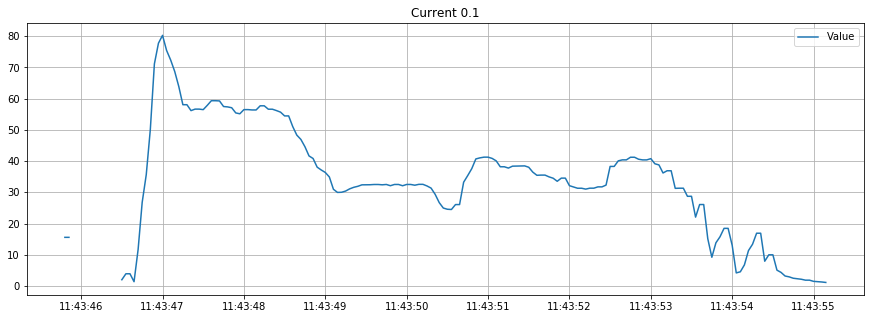

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 12:46:08' and '2019-09-23 12:46:28' ORDER BY DataSavedTime ASC


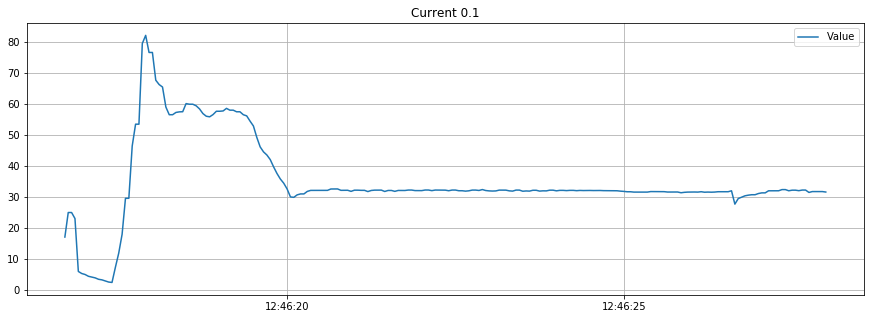

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 13:14:03.800000' and '2019-09-23 13:14:23.800000' ORDER BY DataSavedTime ASC


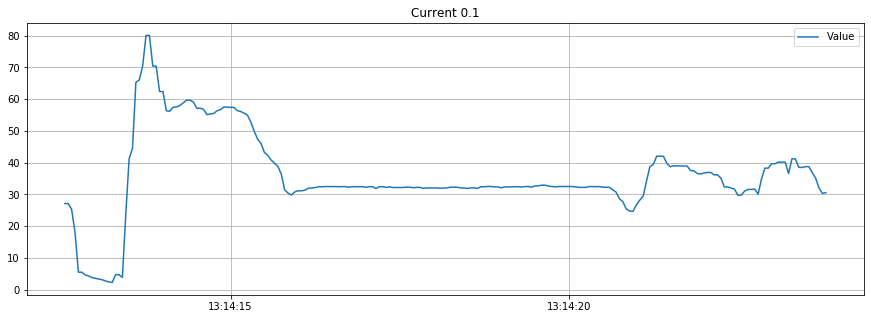

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 13:14:03.900000' and '2019-09-23 13:14:23.900000' ORDER BY DataSavedTime ASC


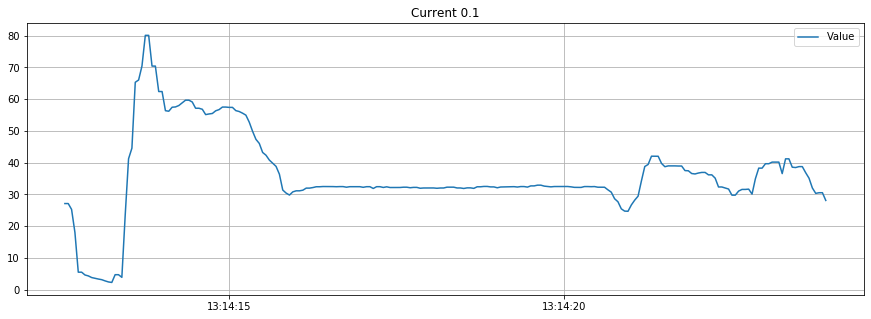

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 13:32:56.500000' and '2019-09-23 13:33:16.500000' ORDER BY DataSavedTime ASC


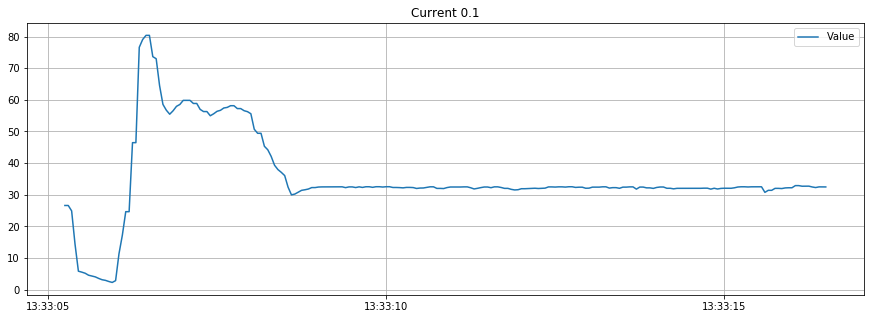

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 13:32:56.600000' and '2019-09-23 13:33:16.600000' ORDER BY DataSavedTime ASC


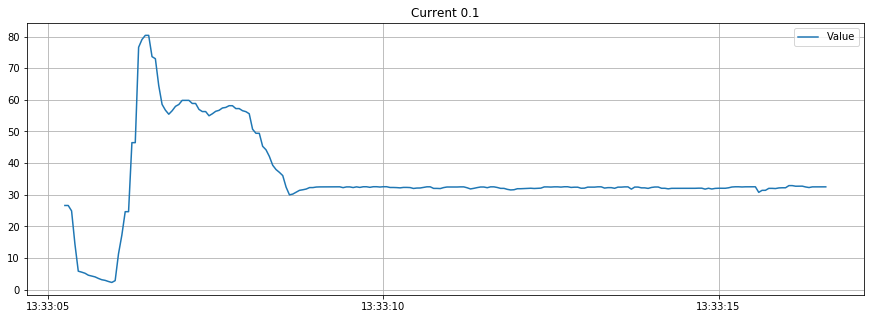

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 16:01:10.900000' and '2019-09-23 16:01:30.900000' ORDER BY DataSavedTime ASC


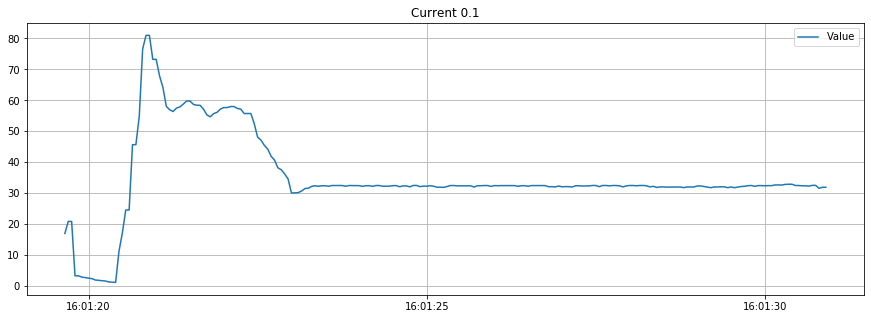

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 16:01:11' and '2019-09-23 16:01:31' ORDER BY DataSavedTime ASC


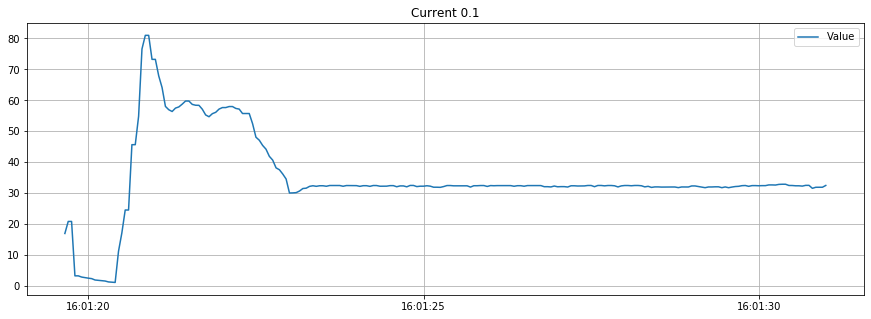

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 16:46:33.200000' and '2019-09-23 16:46:53.200000' ORDER BY DataSavedTime ASC


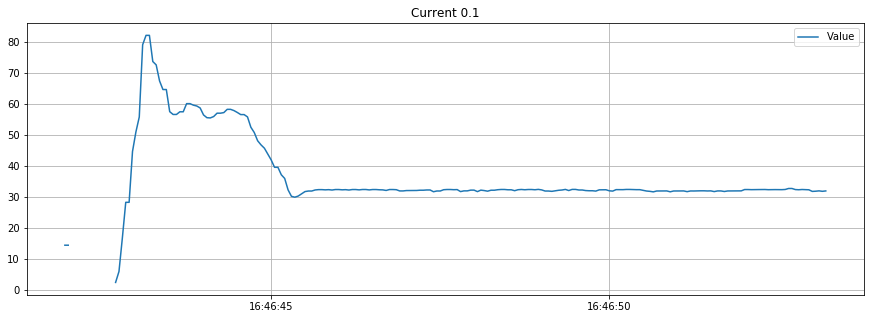

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 17:41:30.800000' and '2019-09-23 17:41:50.800000' ORDER BY DataSavedTime ASC


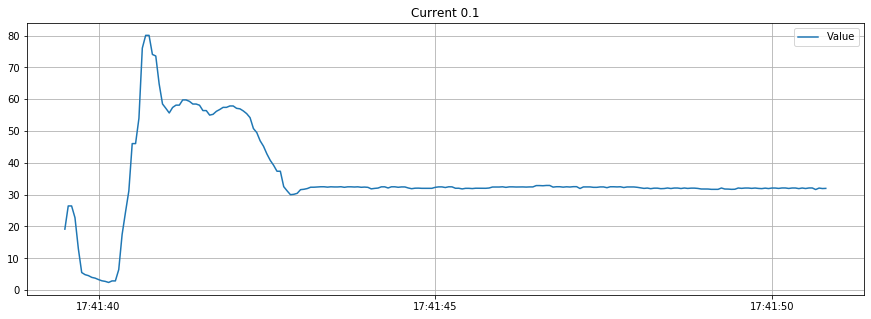

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-23 17:53:26.700000' and '2019-09-23 17:53:46.700000' ORDER BY DataSavedTime ASC


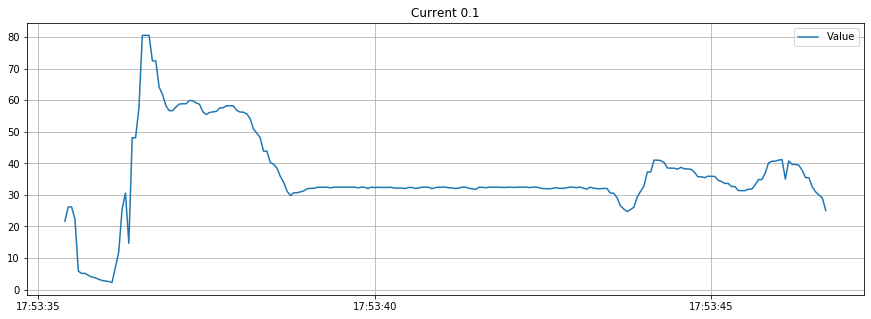

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:11:26.300000' and '2019-09-24 08:11:46.300000' ORDER BY DataSavedTime ASC


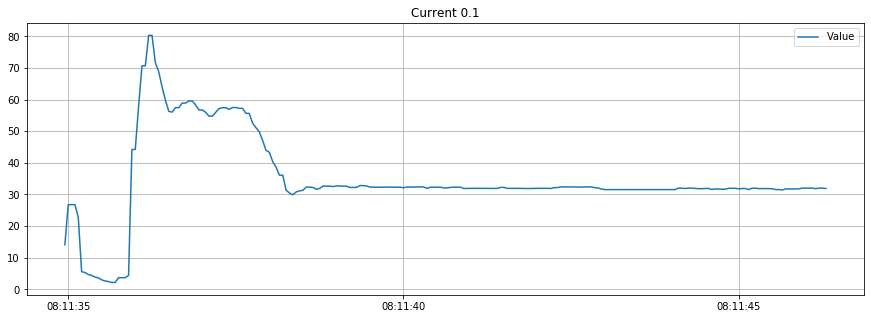

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:12:47.400000' and '2019-09-24 08:13:07.400000' ORDER BY DataSavedTime ASC


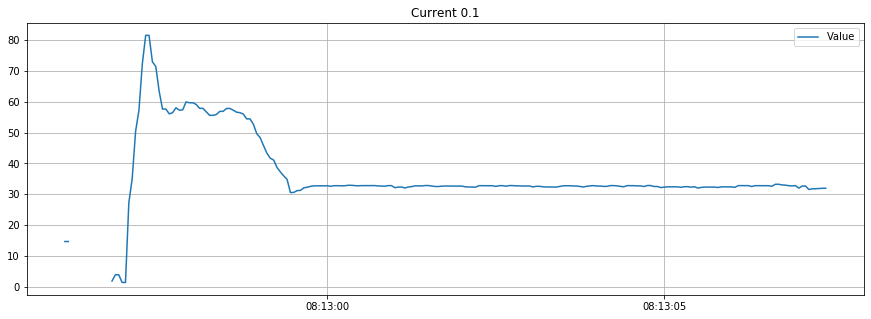

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:17:00.100000' and '2019-09-24 08:17:20.100000' ORDER BY DataSavedTime ASC


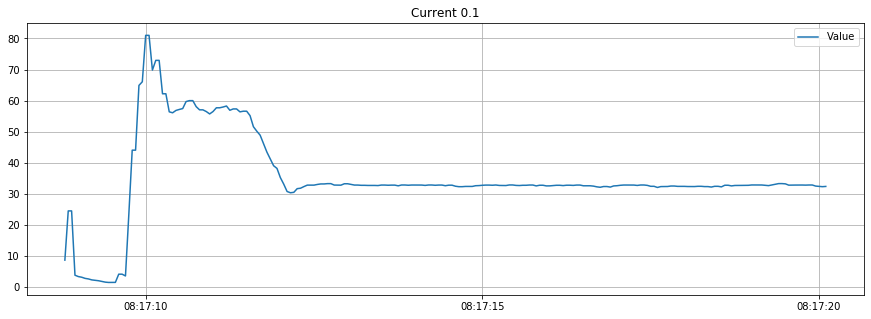

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:20:29.300000' and '2019-09-24 08:20:49.300000' ORDER BY DataSavedTime ASC


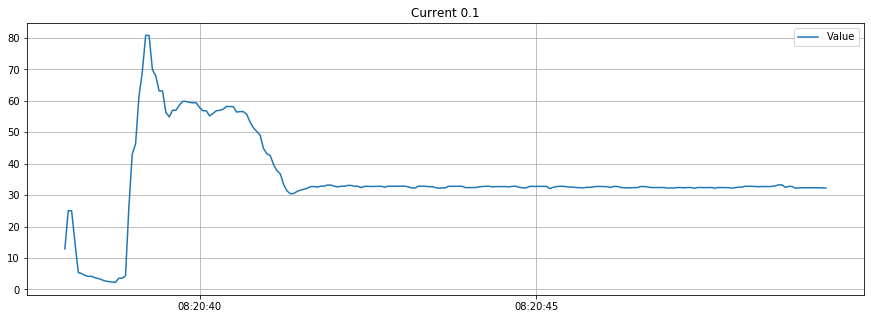

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:27:53.200000' and '2019-09-24 08:28:13.200000' ORDER BY DataSavedTime ASC


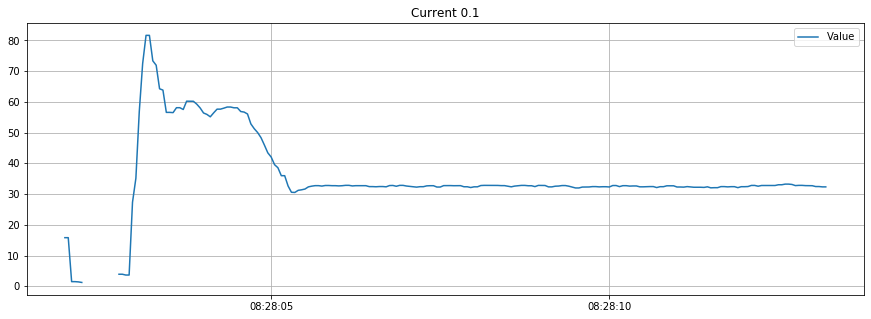

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:27:53.300000' and '2019-09-24 08:28:13.300000' ORDER BY DataSavedTime ASC


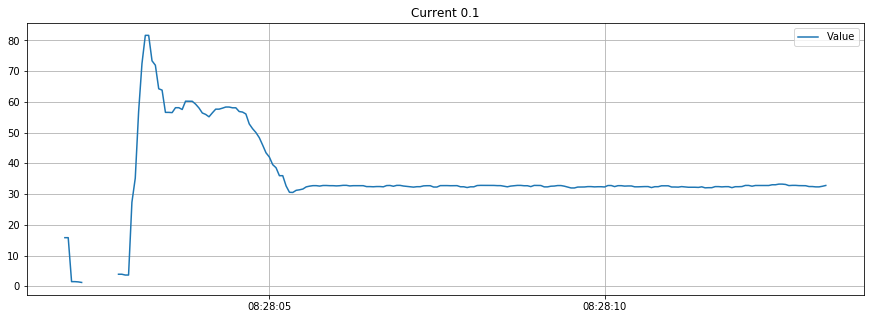

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:46:35.900000' and '2019-09-24 08:46:55.900000' ORDER BY DataSavedTime ASC


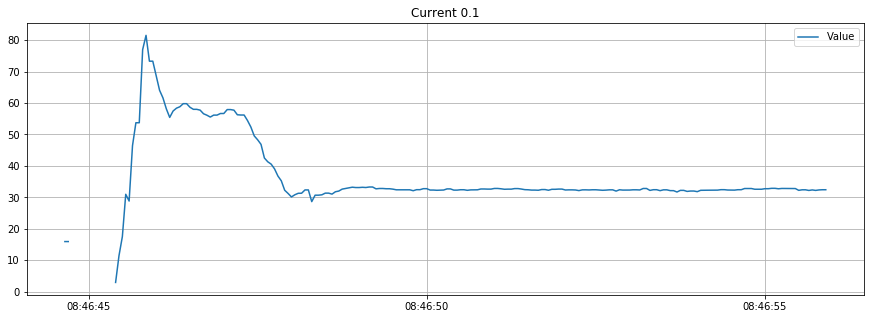

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 08:46:36' and '2019-09-24 08:46:56' ORDER BY DataSavedTime ASC


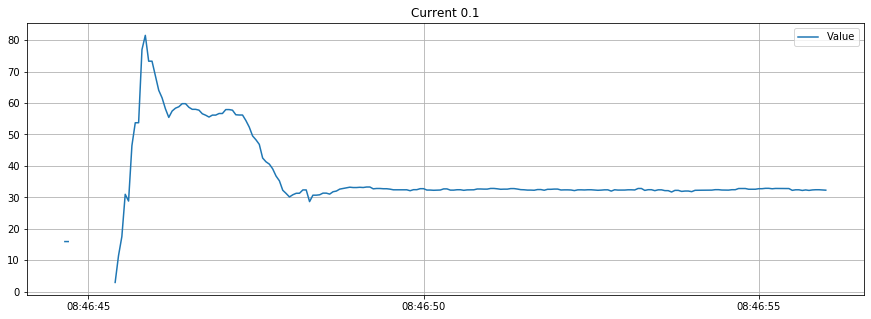

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 09:46:52.500000' and '2019-09-24 09:47:12.500000' ORDER BY DataSavedTime ASC


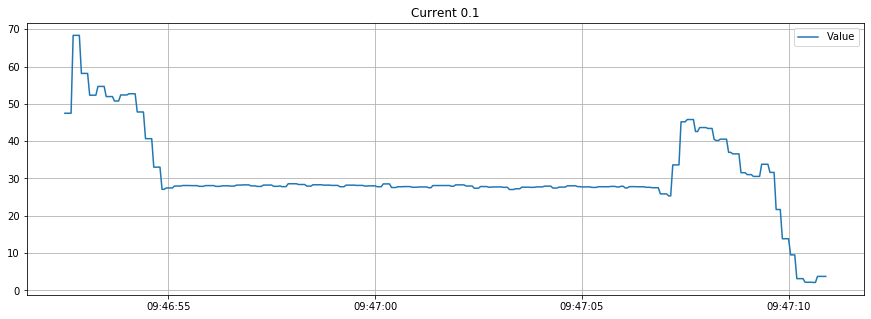

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 10:16:51.400000' and '2019-09-24 10:17:11.400000' ORDER BY DataSavedTime ASC


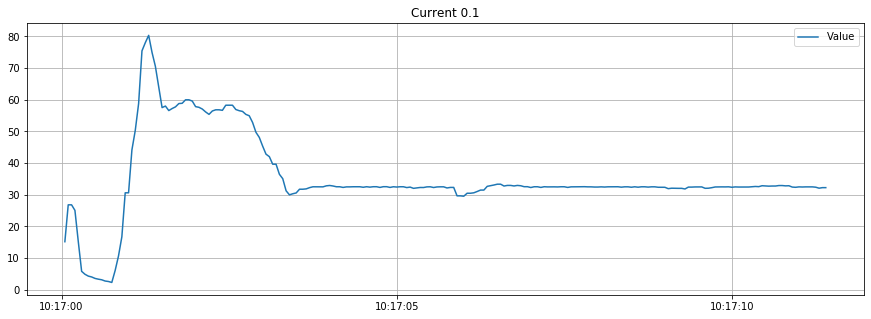

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 11:31:35.100000' and '2019-09-24 11:31:55.100000' ORDER BY DataSavedTime ASC


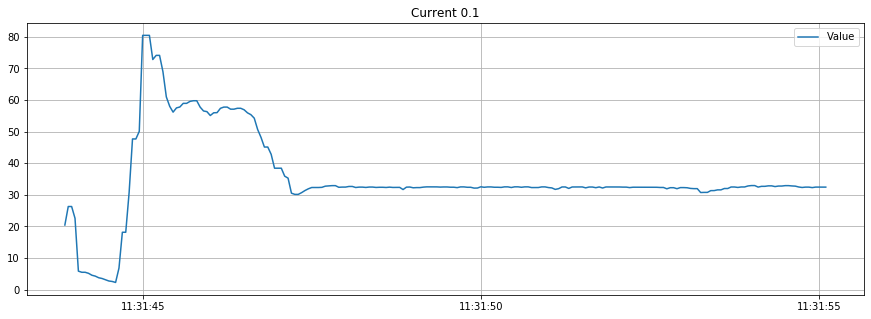

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 11:31:35.200000' and '2019-09-24 11:31:55.200000' ORDER BY DataSavedTime ASC


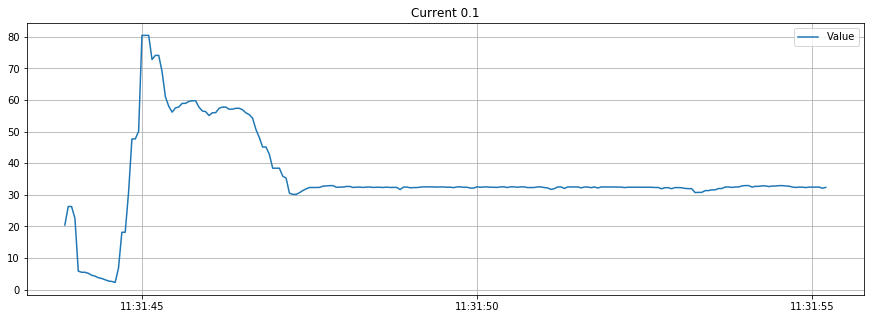

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 11:52:31.600000' and '2019-09-24 11:52:51.600000' ORDER BY DataSavedTime ASC


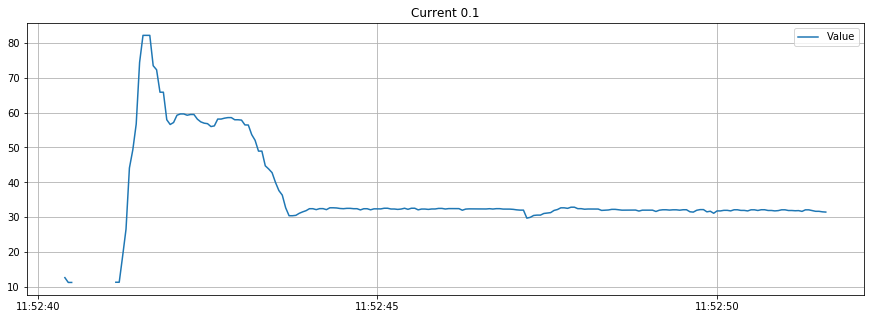

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 11:52:31.700000' and '2019-09-24 11:52:51.700000' ORDER BY DataSavedTime ASC


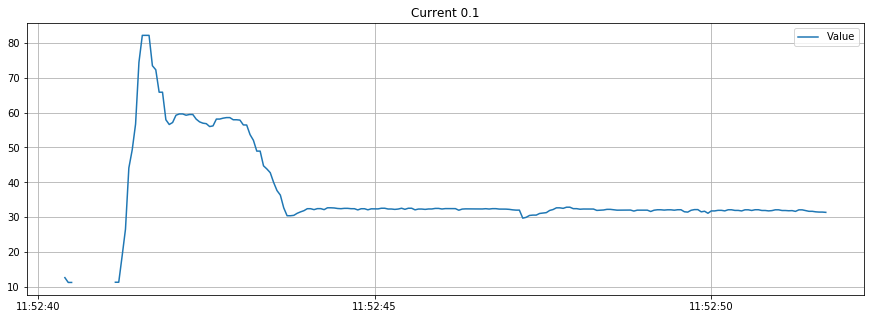

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 13:05:15.100000' and '2019-09-24 13:05:35.100000' ORDER BY DataSavedTime ASC


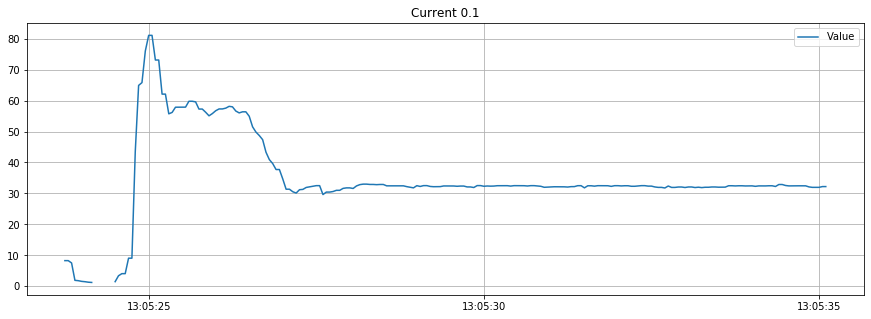

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 14:39:14.100000' and '2019-09-24 14:39:34.100000' ORDER BY DataSavedTime ASC


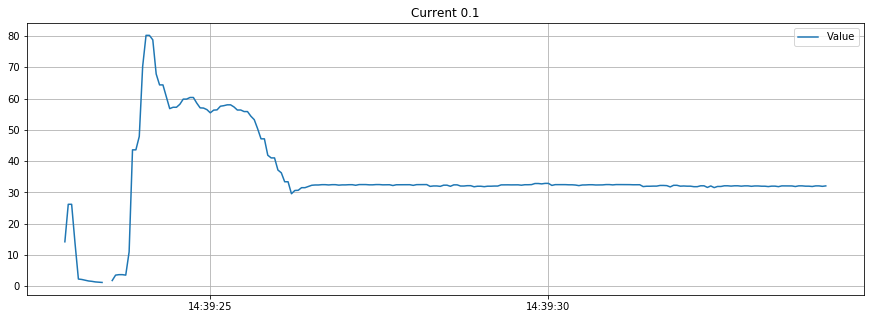

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 14:39:14.200000' and '2019-09-24 14:39:34.200000' ORDER BY DataSavedTime ASC


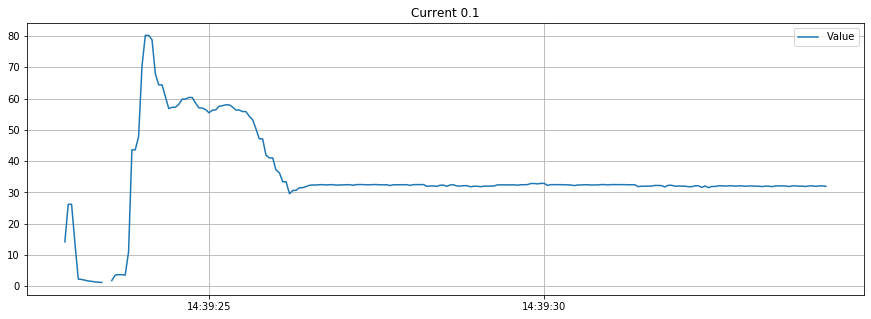

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-24 15:10:17.300000' and '2019-09-24 15:10:37.300000' ORDER BY DataSavedTime ASC


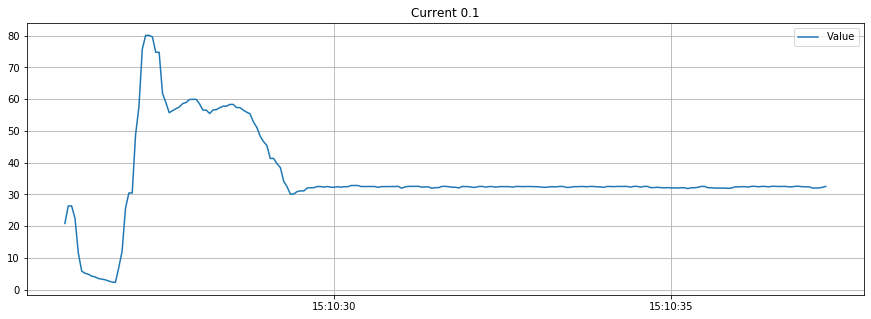

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-25 10:52:14.500000' and '2019-09-25 10:52:34.500000' ORDER BY DataSavedTime ASC


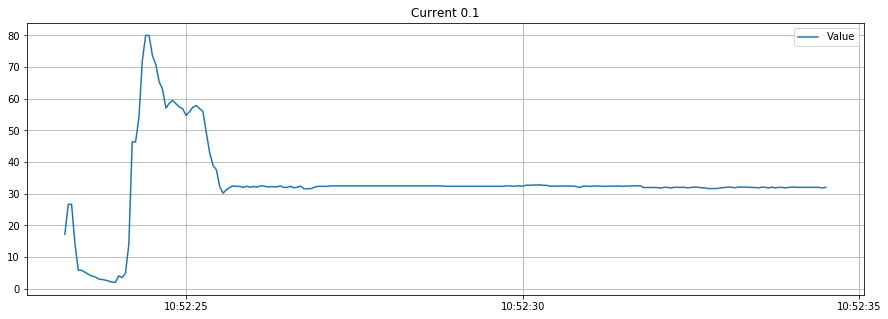

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-25 10:52:14.600000' and '2019-09-25 10:52:34.600000' ORDER BY DataSavedTime ASC


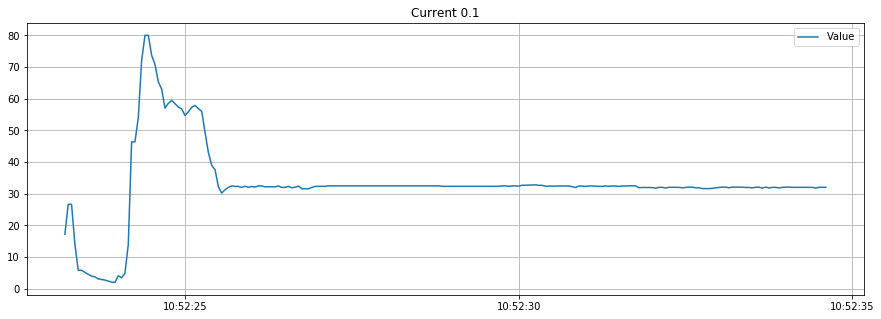

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-25 10:52:14.700000' and '2019-09-25 10:52:34.700000' ORDER BY DataSavedTime ASC


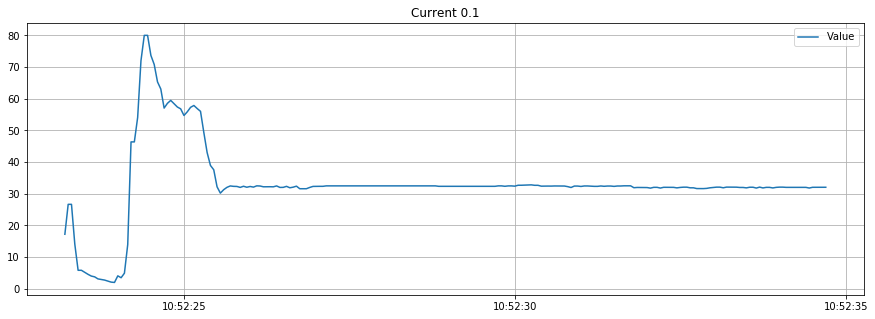

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-25 10:52:14.800000' and '2019-09-25 10:52:34.800000' ORDER BY DataSavedTime ASC


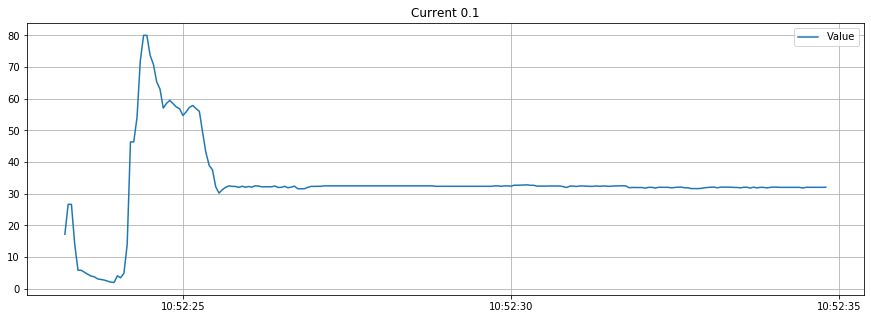

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-25 10:52:14.900000' and '2019-09-25 10:52:34.900000' ORDER BY DataSavedTime ASC


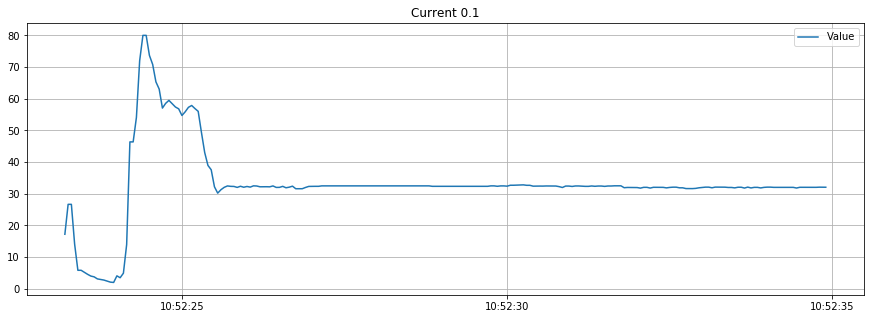

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-25 10:52:15' and '2019-09-25 10:52:35' ORDER BY DataSavedTime ASC


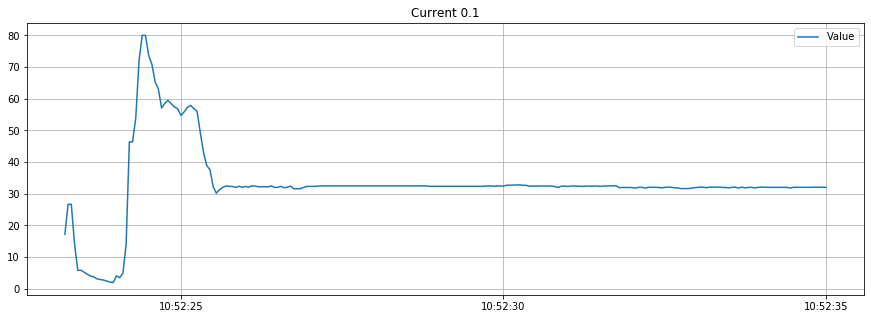

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:41.800000' and '2019-09-26 08:38:01.800000' ORDER BY DataSavedTime ASC


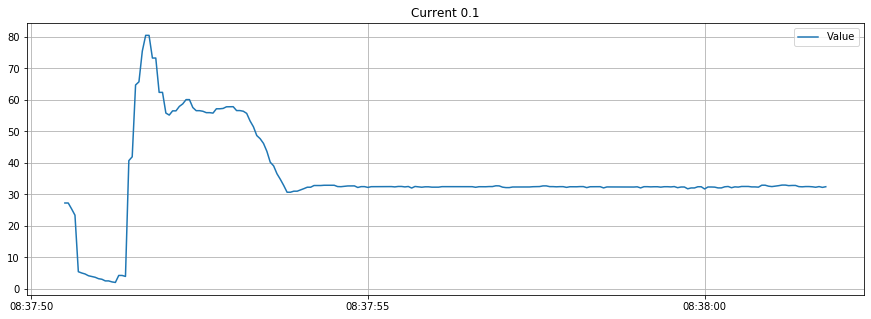

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:41.900000' and '2019-09-26 08:38:01.900000' ORDER BY DataSavedTime ASC


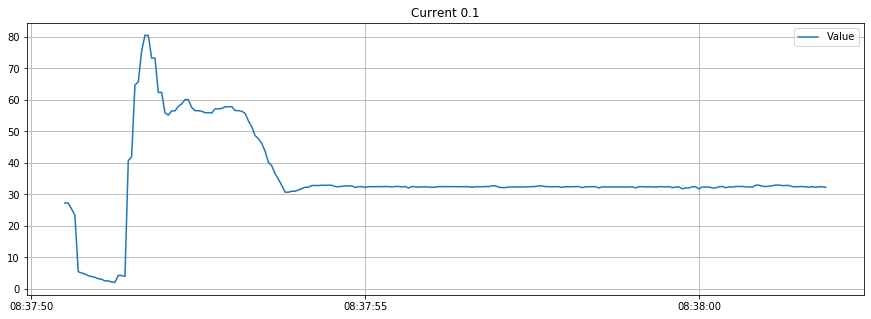

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:42' and '2019-09-26 08:38:02' ORDER BY DataSavedTime ASC


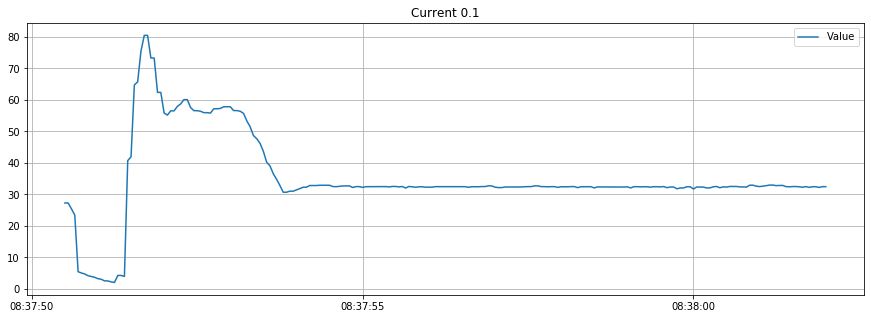

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:42.100000' and '2019-09-26 08:38:02.100000' ORDER BY DataSavedTime ASC


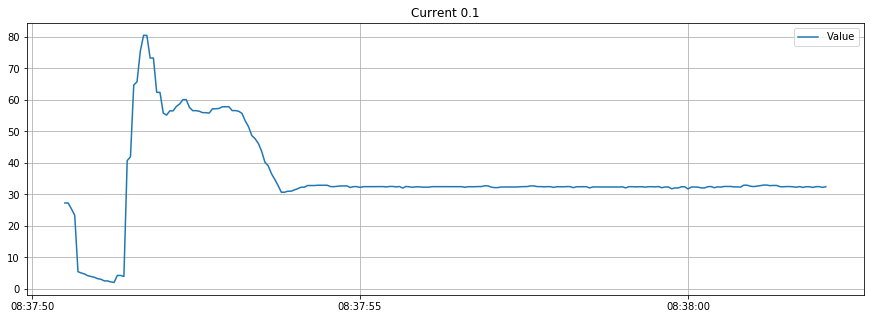

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:42.200000' and '2019-09-26 08:38:02.200000' ORDER BY DataSavedTime ASC


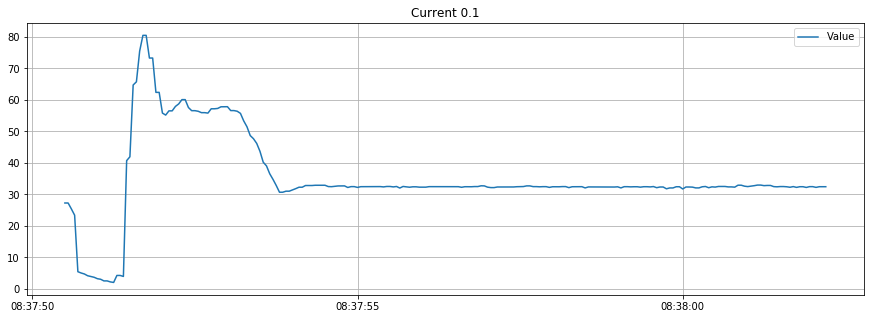

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:42.300000' and '2019-09-26 08:38:02.300000' ORDER BY DataSavedTime ASC


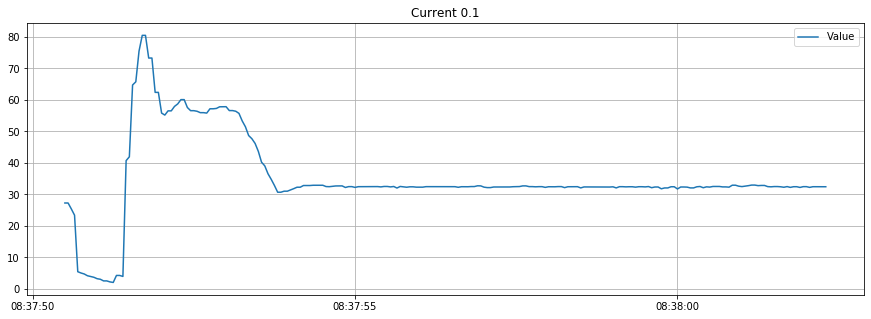

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:42.400000' and '2019-09-26 08:38:02.400000' ORDER BY DataSavedTime ASC


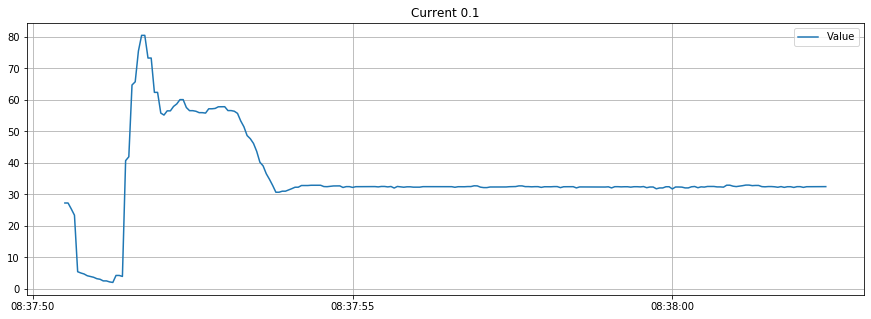

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 08:37:42.500000' and '2019-09-26 08:38:02.500000' ORDER BY DataSavedTime ASC


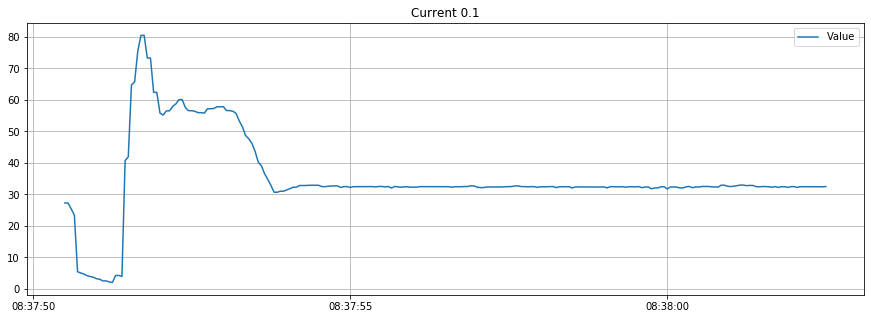

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:32.500000' and '2019-09-26 12:19:52.500000' ORDER BY DataSavedTime ASC


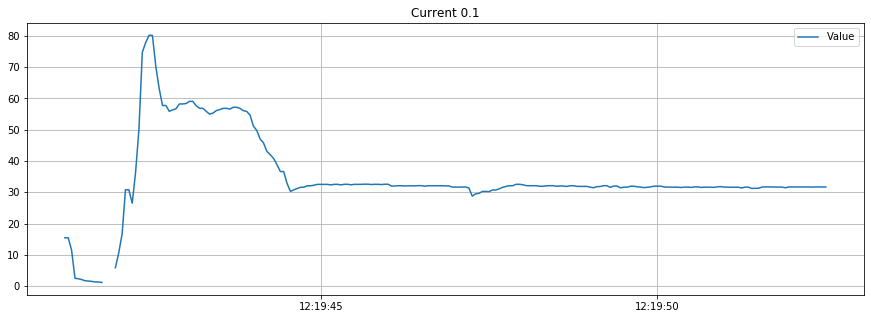

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:32.600000' and '2019-09-26 12:19:52.600000' ORDER BY DataSavedTime ASC


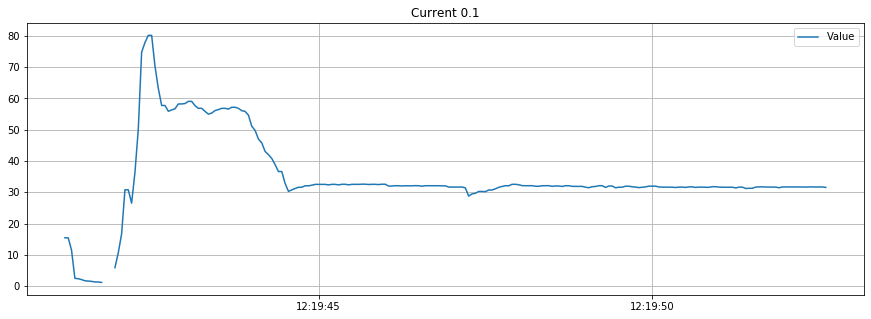

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:32.700000' and '2019-09-26 12:19:52.700000' ORDER BY DataSavedTime ASC


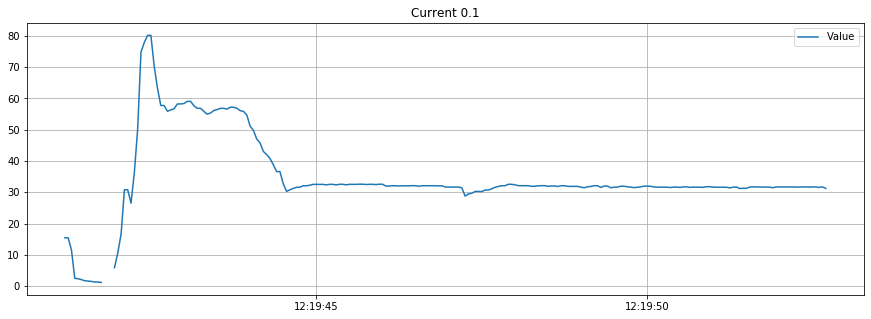

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:32.800000' and '2019-09-26 12:19:52.800000' ORDER BY DataSavedTime ASC


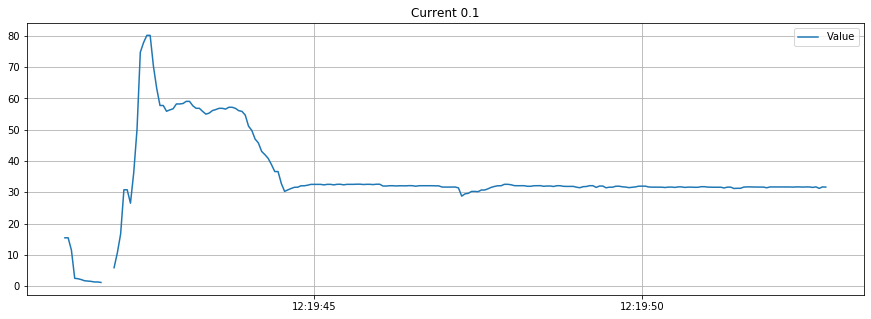

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:32.900000' and '2019-09-26 12:19:52.900000' ORDER BY DataSavedTime ASC


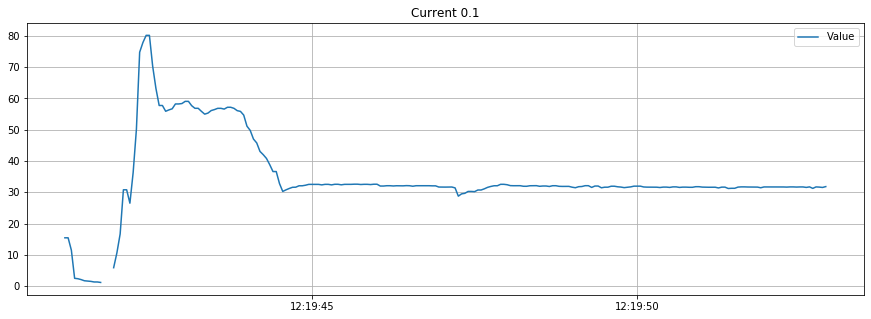

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:33' and '2019-09-26 12:19:53' ORDER BY DataSavedTime ASC


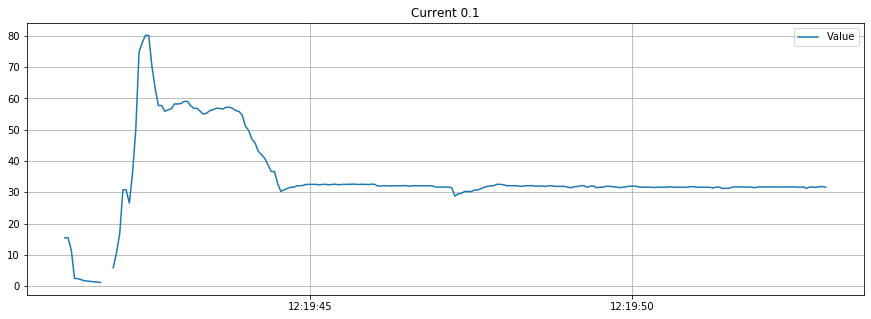

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:33.100000' and '2019-09-26 12:19:53.100000' ORDER BY DataSavedTime ASC


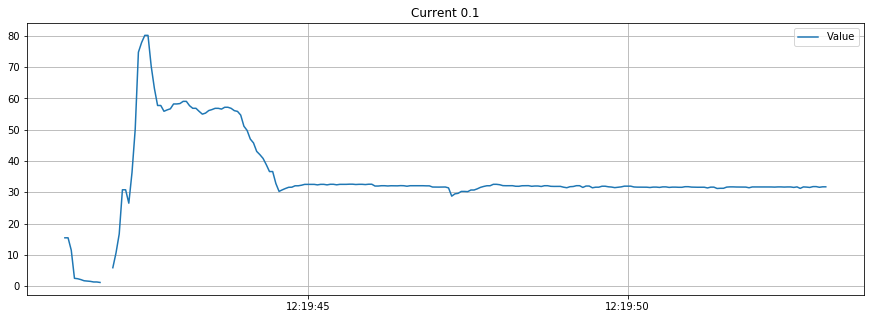

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 12:19:33.200000' and '2019-09-26 12:19:53.200000' ORDER BY DataSavedTime ASC


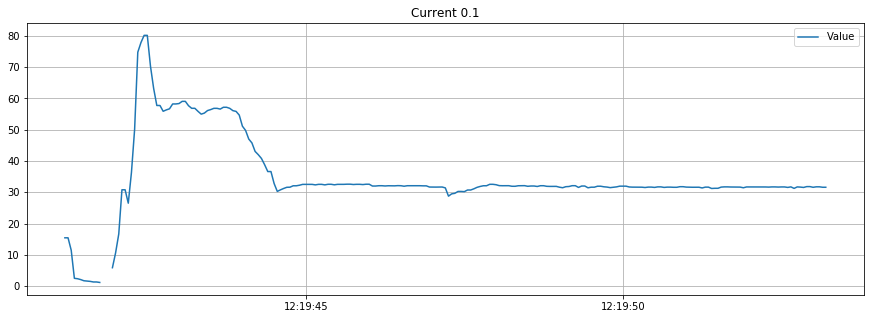

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:55.700000' and '2019-09-26 19:15:15.700000' ORDER BY DataSavedTime ASC


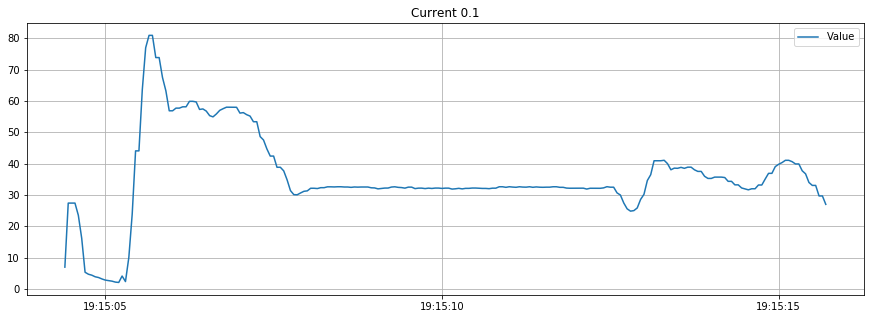

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:55.800000' and '2019-09-26 19:15:15.800000' ORDER BY DataSavedTime ASC


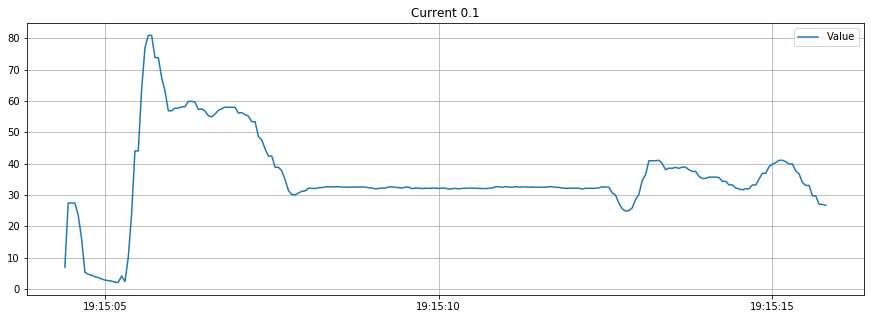

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:55.900000' and '2019-09-26 19:15:15.900000' ORDER BY DataSavedTime ASC


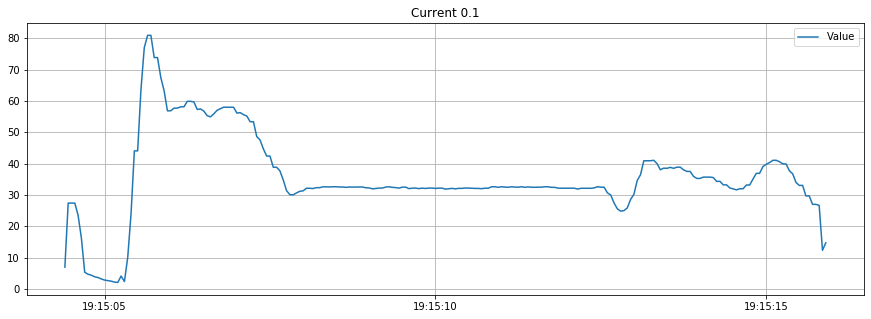

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:56' and '2019-09-26 19:15:16' ORDER BY DataSavedTime ASC


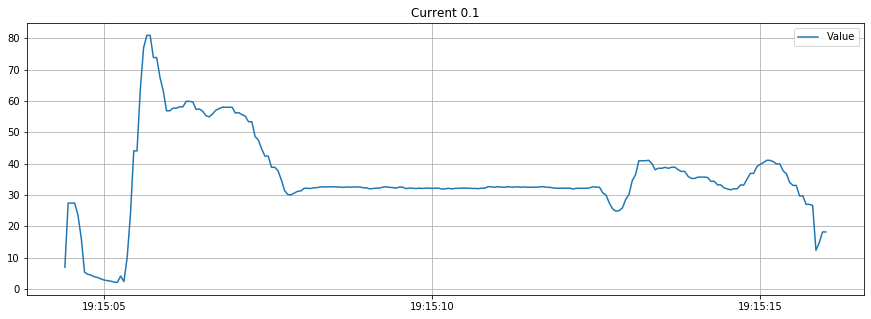

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:56.100000' and '2019-09-26 19:15:16.100000' ORDER BY DataSavedTime ASC


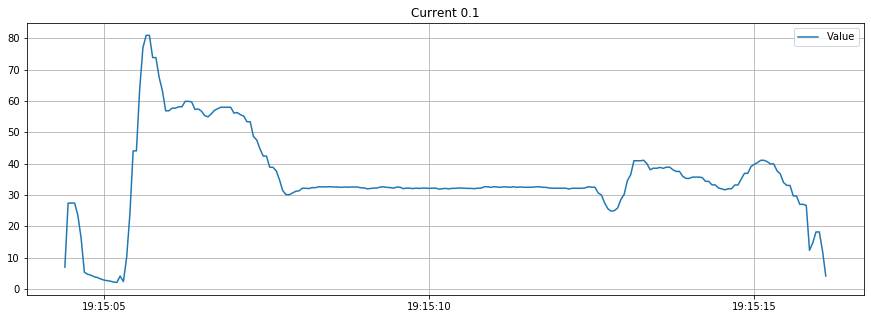

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:56.200000' and '2019-09-26 19:15:16.200000' ORDER BY DataSavedTime ASC


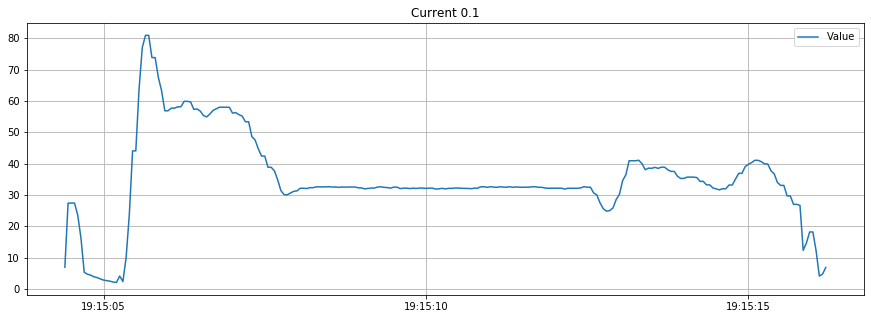

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:56.300000' and '2019-09-26 19:15:16.300000' ORDER BY DataSavedTime ASC


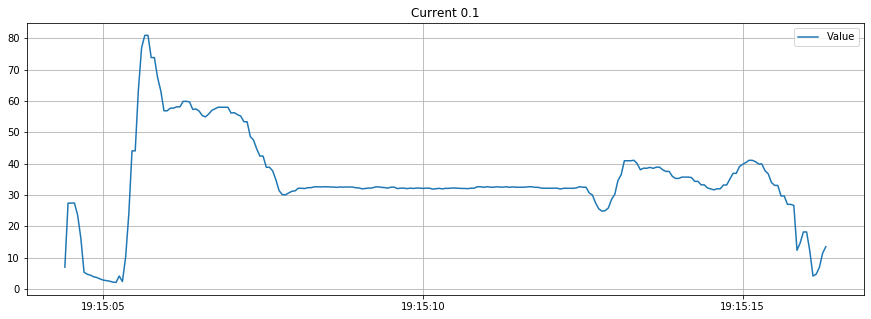

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:56.400000' and '2019-09-26 19:15:16.400000' ORDER BY DataSavedTime ASC


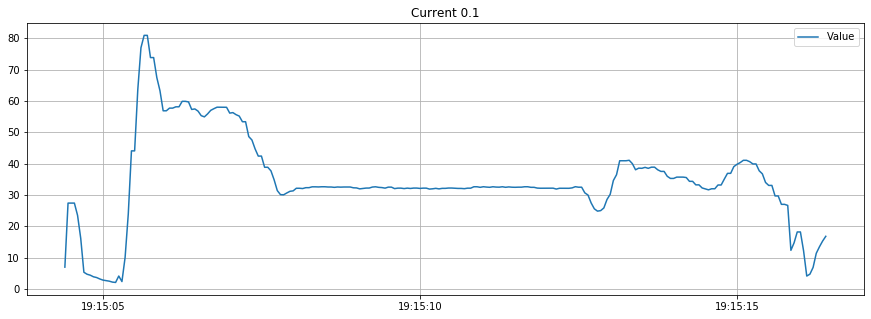

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-26 19:14:56.500000' and '2019-09-26 19:15:16.500000' ORDER BY DataSavedTime ASC


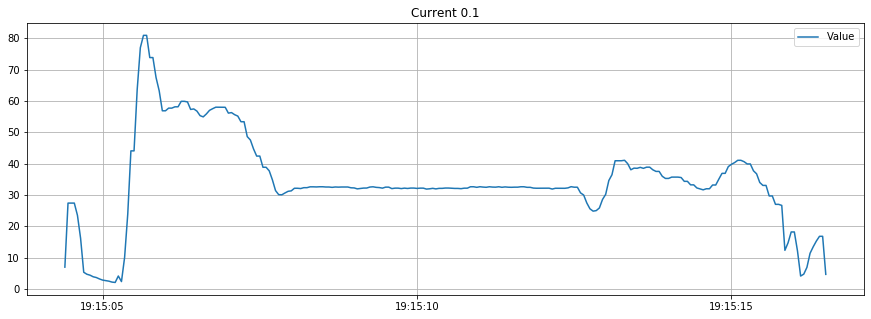

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:50.600000' and '2019-09-27 11:18:10.600000' ORDER BY DataSavedTime ASC


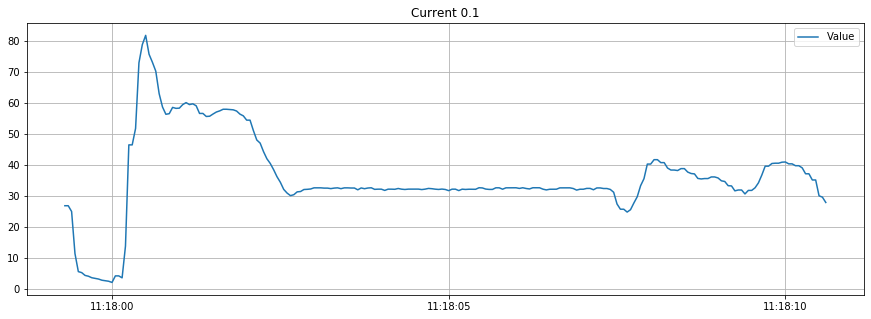

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:50.700000' and '2019-09-27 11:18:10.700000' ORDER BY DataSavedTime ASC


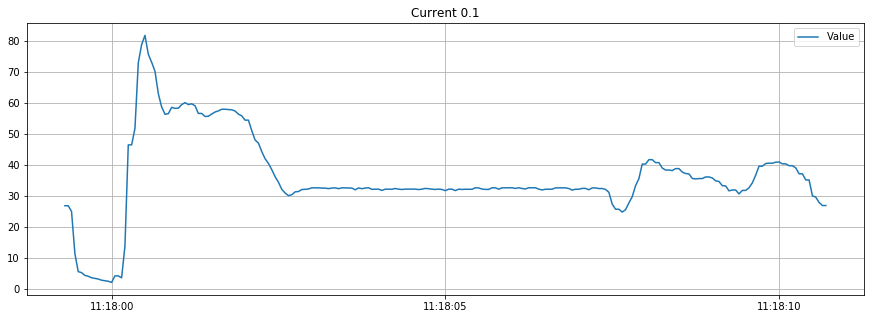

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:50.800000' and '2019-09-27 11:18:10.800000' ORDER BY DataSavedTime ASC


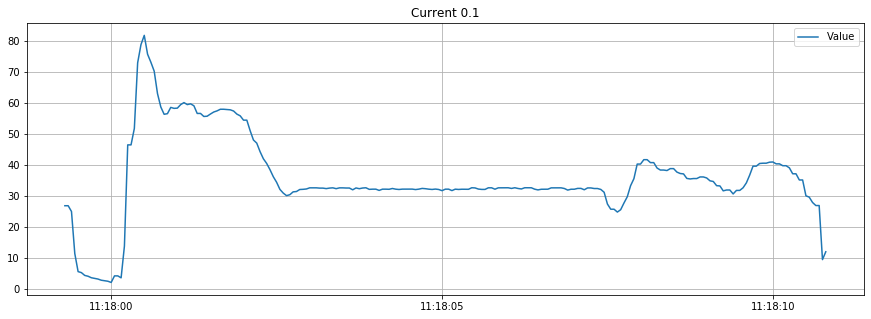

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:50.900000' and '2019-09-27 11:18:10.900000' ORDER BY DataSavedTime ASC


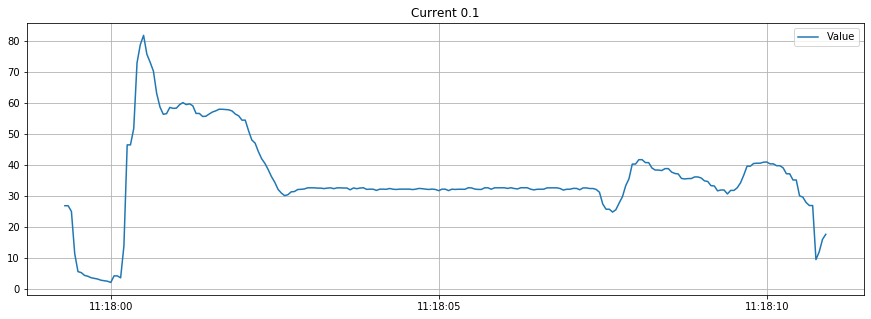

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:51' and '2019-09-27 11:18:11' ORDER BY DataSavedTime ASC


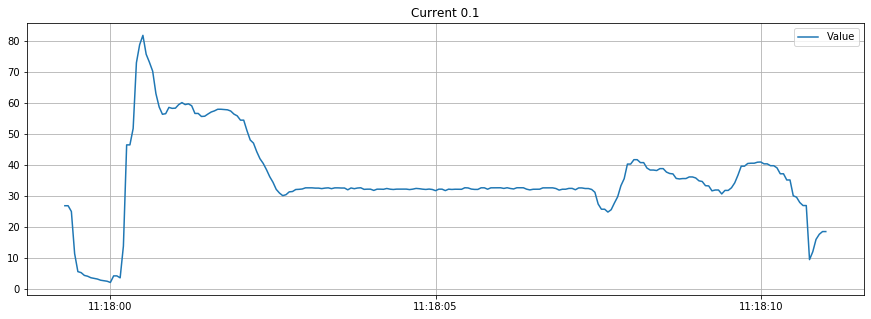

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:51.100000' and '2019-09-27 11:18:11.100000' ORDER BY DataSavedTime ASC


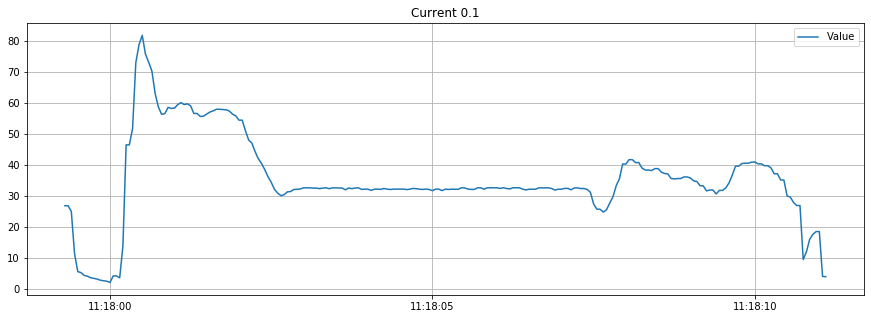

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:51.200000' and '2019-09-27 11:18:11.200000' ORDER BY DataSavedTime ASC


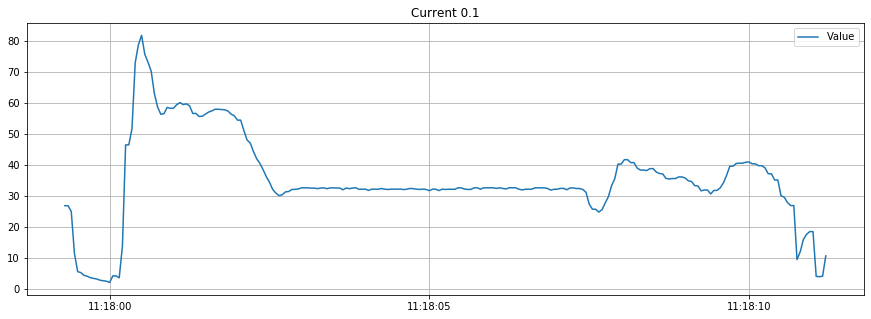

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:51.300000' and '2019-09-27 11:18:11.300000' ORDER BY DataSavedTime ASC


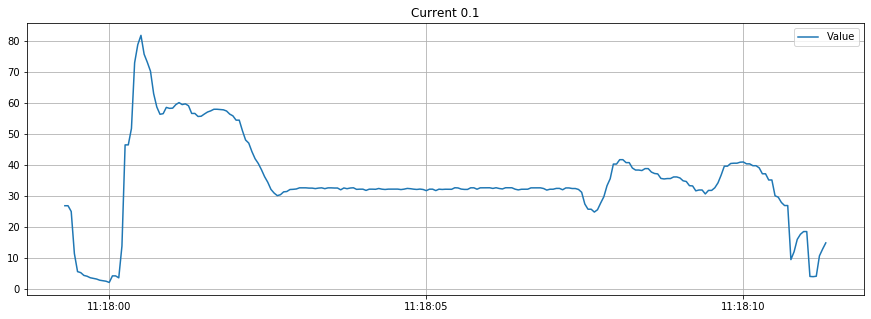

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 11:17:51.400000' and '2019-09-27 11:18:11.400000' ORDER BY DataSavedTime ASC


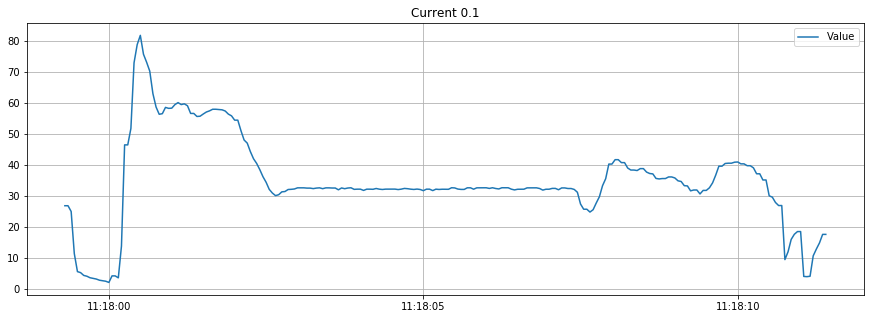

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:01.600000' and '2019-09-27 19:53:21.600000' ORDER BY DataSavedTime ASC


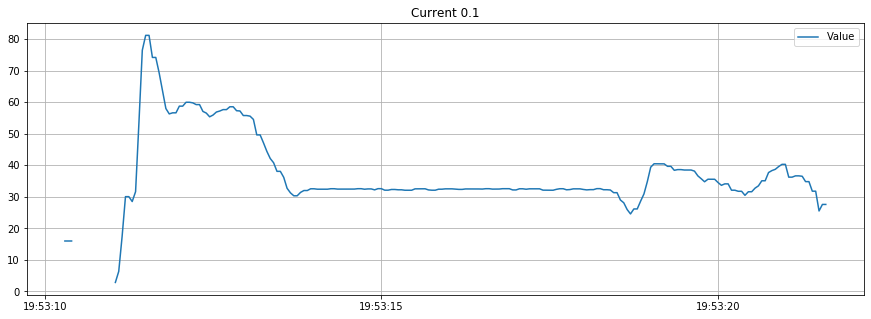

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:01.700000' and '2019-09-27 19:53:21.700000' ORDER BY DataSavedTime ASC


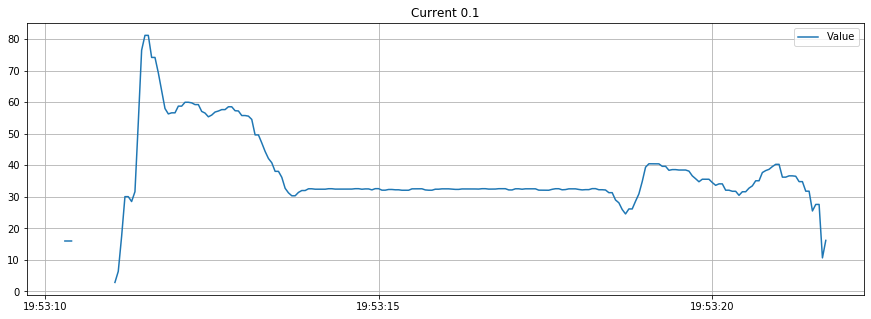

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:01.800000' and '2019-09-27 19:53:21.800000' ORDER BY DataSavedTime ASC


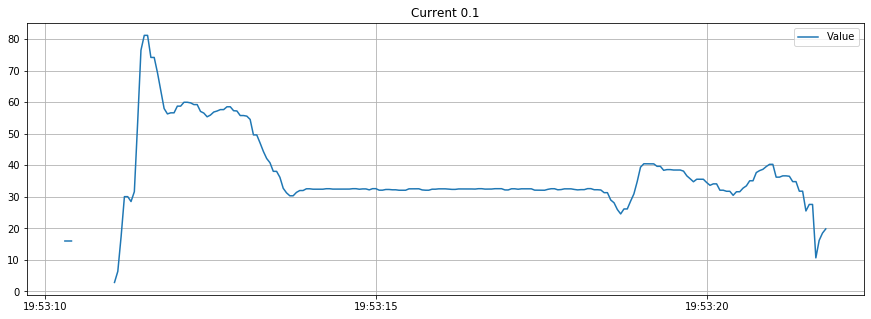

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:01.900000' and '2019-09-27 19:53:21.900000' ORDER BY DataSavedTime ASC


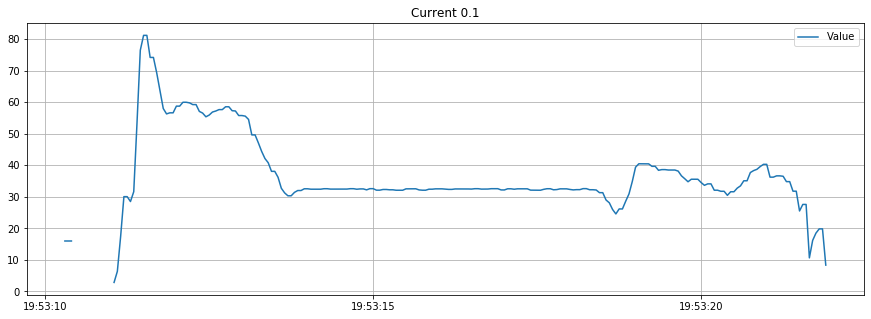

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:02' and '2019-09-27 19:53:22' ORDER BY DataSavedTime ASC


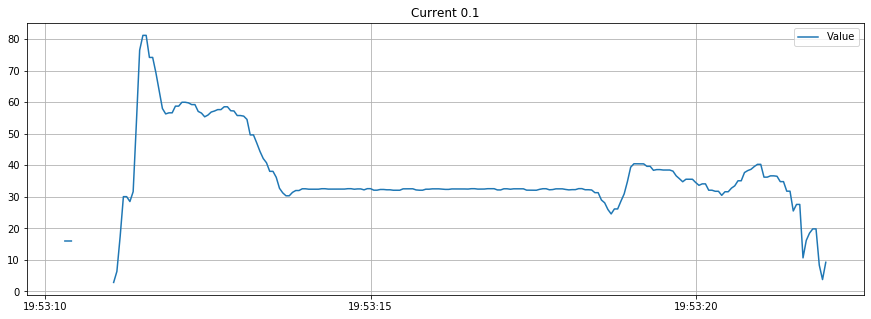

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:02.100000' and '2019-09-27 19:53:22.100000' ORDER BY DataSavedTime ASC


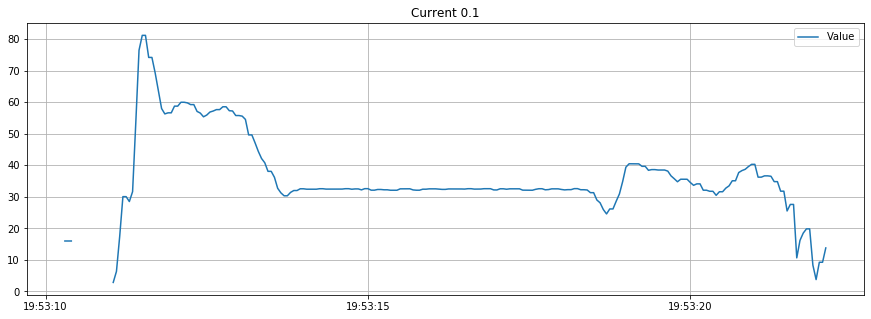

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:02.200000' and '2019-09-27 19:53:22.200000' ORDER BY DataSavedTime ASC


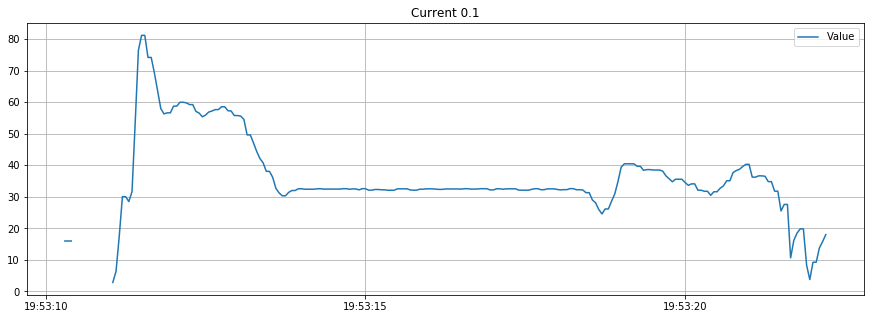

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:02.300000' and '2019-09-27 19:53:22.300000' ORDER BY DataSavedTime ASC


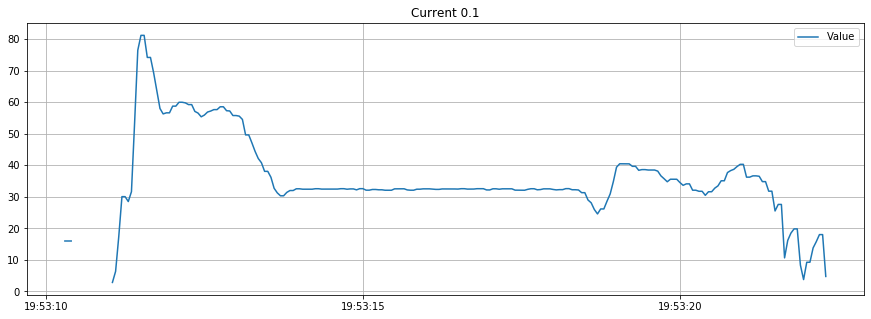

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-09-27 19:53:02.400000' and '2019-09-27 19:53:22.400000' ORDER BY DataSavedTime ASC


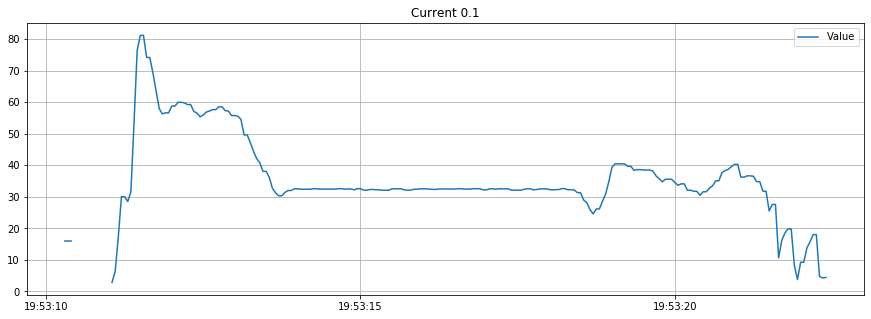

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.100000' and '2019-10-01 12:34:36.100000' ORDER BY DataSavedTime ASC


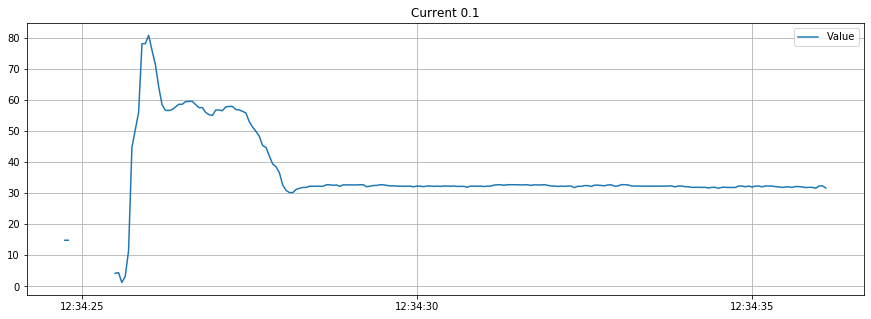

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.200000' and '2019-10-01 12:34:36.200000' ORDER BY DataSavedTime ASC


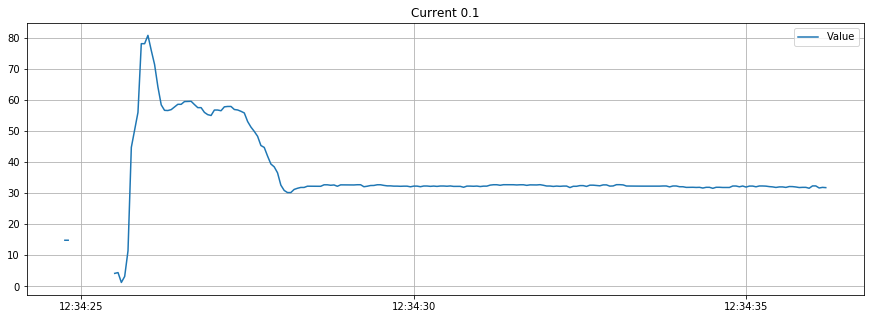

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.300000' and '2019-10-01 12:34:36.300000' ORDER BY DataSavedTime ASC


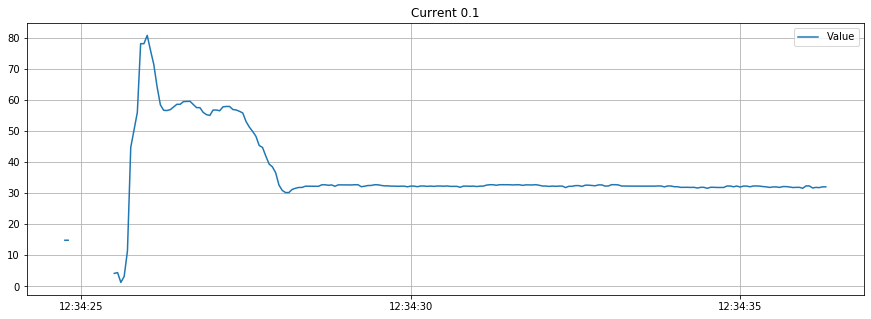

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.400000' and '2019-10-01 12:34:36.400000' ORDER BY DataSavedTime ASC


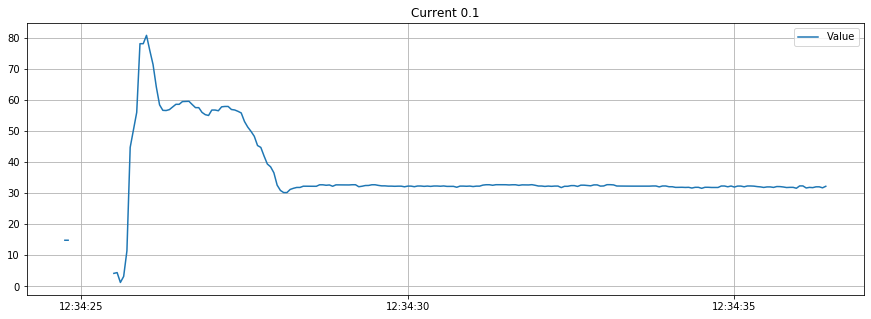

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.500000' and '2019-10-01 12:34:36.500000' ORDER BY DataSavedTime ASC


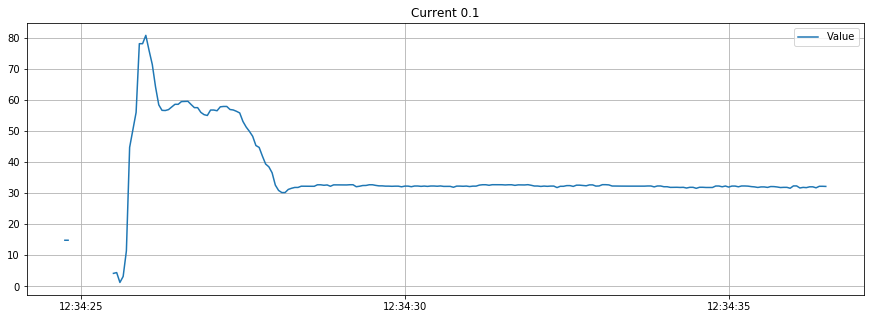

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.600000' and '2019-10-01 12:34:36.600000' ORDER BY DataSavedTime ASC


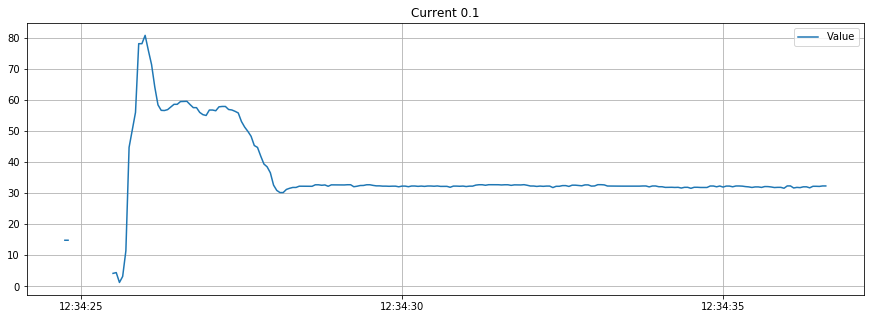

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.700000' and '2019-10-01 12:34:36.700000' ORDER BY DataSavedTime ASC


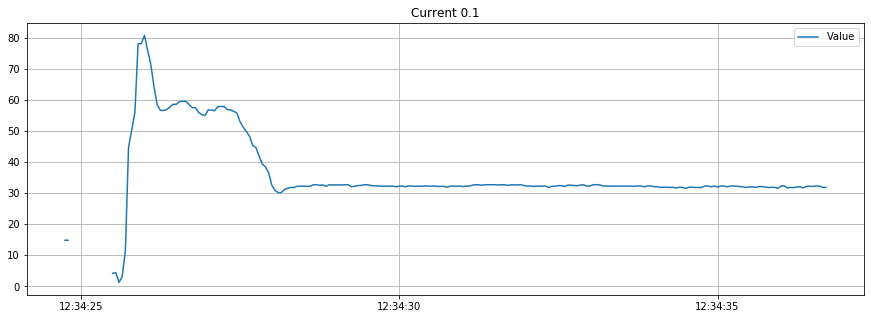

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-01 12:34:16.800000' and '2019-10-01 12:34:36.800000' ORDER BY DataSavedTime ASC


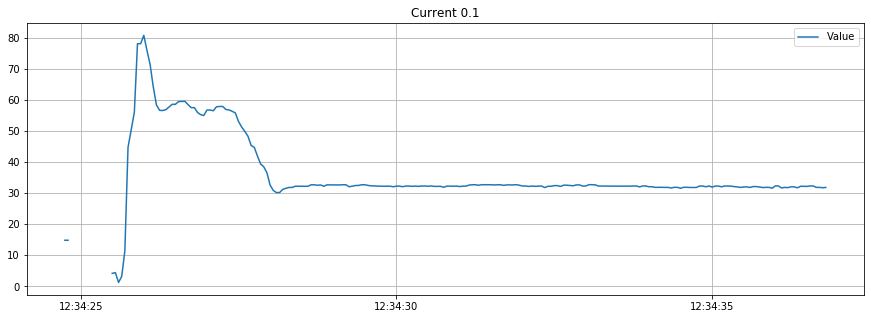

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 10:51:02.800000' and '2019-10-02 10:51:22.800000' ORDER BY DataSavedTime ASC


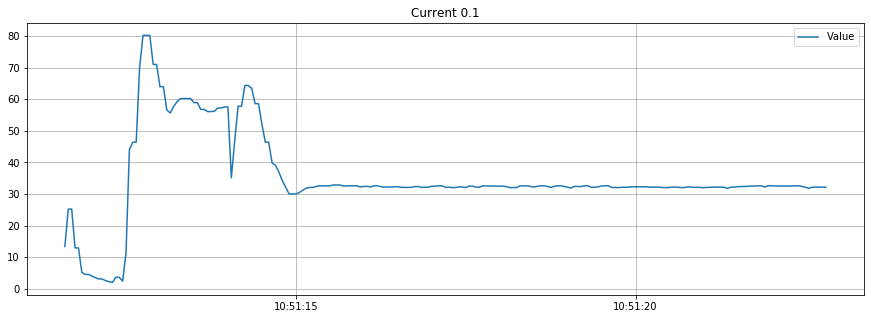

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 10:51:02.900000' and '2019-10-02 10:51:22.900000' ORDER BY DataSavedTime ASC


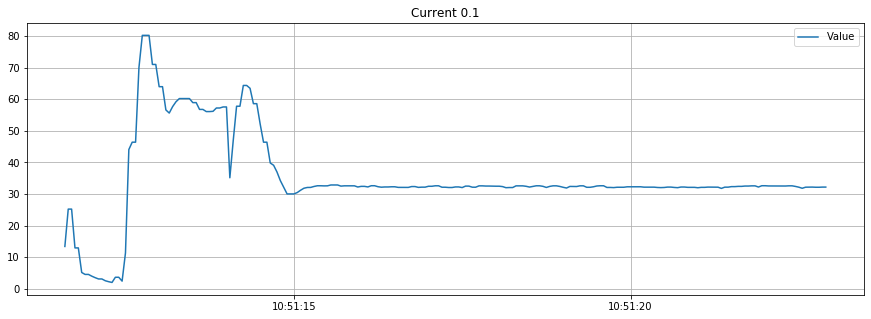

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.100000' and '2019-10-02 14:51:32.100000' ORDER BY DataSavedTime ASC


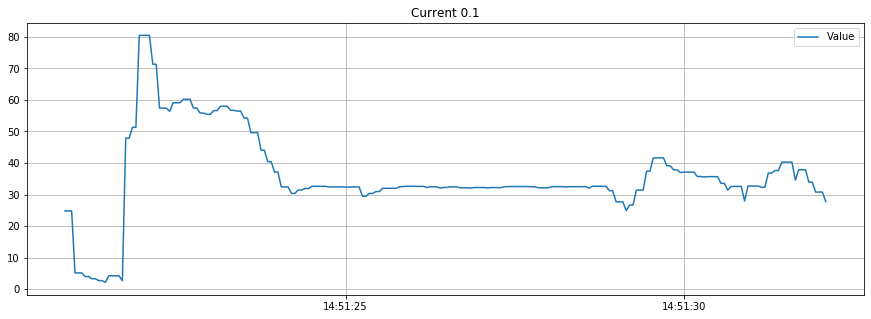

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.200000' and '2019-10-02 14:51:32.200000' ORDER BY DataSavedTime ASC


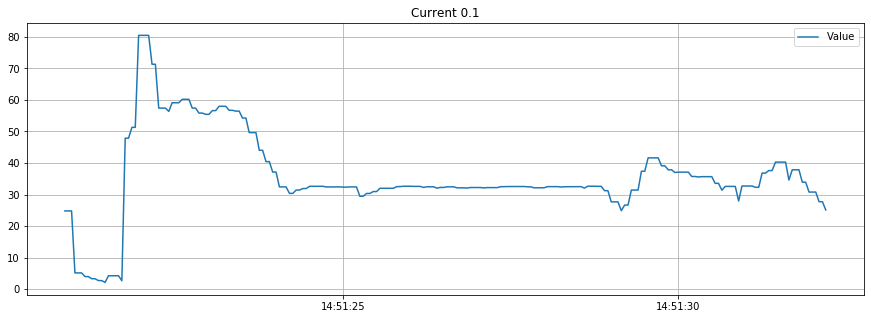

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.300000' and '2019-10-02 14:51:32.300000' ORDER BY DataSavedTime ASC


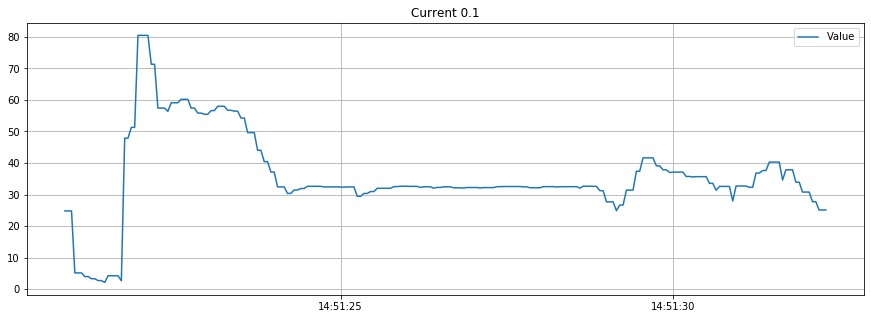

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.400000' and '2019-10-02 14:51:32.400000' ORDER BY DataSavedTime ASC


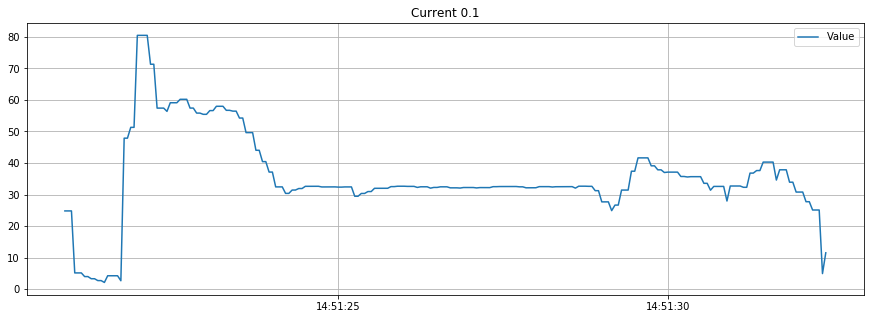

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.500000' and '2019-10-02 14:51:32.500000' ORDER BY DataSavedTime ASC


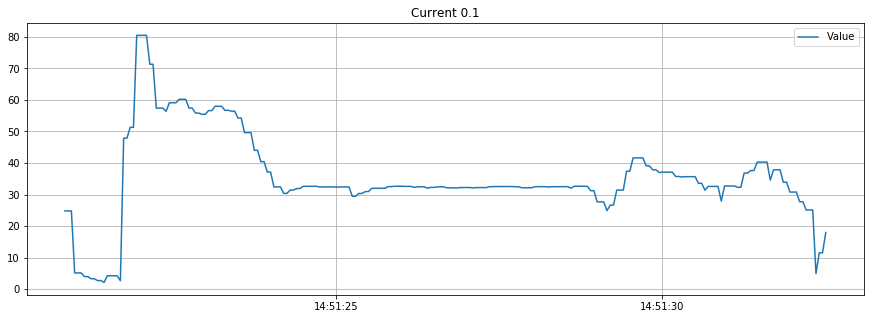

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.600000' and '2019-10-02 14:51:32.600000' ORDER BY DataSavedTime ASC


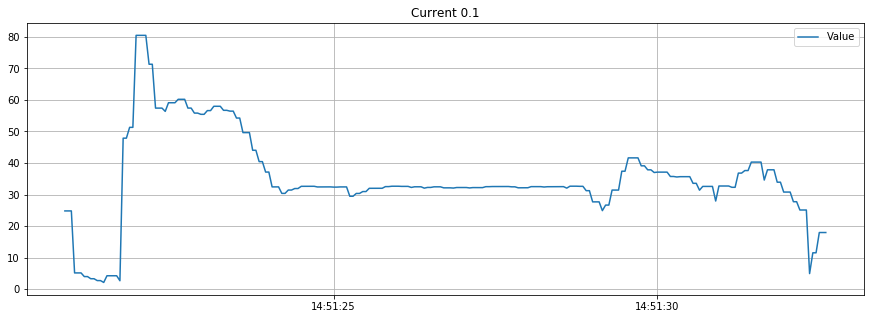

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.700000' and '2019-10-02 14:51:32.700000' ORDER BY DataSavedTime ASC


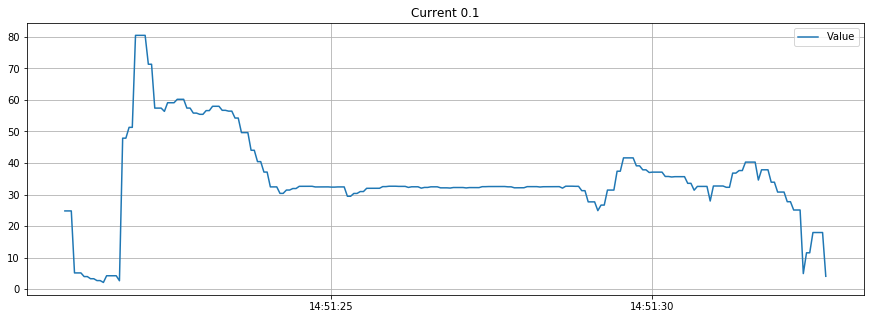

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.800000' and '2019-10-02 14:51:32.800000' ORDER BY DataSavedTime ASC


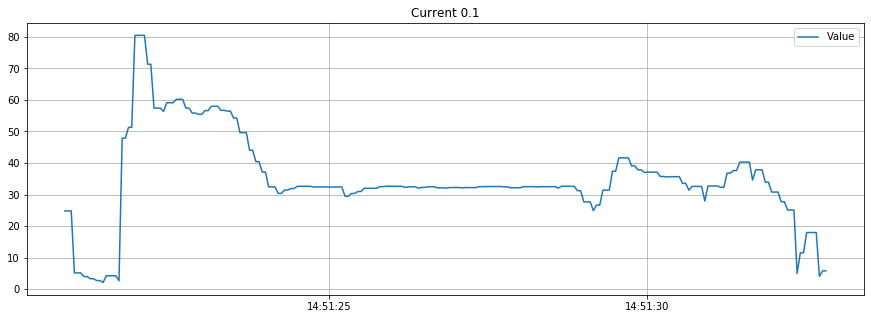

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 14:51:12.900000' and '2019-10-02 14:51:32.900000' ORDER BY DataSavedTime ASC


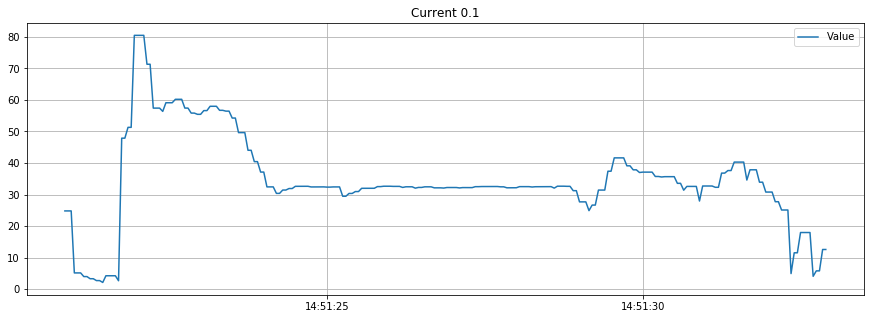

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.100000' and '2019-10-02 15:23:26.100000' ORDER BY DataSavedTime ASC


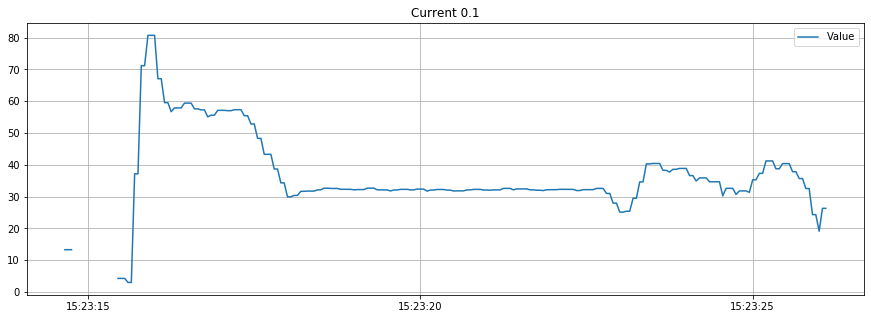

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.200000' and '2019-10-02 15:23:26.200000' ORDER BY DataSavedTime ASC


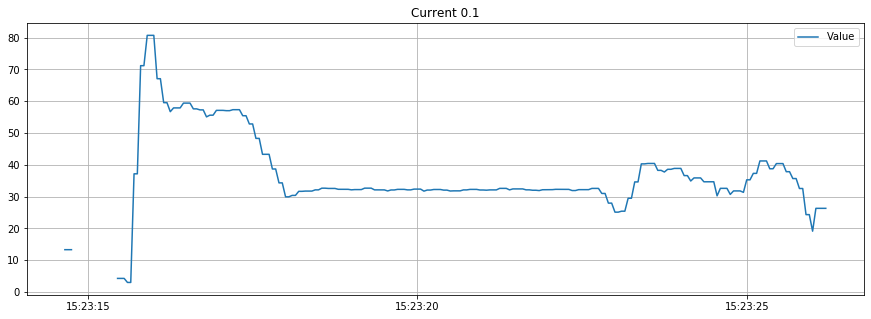

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.300000' and '2019-10-02 15:23:26.300000' ORDER BY DataSavedTime ASC


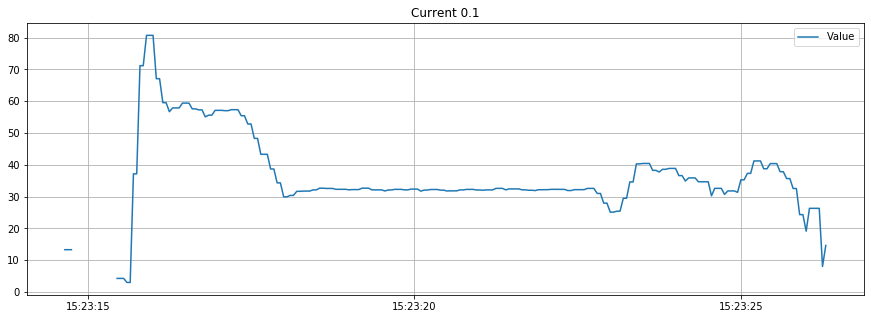

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.400000' and '2019-10-02 15:23:26.400000' ORDER BY DataSavedTime ASC


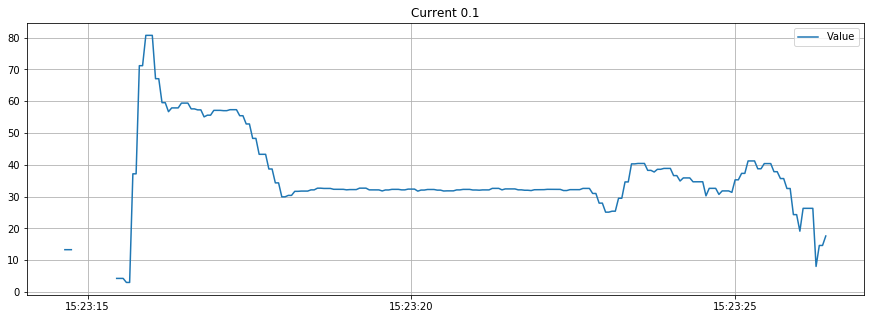

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.500000' and '2019-10-02 15:23:26.500000' ORDER BY DataSavedTime ASC


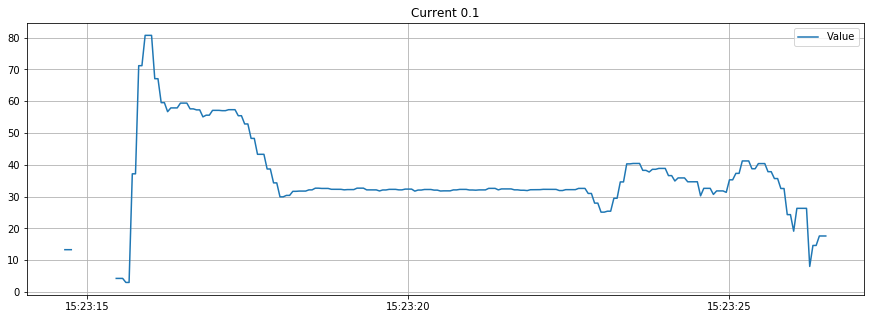

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.600000' and '2019-10-02 15:23:26.600000' ORDER BY DataSavedTime ASC


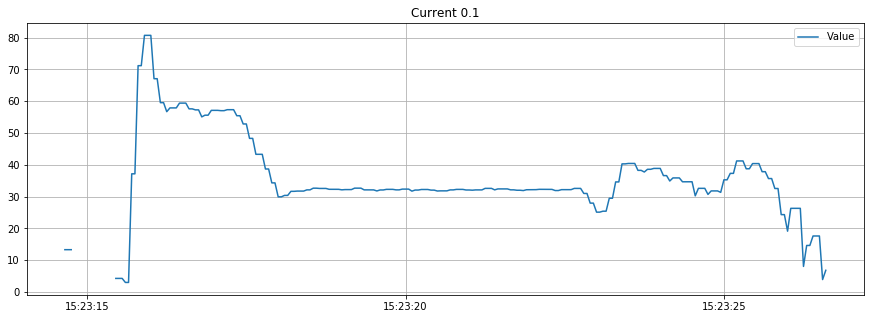

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 15:23:06.700000' and '2019-10-02 15:23:26.700000' ORDER BY DataSavedTime ASC


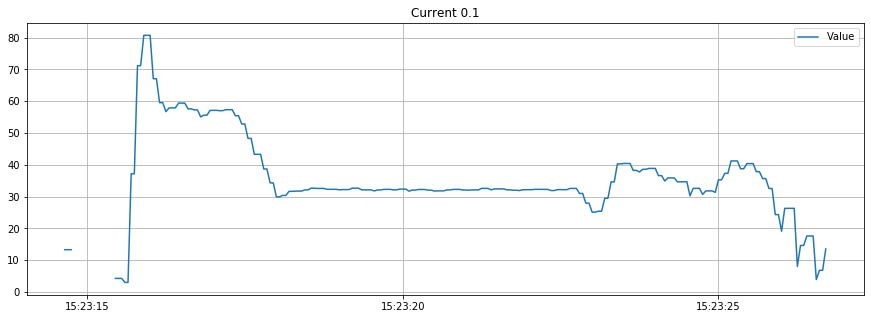

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:39.500000' and '2019-10-02 18:32:59.500000' ORDER BY DataSavedTime ASC


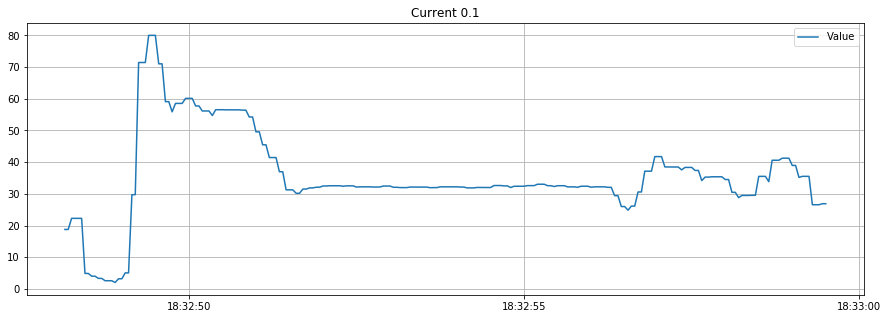

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:39.600000' and '2019-10-02 18:32:59.600000' ORDER BY DataSavedTime ASC


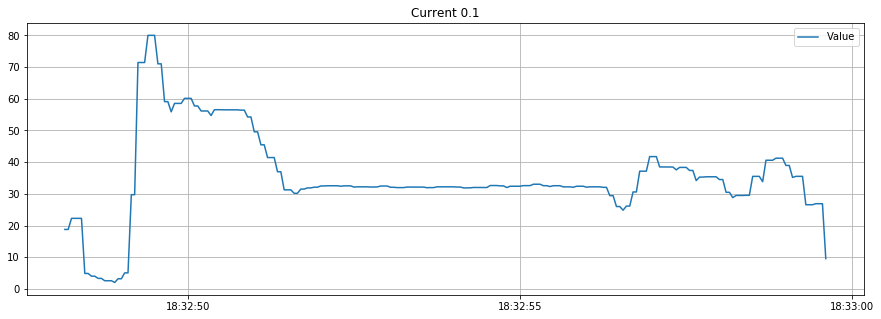

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:39.700000' and '2019-10-02 18:32:59.700000' ORDER BY DataSavedTime ASC


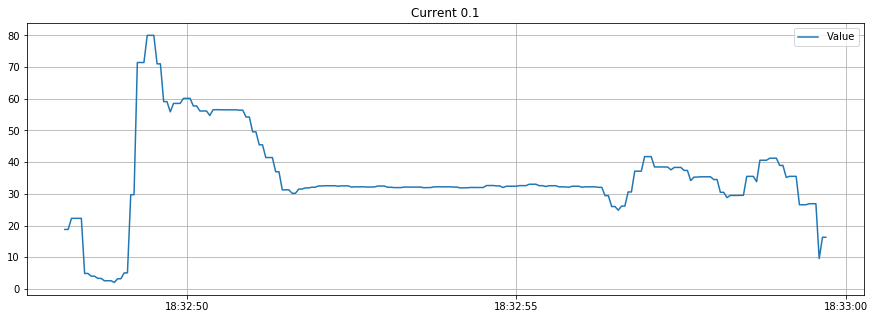

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:39.800000' and '2019-10-02 18:32:59.800000' ORDER BY DataSavedTime ASC


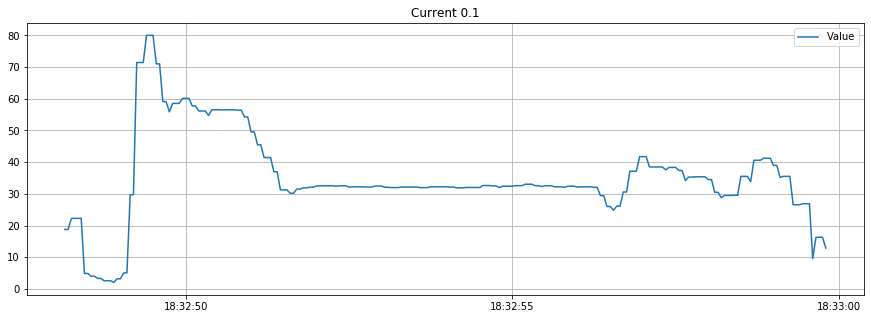

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:39.900000' and '2019-10-02 18:32:59.900000' ORDER BY DataSavedTime ASC


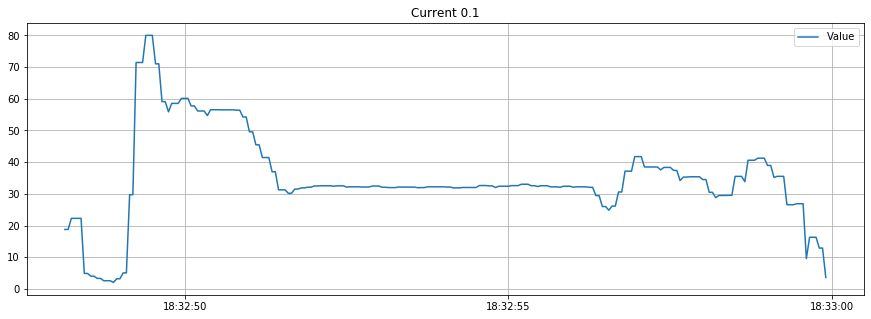

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:40' and '2019-10-02 18:33:00' ORDER BY DataSavedTime ASC


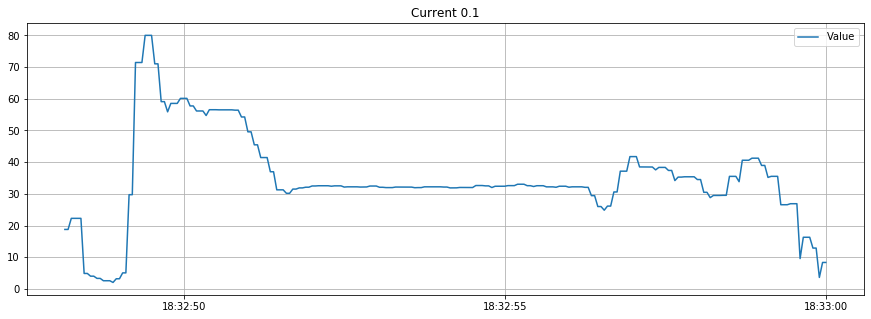

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:40.100000' and '2019-10-02 18:33:00.100000' ORDER BY DataSavedTime ASC


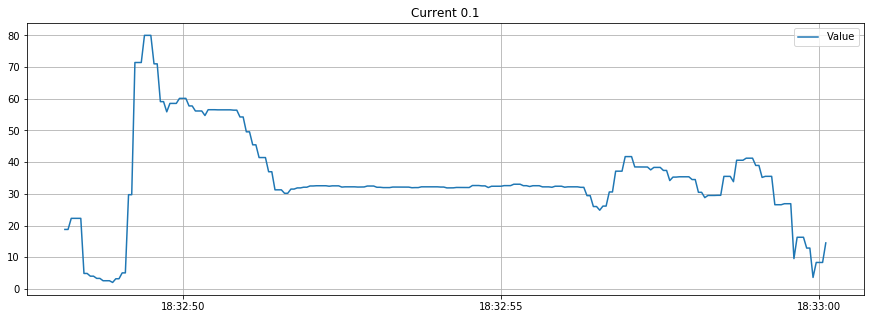

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-02 18:32:40.200000' and '2019-10-02 18:33:00.200000' ORDER BY DataSavedTime ASC


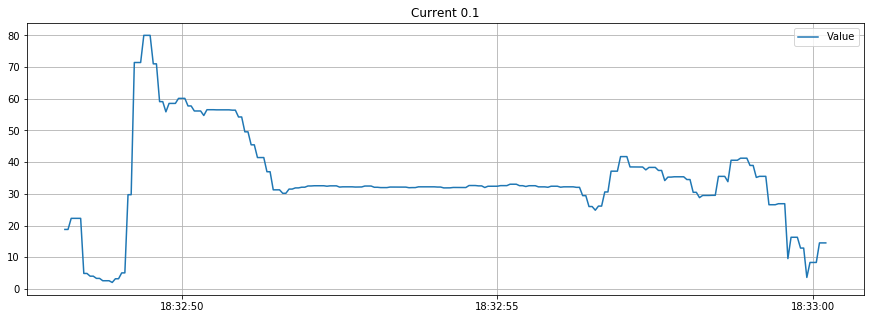

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.100000' and '2019-10-04 09:38:29.100000' ORDER BY DataSavedTime ASC


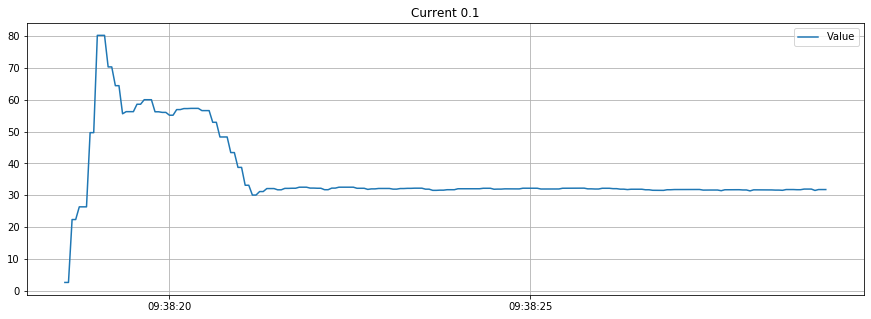

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.200000' and '2019-10-04 09:38:29.200000' ORDER BY DataSavedTime ASC


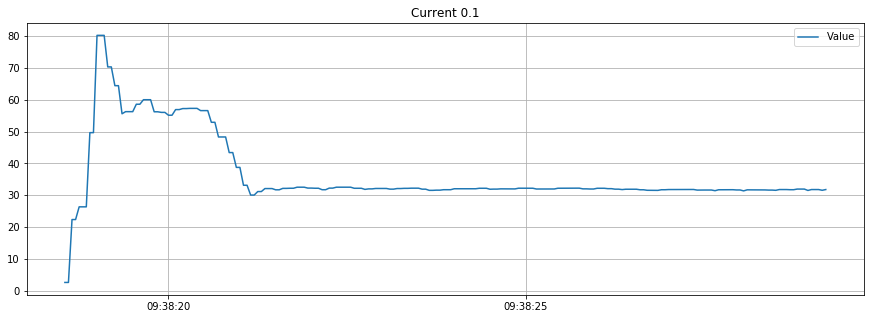

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.300000' and '2019-10-04 09:38:29.300000' ORDER BY DataSavedTime ASC


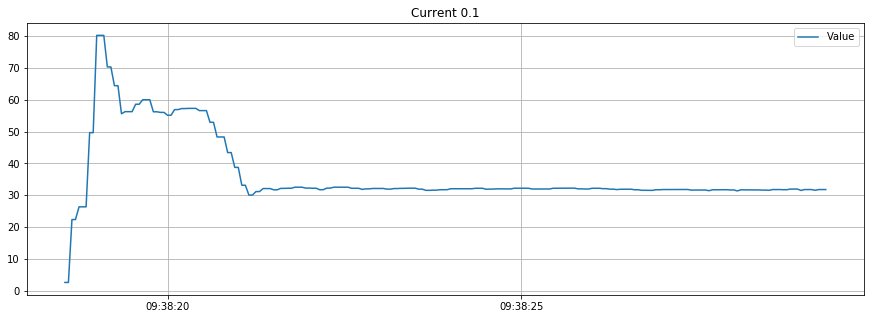

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.400000' and '2019-10-04 09:38:29.400000' ORDER BY DataSavedTime ASC


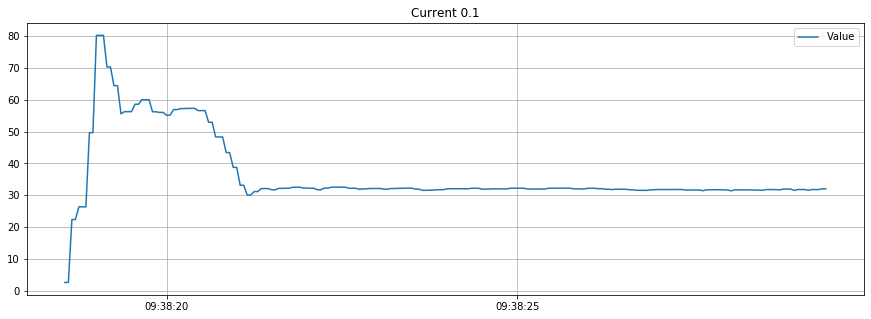

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.500000' and '2019-10-04 09:38:29.500000' ORDER BY DataSavedTime ASC


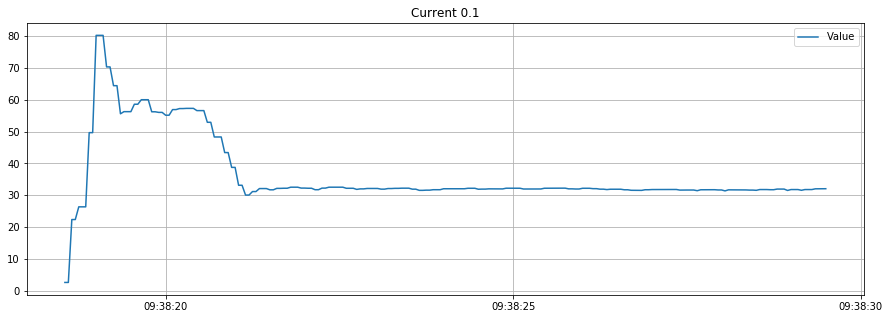

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.600000' and '2019-10-04 09:38:29.600000' ORDER BY DataSavedTime ASC


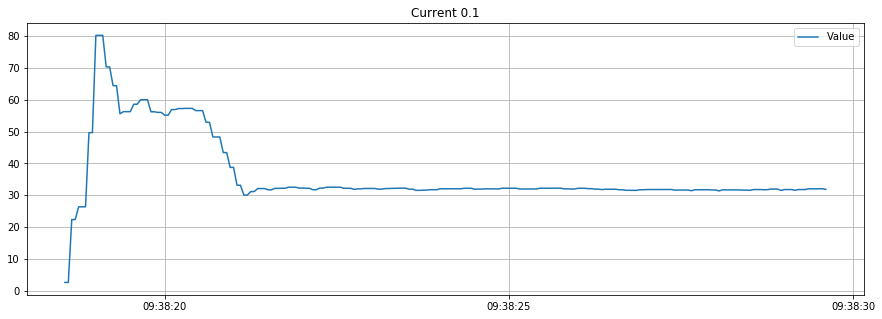

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.700000' and '2019-10-04 09:38:29.700000' ORDER BY DataSavedTime ASC


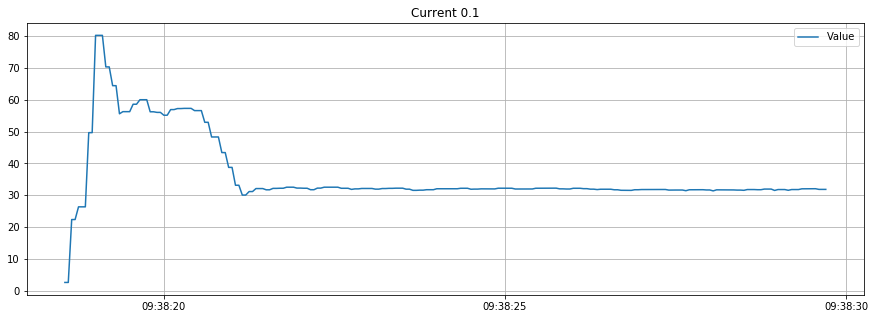

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-04 09:38:09.800000' and '2019-10-04 09:38:29.800000' ORDER BY DataSavedTime ASC


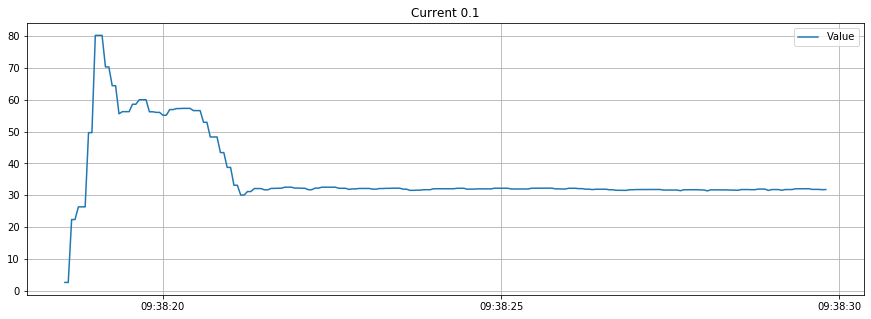

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:20.900000' and '2019-10-07 08:21:40.900000' ORDER BY DataSavedTime ASC


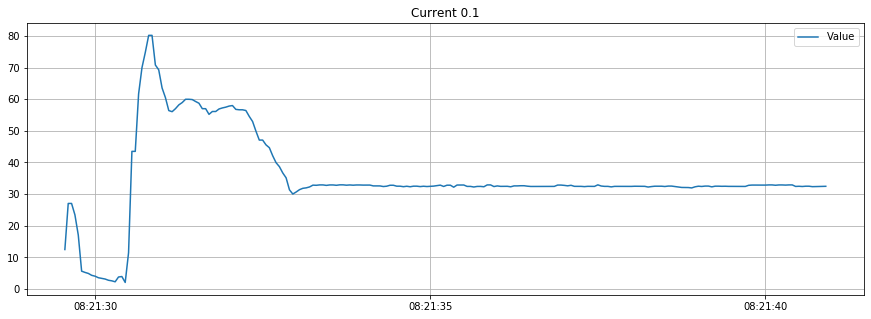

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:21' and '2019-10-07 08:21:41' ORDER BY DataSavedTime ASC


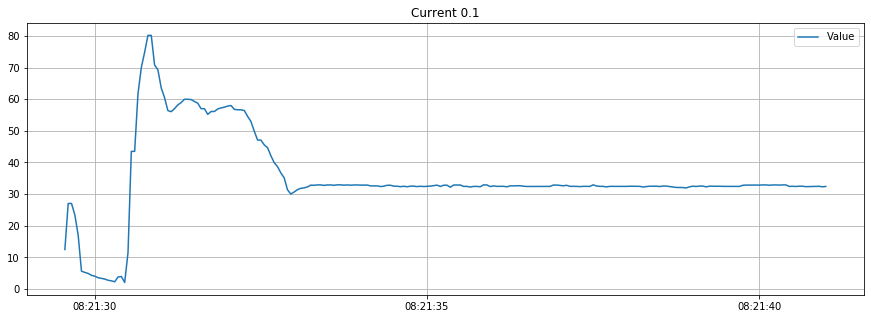

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:21.100000' and '2019-10-07 08:21:41.100000' ORDER BY DataSavedTime ASC


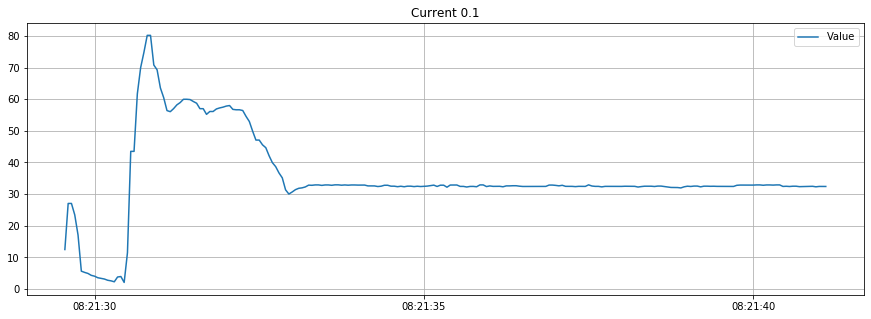

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:21.200000' and '2019-10-07 08:21:41.200000' ORDER BY DataSavedTime ASC


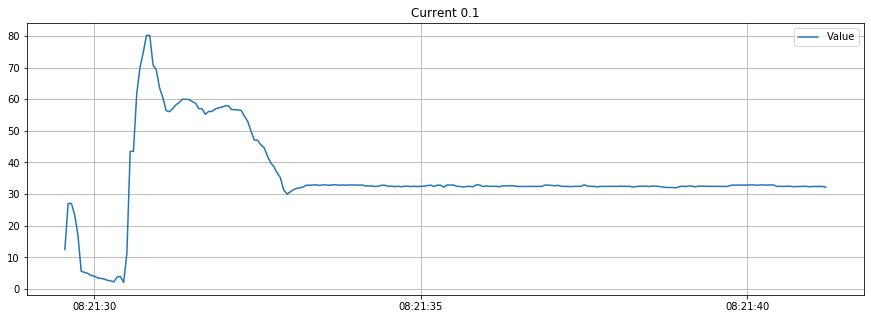

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:21.300000' and '2019-10-07 08:21:41.300000' ORDER BY DataSavedTime ASC


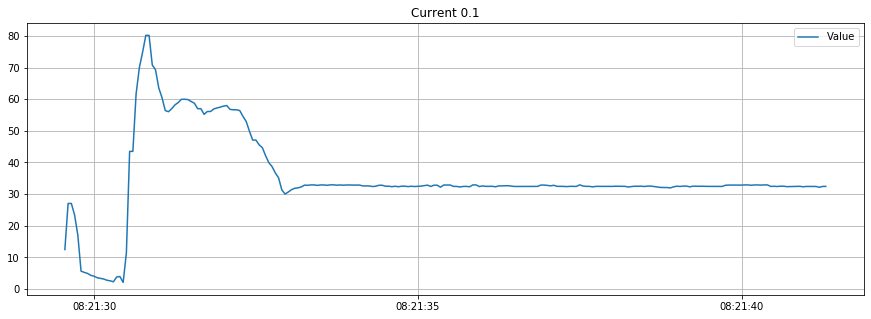

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:21.400000' and '2019-10-07 08:21:41.400000' ORDER BY DataSavedTime ASC


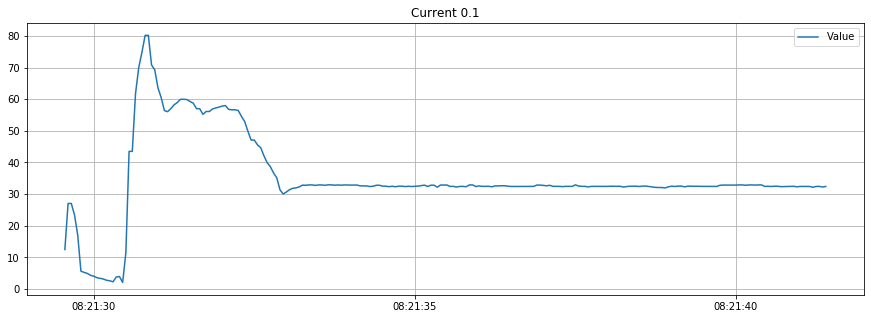

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-07 08:21:21.500000' and '2019-10-07 08:21:41.500000' ORDER BY DataSavedTime ASC


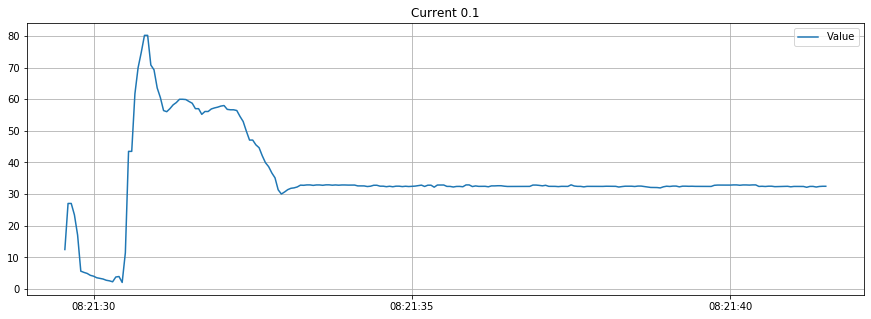

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25' and '2019-10-08 15:08:45' ORDER BY DataSavedTime ASC


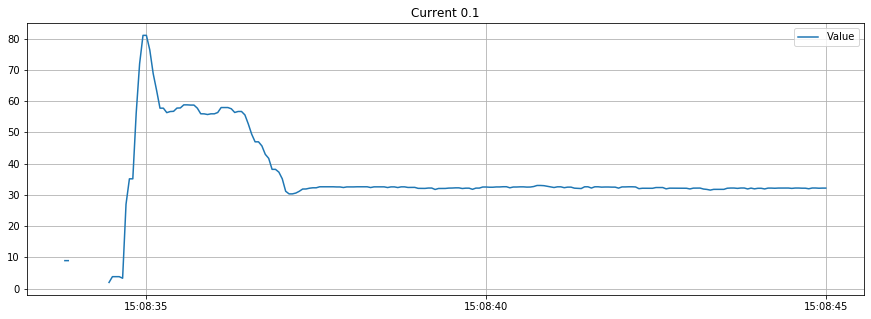

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.100000' and '2019-10-08 15:08:45.100000' ORDER BY DataSavedTime ASC


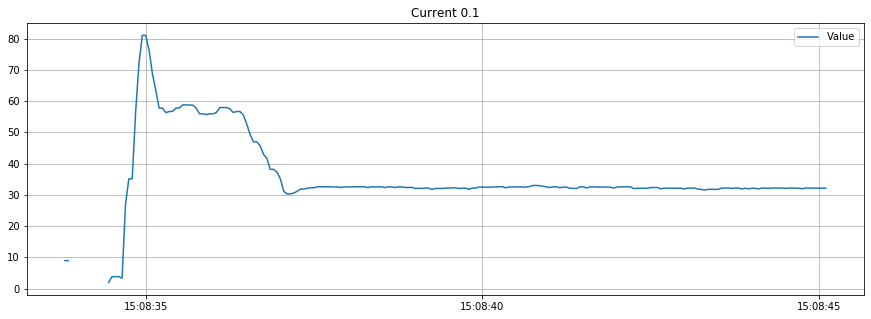

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.200000' and '2019-10-08 15:08:45.200000' ORDER BY DataSavedTime ASC


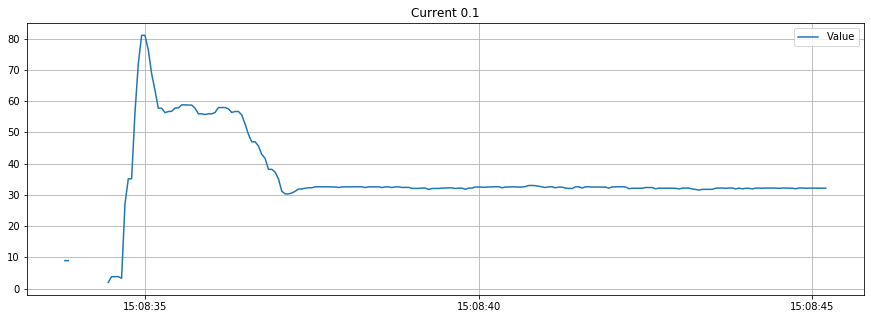

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.300000' and '2019-10-08 15:08:45.300000' ORDER BY DataSavedTime ASC


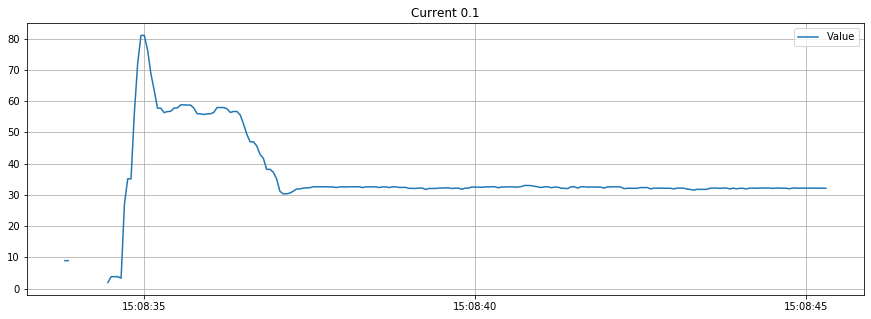

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.400000' and '2019-10-08 15:08:45.400000' ORDER BY DataSavedTime ASC


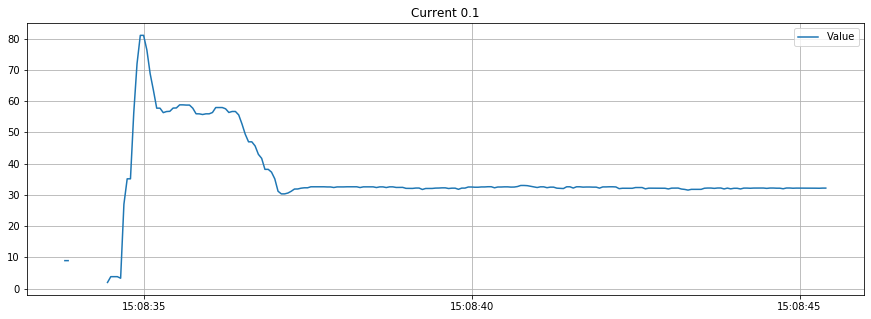

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.500000' and '2019-10-08 15:08:45.500000' ORDER BY DataSavedTime ASC


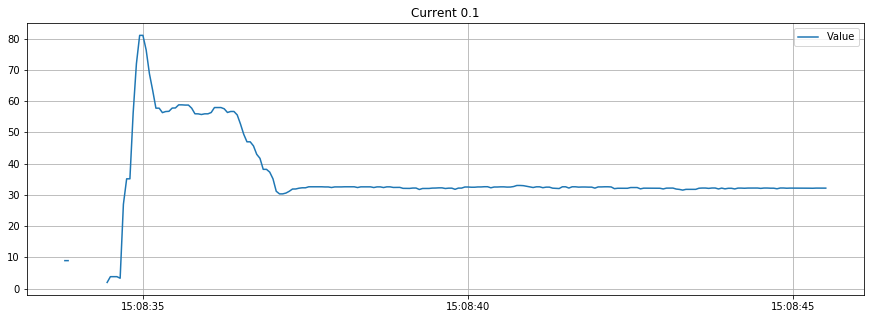

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.600000' and '2019-10-08 15:08:45.600000' ORDER BY DataSavedTime ASC


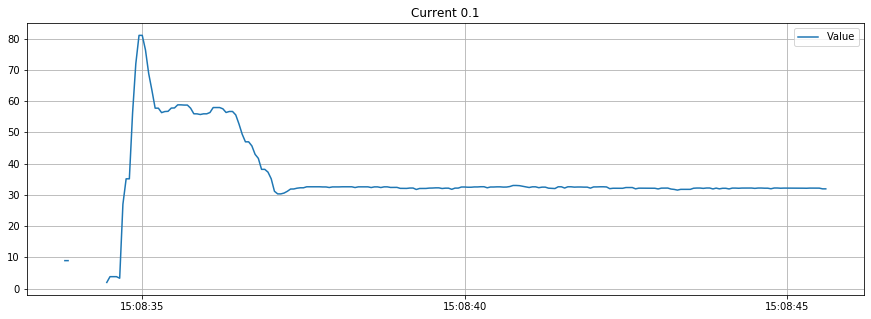

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.700000' and '2019-10-08 15:08:45.700000' ORDER BY DataSavedTime ASC


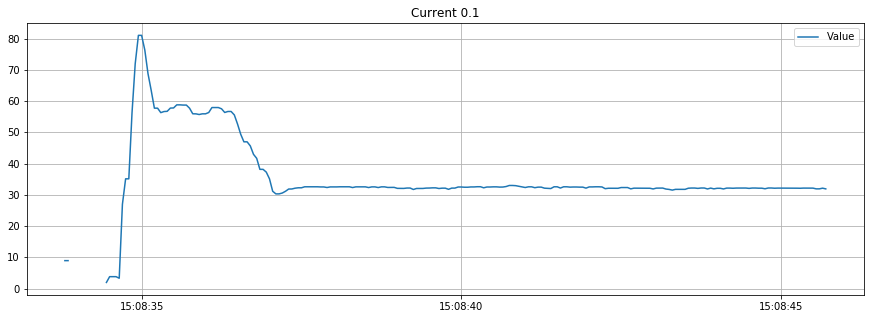

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-08 15:08:25.800000' and '2019-10-08 15:08:45.800000' ORDER BY DataSavedTime ASC


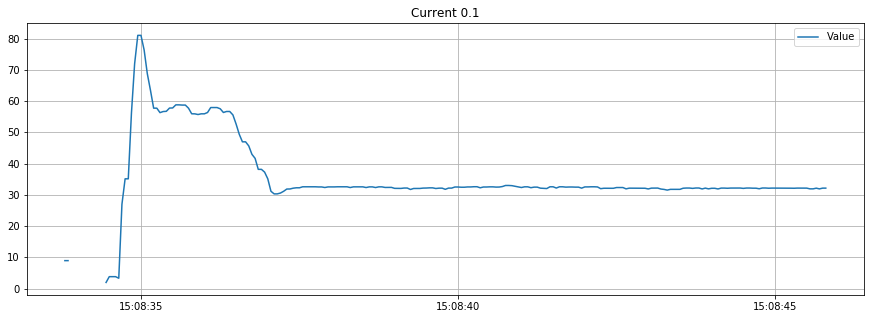

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.300000' and '2019-10-10 08:58:06.300000' ORDER BY DataSavedTime ASC


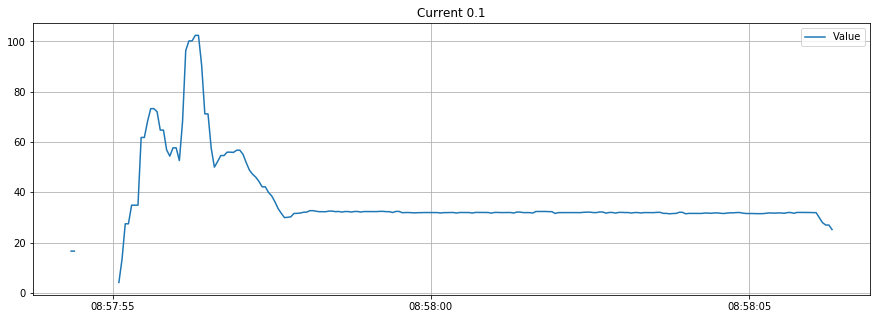

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.400000' and '2019-10-10 08:58:06.400000' ORDER BY DataSavedTime ASC


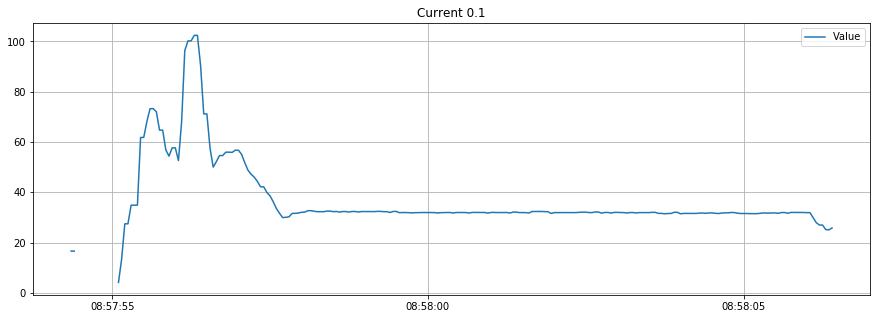

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.500000' and '2019-10-10 08:58:06.500000' ORDER BY DataSavedTime ASC


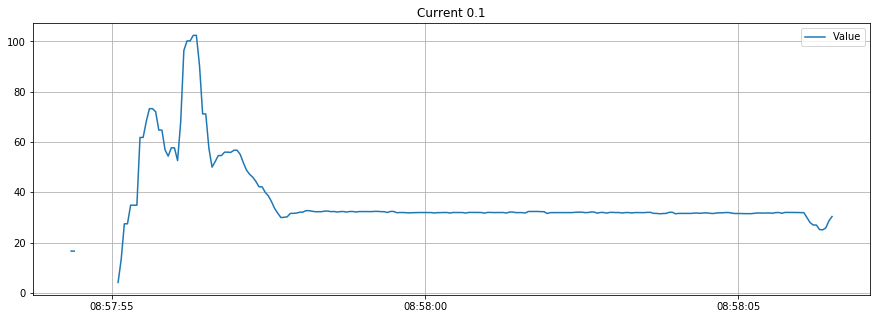

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.600000' and '2019-10-10 08:58:06.600000' ORDER BY DataSavedTime ASC


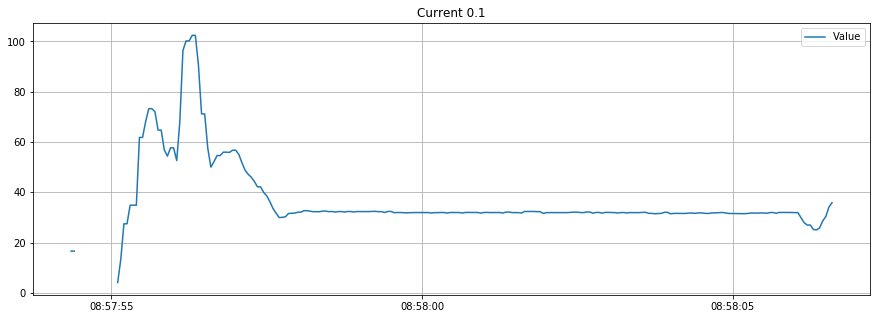

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.700000' and '2019-10-10 08:58:06.700000' ORDER BY DataSavedTime ASC


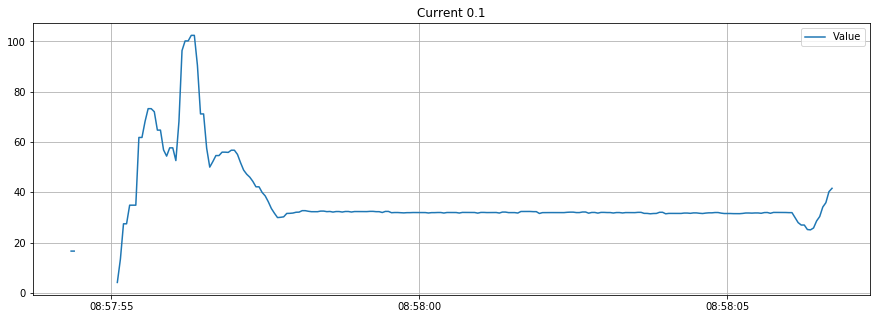

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.800000' and '2019-10-10 08:58:06.800000' ORDER BY DataSavedTime ASC


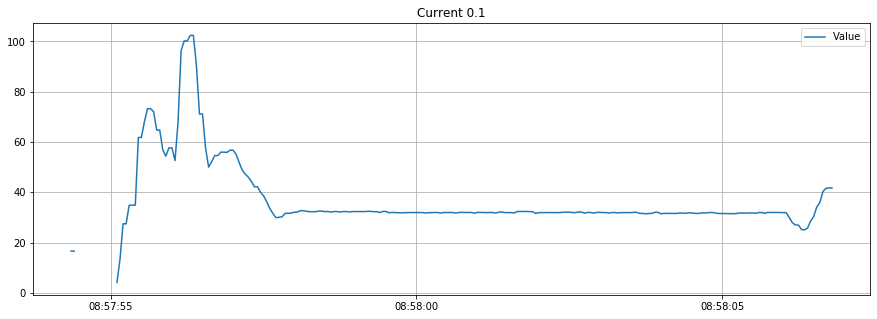

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:46.900000' and '2019-10-10 08:58:06.900000' ORDER BY DataSavedTime ASC


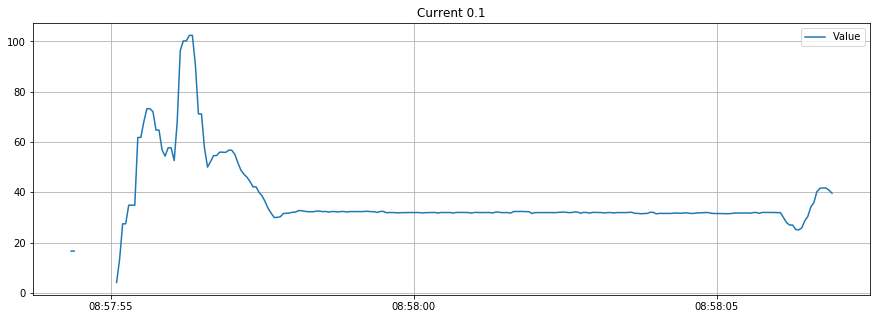

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:47' and '2019-10-10 08:58:07' ORDER BY DataSavedTime ASC


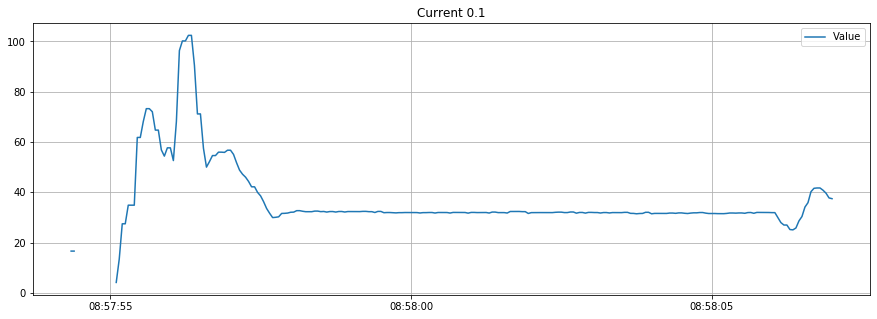

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 08:57:47.100000' and '2019-10-10 08:58:07.100000' ORDER BY DataSavedTime ASC


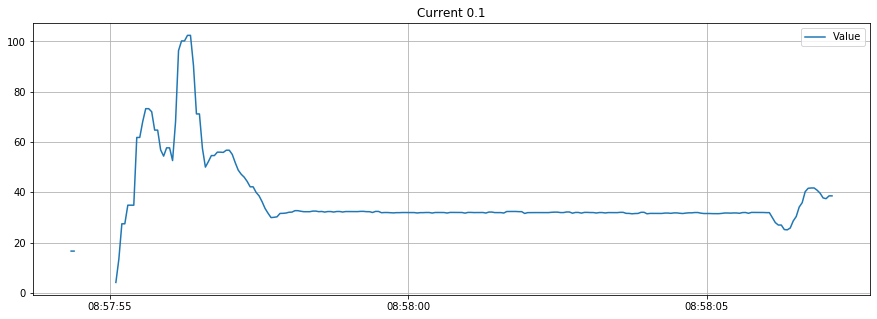

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.200000' and '2019-10-10 09:39:19.200000' ORDER BY DataSavedTime ASC


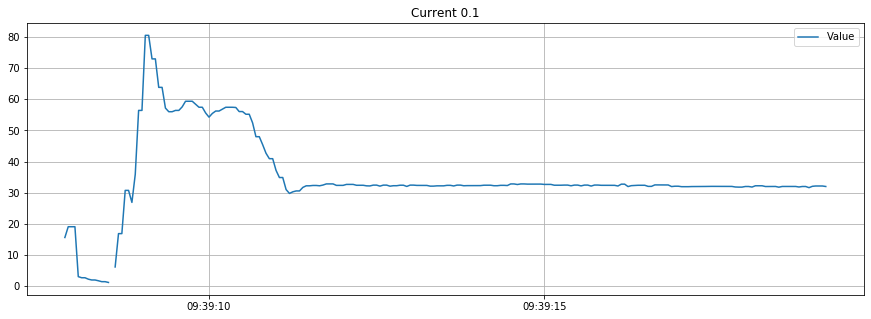

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.300000' and '2019-10-10 09:39:19.300000' ORDER BY DataSavedTime ASC


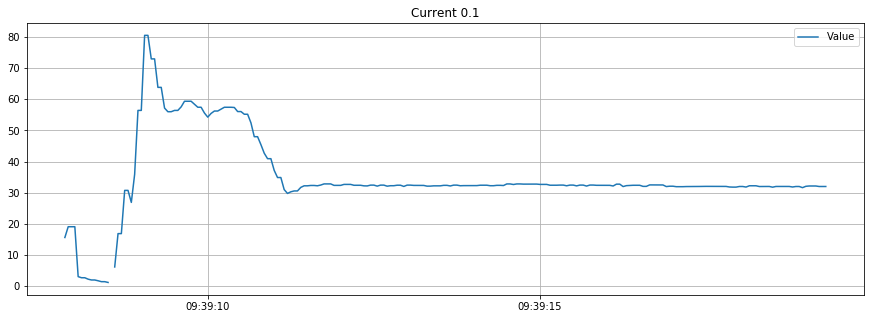

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.400000' and '2019-10-10 09:39:19.400000' ORDER BY DataSavedTime ASC


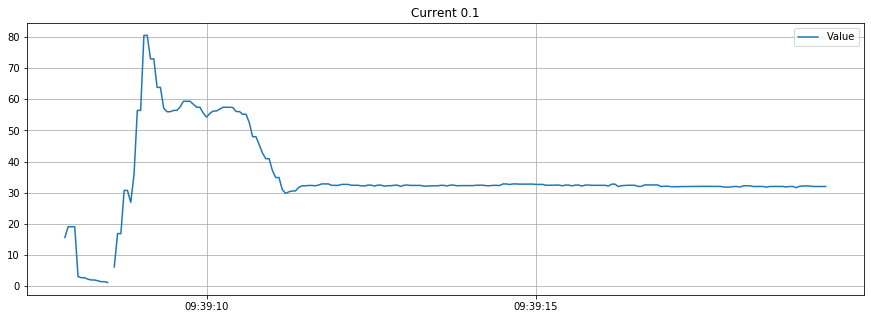

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.500000' and '2019-10-10 09:39:19.500000' ORDER BY DataSavedTime ASC


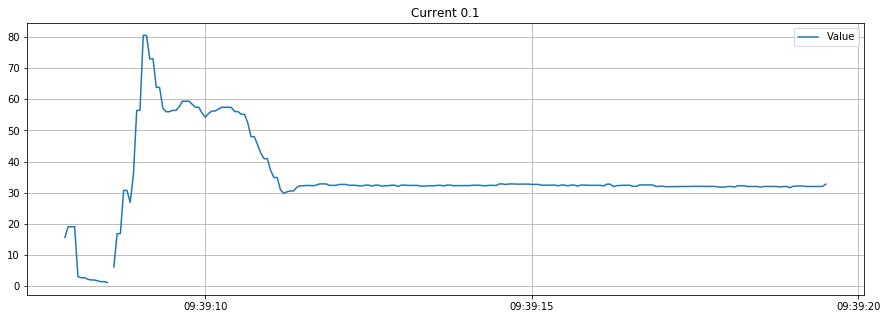

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.600000' and '2019-10-10 09:39:19.600000' ORDER BY DataSavedTime ASC


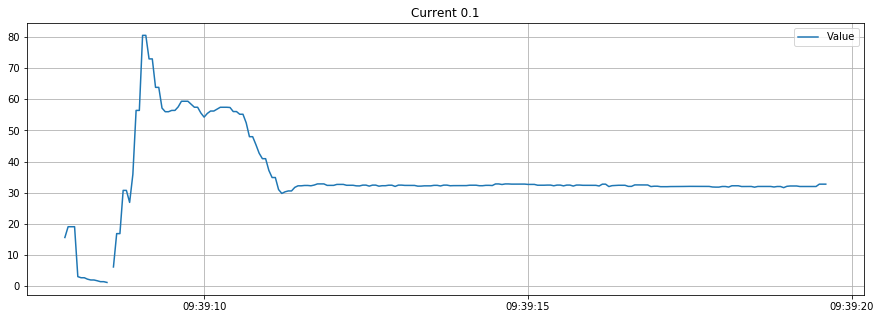

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.700000' and '2019-10-10 09:39:19.700000' ORDER BY DataSavedTime ASC


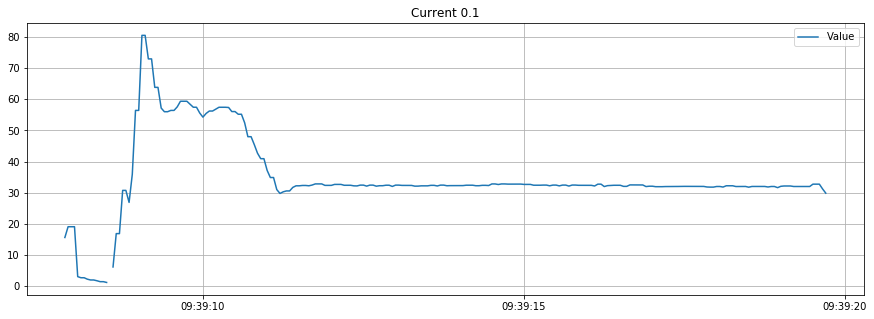

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.800000' and '2019-10-10 09:39:19.800000' ORDER BY DataSavedTime ASC


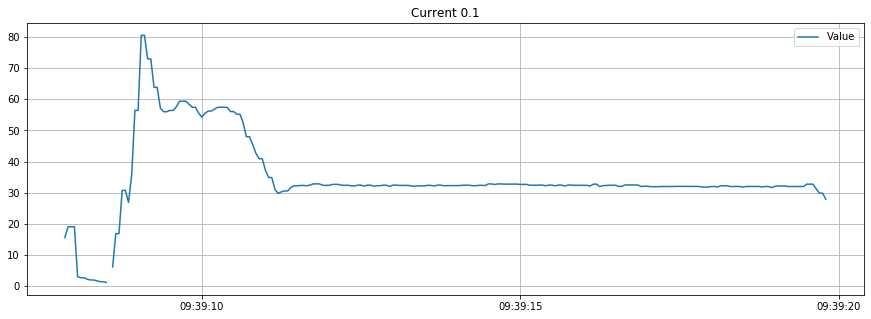

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:38:59.900000' and '2019-10-10 09:39:19.900000' ORDER BY DataSavedTime ASC


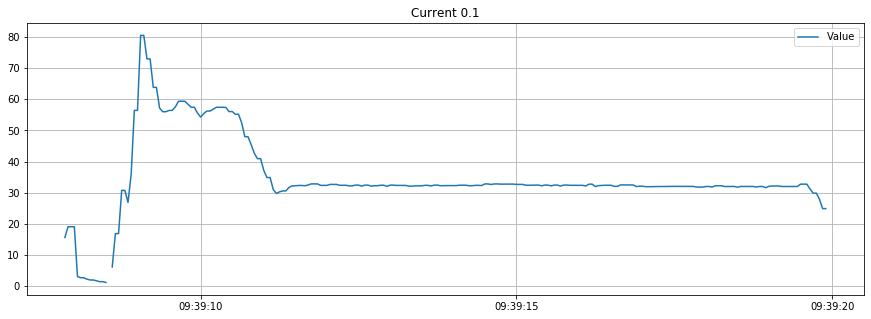

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 09:39:00' and '2019-10-10 09:39:20' ORDER BY DataSavedTime ASC


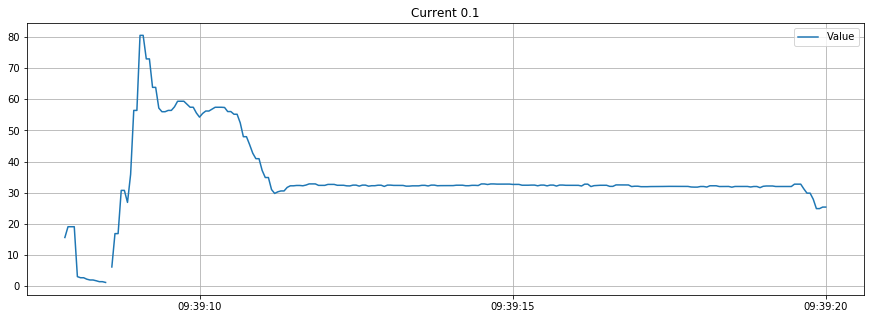

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:50.500000' and '2019-10-10 10:31:10.500000' ORDER BY DataSavedTime ASC


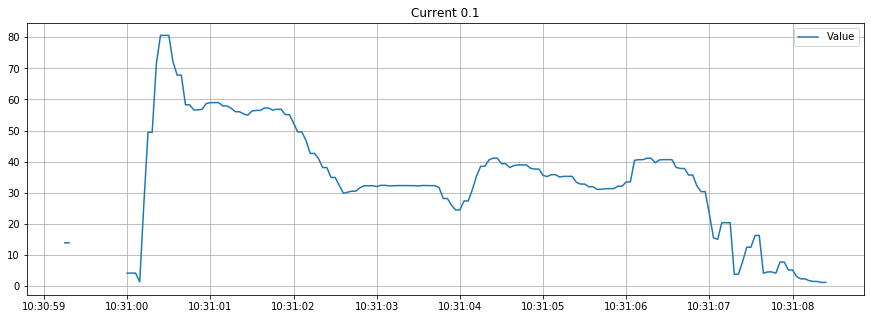

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:50.600000' and '2019-10-10 10:31:10.600000' ORDER BY DataSavedTime ASC


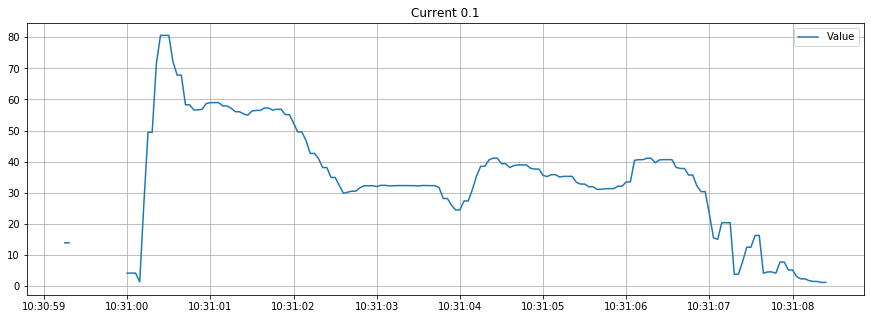

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:50.700000' and '2019-10-10 10:31:10.700000' ORDER BY DataSavedTime ASC


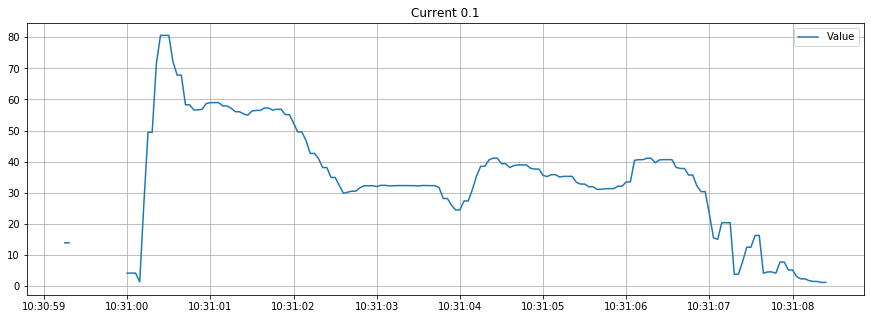

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:50.800000' and '2019-10-10 10:31:10.800000' ORDER BY DataSavedTime ASC


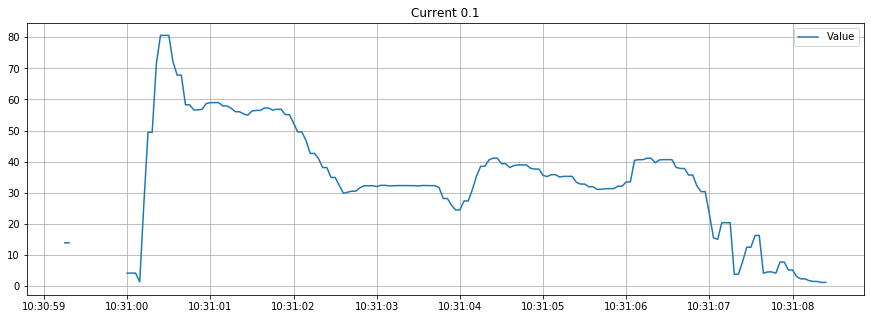

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:50.900000' and '2019-10-10 10:31:10.900000' ORDER BY DataSavedTime ASC


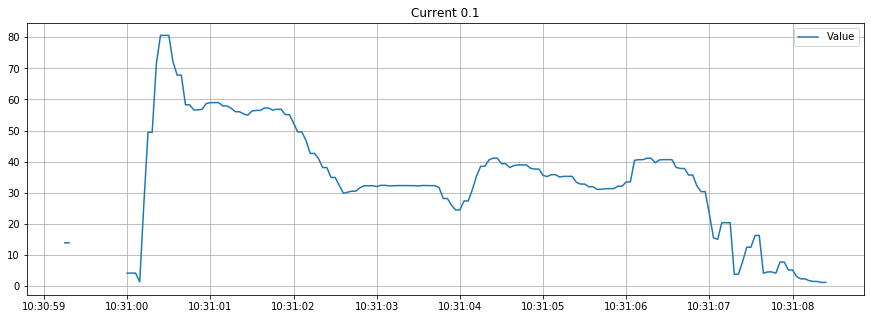

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:51' and '2019-10-10 10:31:11' ORDER BY DataSavedTime ASC


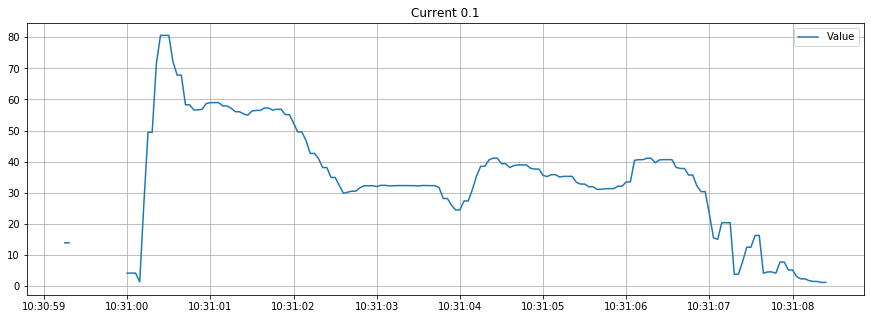

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:51.100000' and '2019-10-10 10:31:11.100000' ORDER BY DataSavedTime ASC


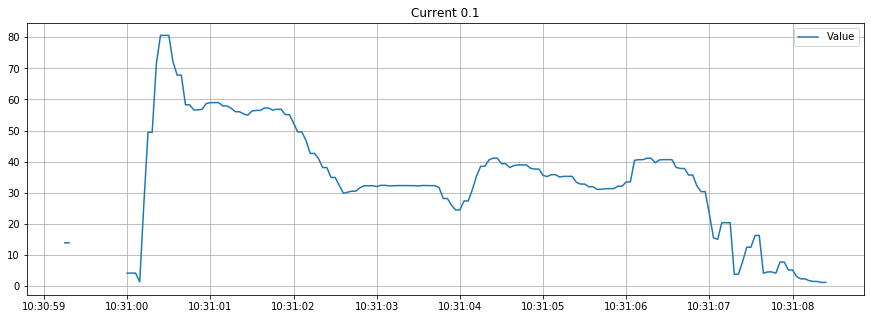

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:51.200000' and '2019-10-10 10:31:11.200000' ORDER BY DataSavedTime ASC


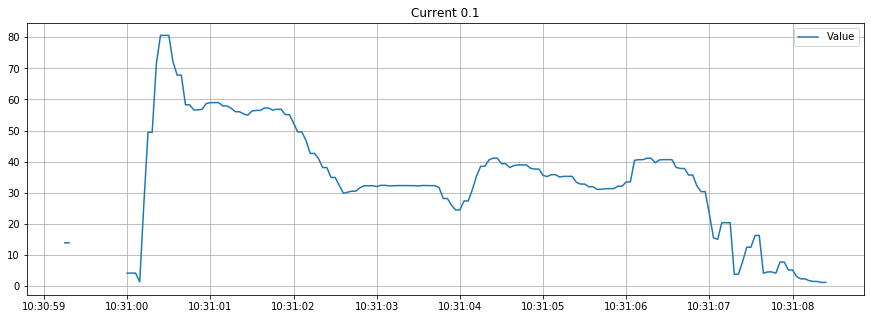

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-10 10:30:51.300000' and '2019-10-10 10:31:11.300000' ORDER BY DataSavedTime ASC


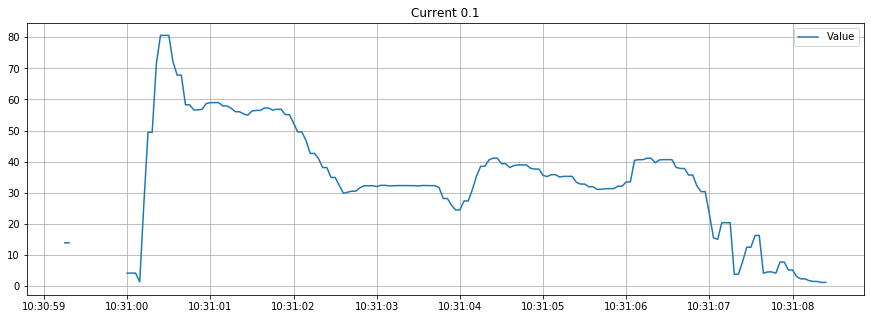

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:21:59.700000' and '2019-10-12 08:22:19.700000' ORDER BY DataSavedTime ASC


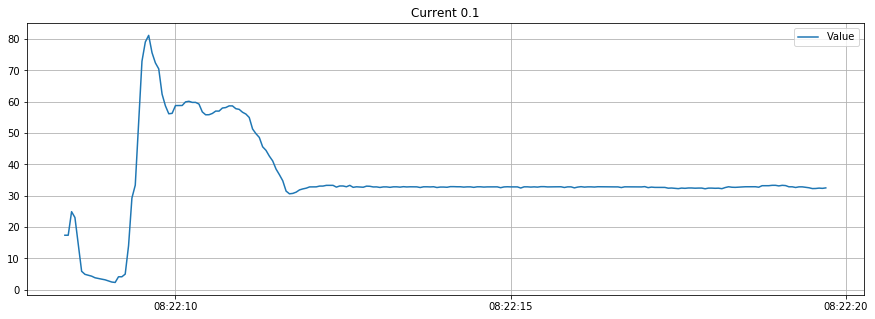

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:21:59.800000' and '2019-10-12 08:22:19.800000' ORDER BY DataSavedTime ASC


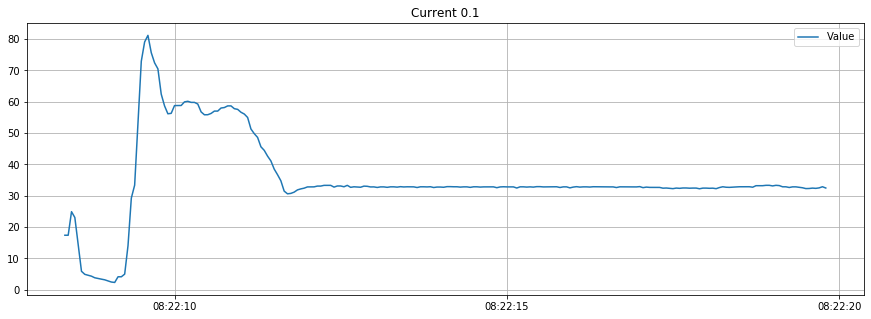

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:21:59.900000' and '2019-10-12 08:22:19.900000' ORDER BY DataSavedTime ASC


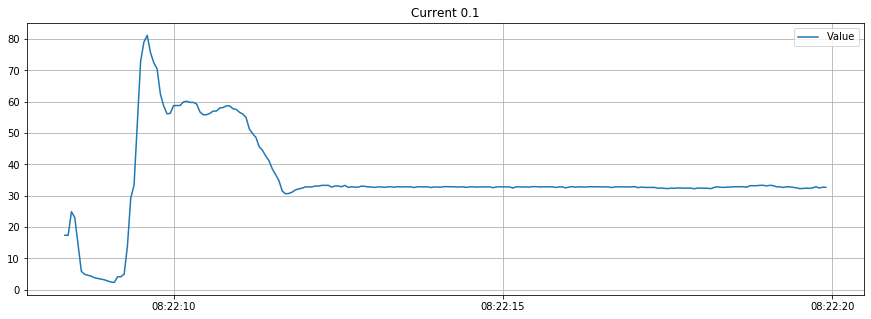

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:22:00' and '2019-10-12 08:22:20' ORDER BY DataSavedTime ASC


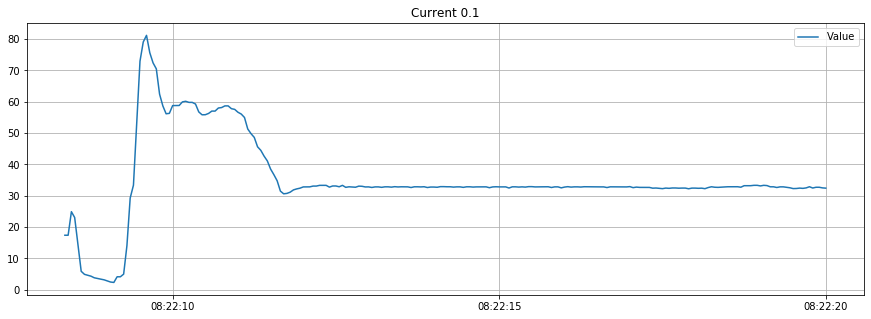

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:22:00.100000' and '2019-10-12 08:22:20.100000' ORDER BY DataSavedTime ASC


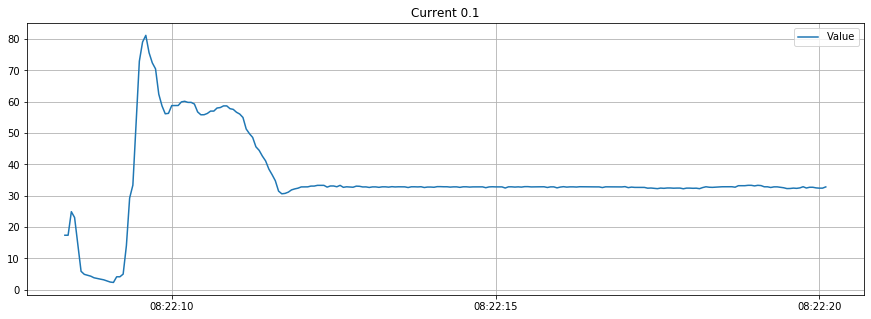

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:22:00.200000' and '2019-10-12 08:22:20.200000' ORDER BY DataSavedTime ASC


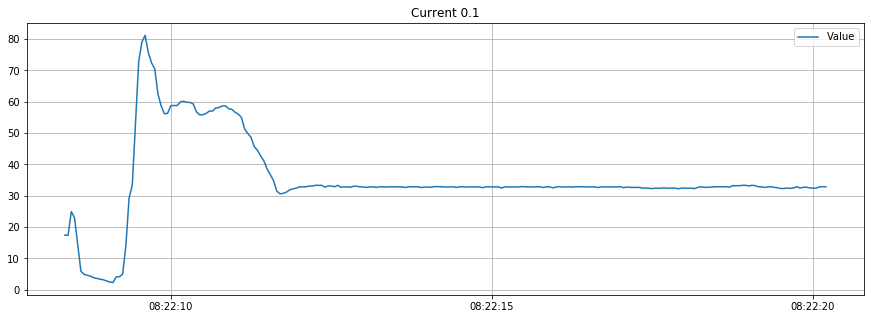

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:22:00.300000' and '2019-10-12 08:22:20.300000' ORDER BY DataSavedTime ASC


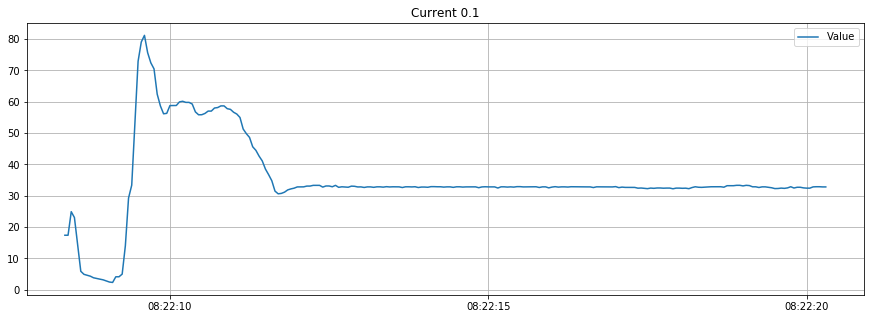

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 08:22:00.400000' and '2019-10-12 08:22:20.400000' ORDER BY DataSavedTime ASC


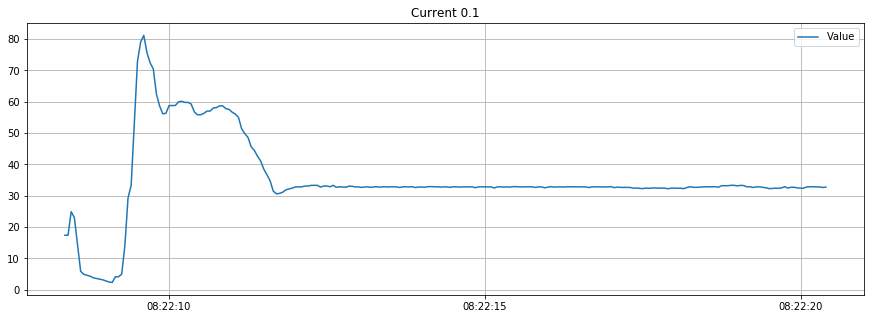

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 10:37:20.800000' and '2019-10-12 10:37:40.800000' ORDER BY DataSavedTime ASC


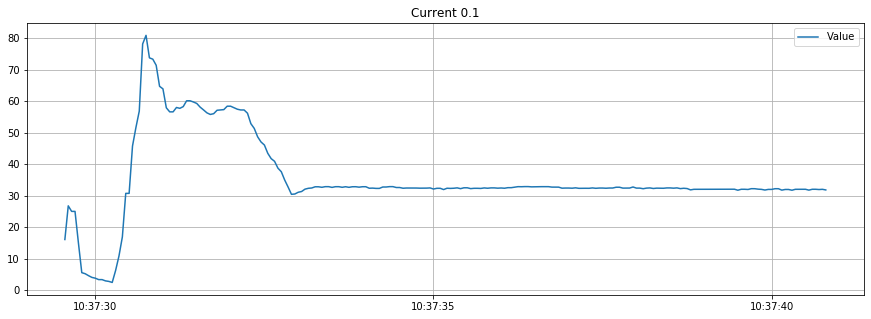

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 10:50:07.200000' and '2019-10-12 10:50:27.200000' ORDER BY DataSavedTime ASC


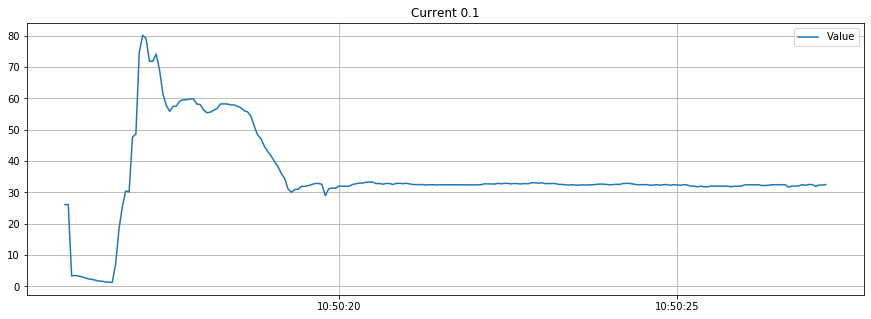

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 11:09:25.500000' and '2019-10-12 11:09:45.500000' ORDER BY DataSavedTime ASC


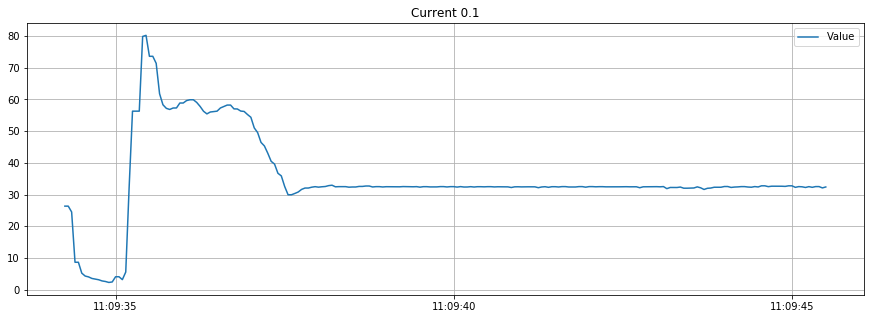

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 11:51:58.500000' and '2019-10-12 11:52:18.500000' ORDER BY DataSavedTime ASC


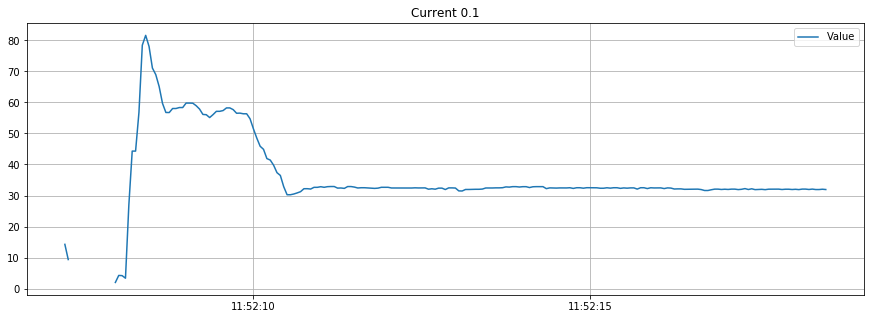

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 12:58:34' and '2019-10-12 12:58:54' ORDER BY DataSavedTime ASC


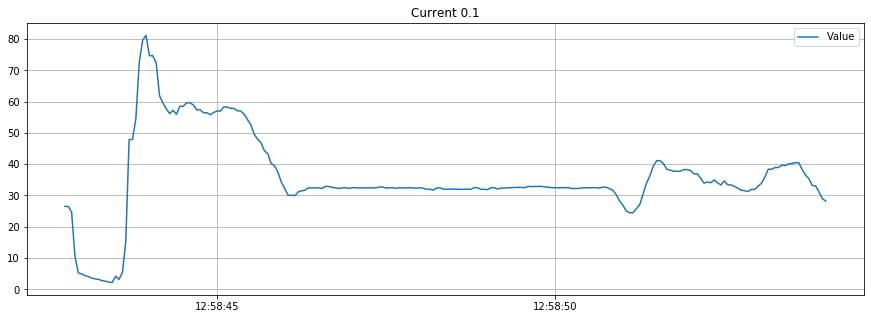

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 21:27:58.300000' and '2019-10-12 21:28:18.300000' ORDER BY DataSavedTime ASC


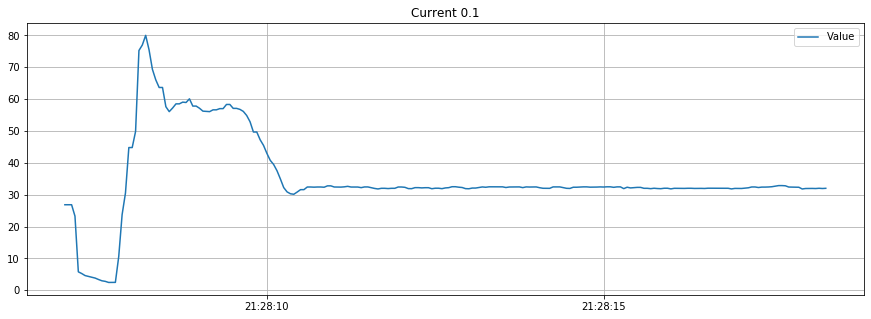

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 23:18:21.400000' and '2019-10-12 23:18:41.400000' ORDER BY DataSavedTime ASC


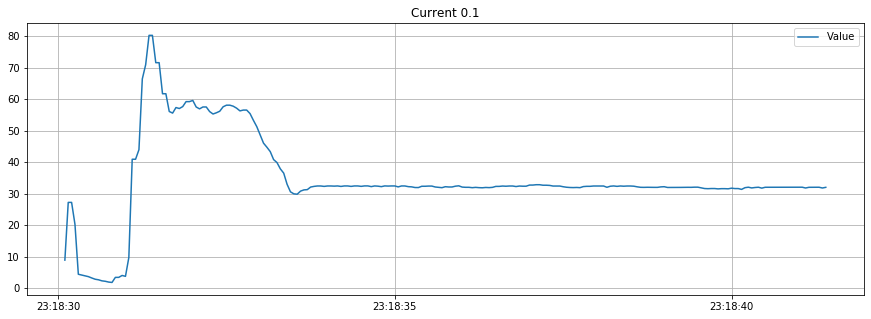

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-12 23:18:21.500000' and '2019-10-12 23:18:41.500000' ORDER BY DataSavedTime ASC


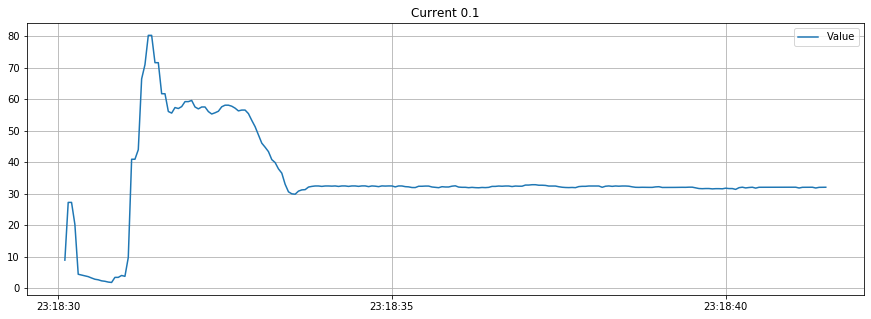

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 07:34:18.600000' and '2019-10-13 07:34:38.600000' ORDER BY DataSavedTime ASC


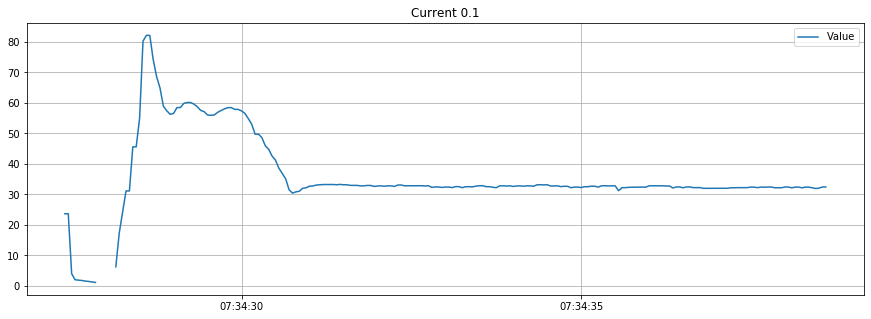

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 07:34:18.700000' and '2019-10-13 07:34:38.700000' ORDER BY DataSavedTime ASC


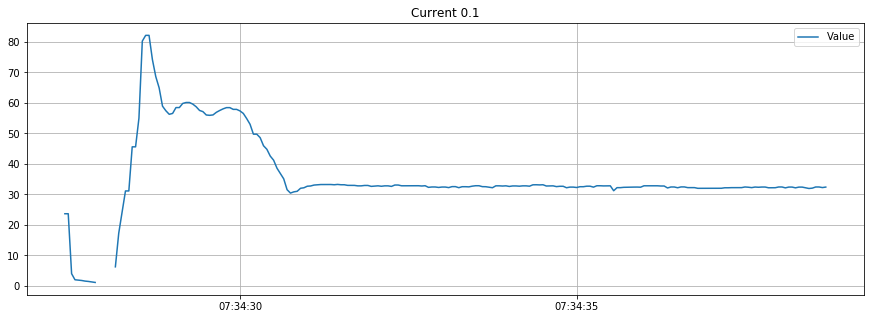

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 09:03:29.200000' and '2019-10-13 09:03:49.200000' ORDER BY DataSavedTime ASC


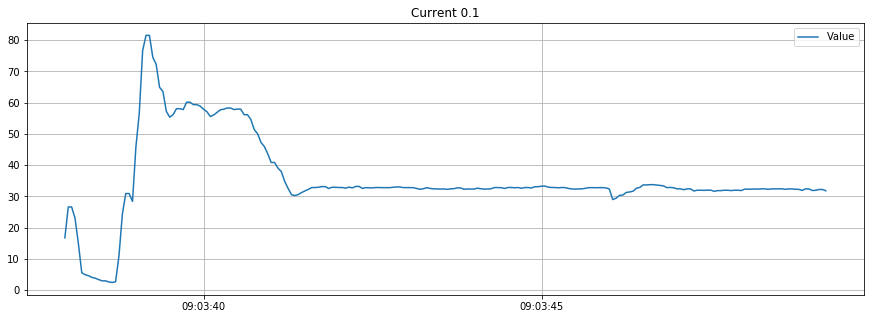

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 09:03:29.300000' and '2019-10-13 09:03:49.300000' ORDER BY DataSavedTime ASC


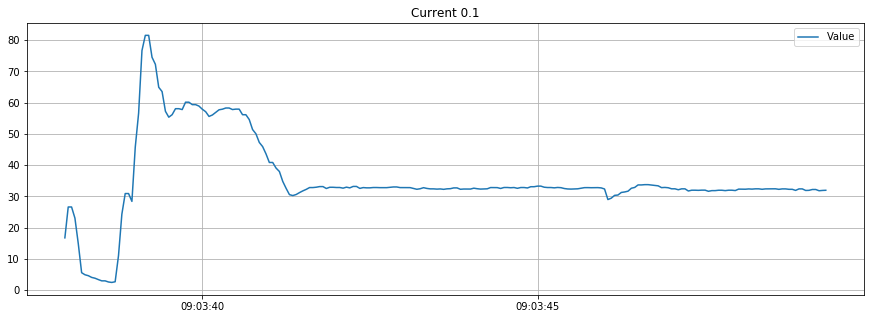

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 10:14:12.200000' and '2019-10-13 10:14:32.200000' ORDER BY DataSavedTime ASC


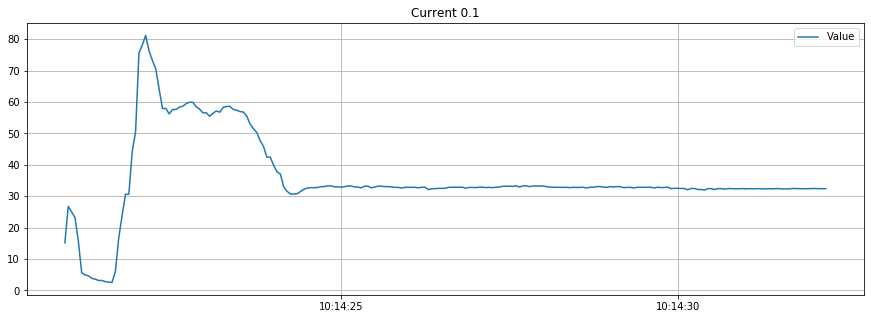

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 10:22:53.900000' and '2019-10-13 10:23:13.900000' ORDER BY DataSavedTime ASC


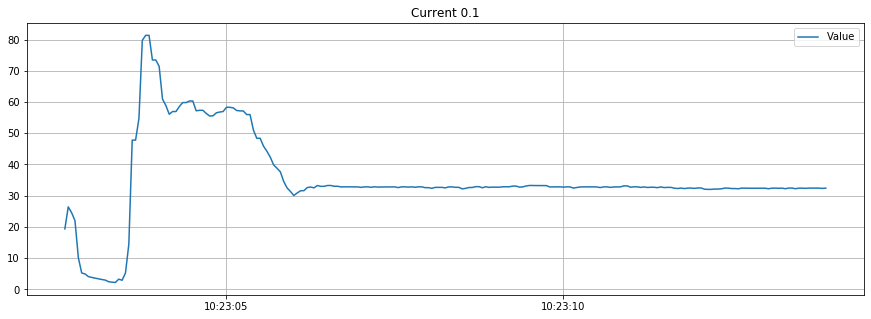

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 10:30:21.900000' and '2019-10-13 10:30:41.900000' ORDER BY DataSavedTime ASC


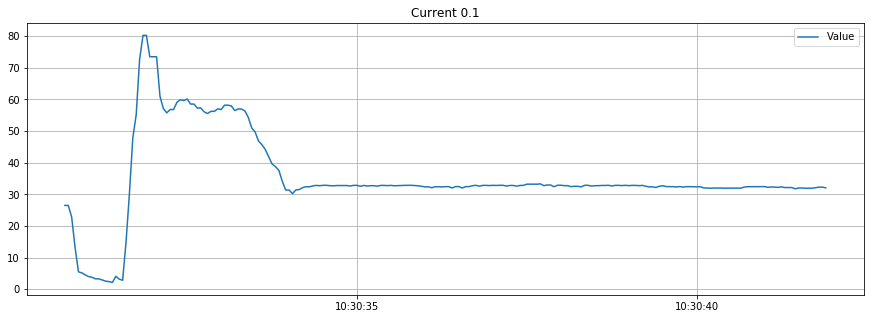

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 10:30:22' and '2019-10-13 10:30:42' ORDER BY DataSavedTime ASC


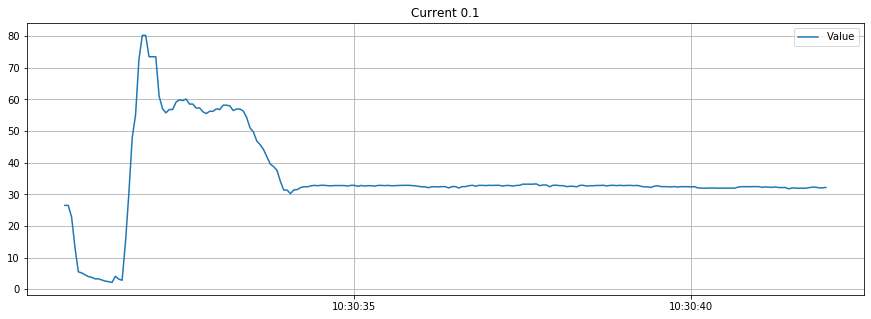

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 12:44:28.400000' and '2019-10-13 12:44:48.400000' ORDER BY DataSavedTime ASC


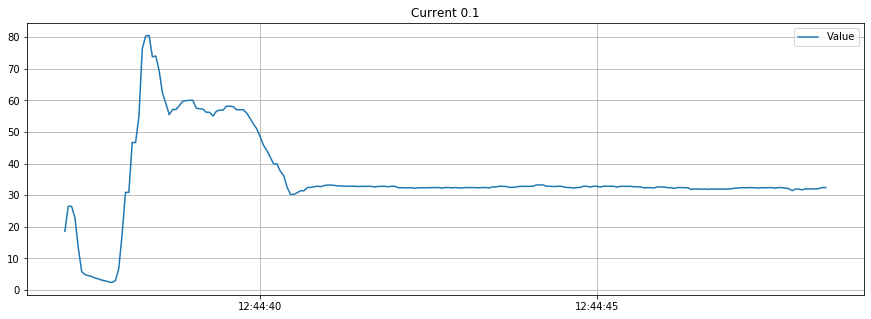

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 13:41:22.200000' and '2019-10-13 13:41:42.200000' ORDER BY DataSavedTime ASC


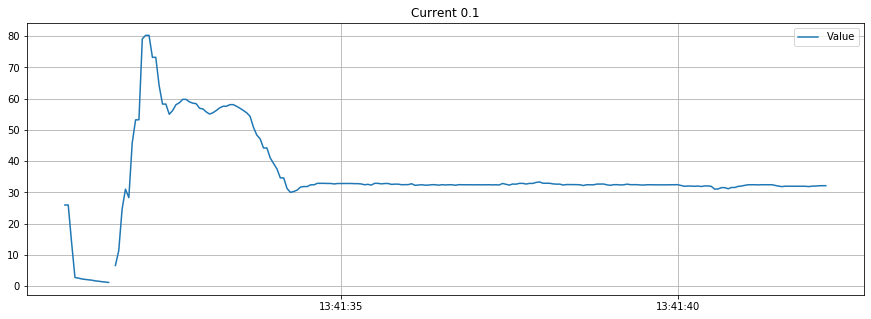

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 13:45:36.200000' and '2019-10-13 13:45:56.200000' ORDER BY DataSavedTime ASC


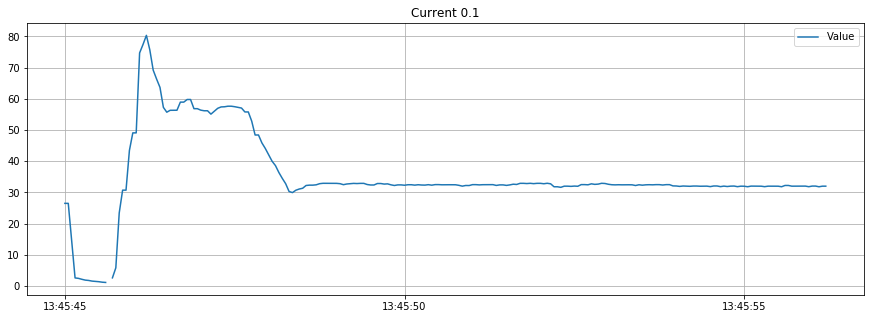

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-13 13:45:36.300000' and '2019-10-13 13:45:56.300000' ORDER BY DataSavedTime ASC


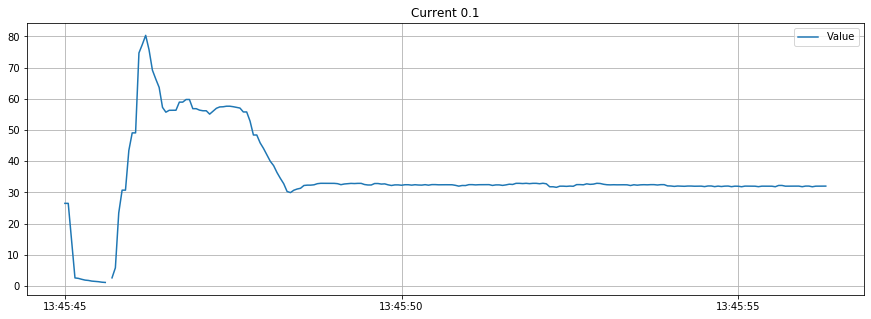

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 07:31:42.700000' and '2019-10-14 07:32:02.700000' ORDER BY DataSavedTime ASC


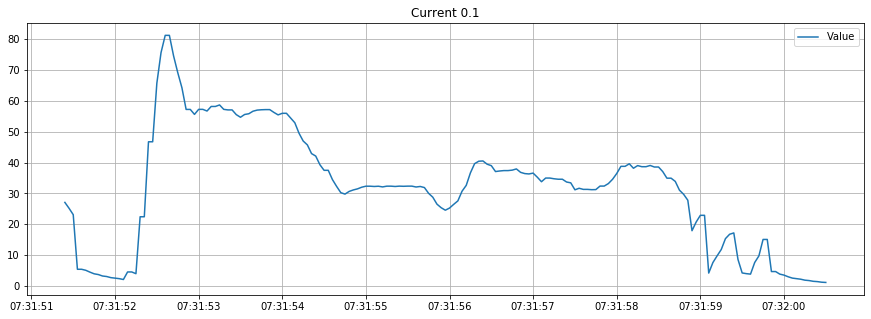

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 08:14:16.800000' and '2019-10-14 08:14:36.800000' ORDER BY DataSavedTime ASC


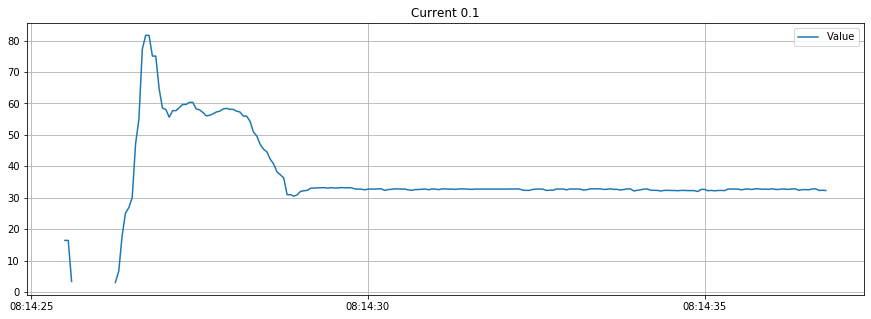

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 08:25:26' and '2019-10-14 08:25:46' ORDER BY DataSavedTime ASC


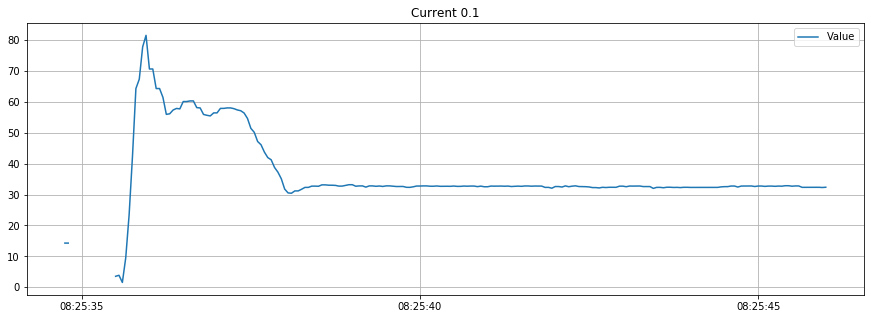

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 08:26:51' and '2019-10-14 08:27:11' ORDER BY DataSavedTime ASC


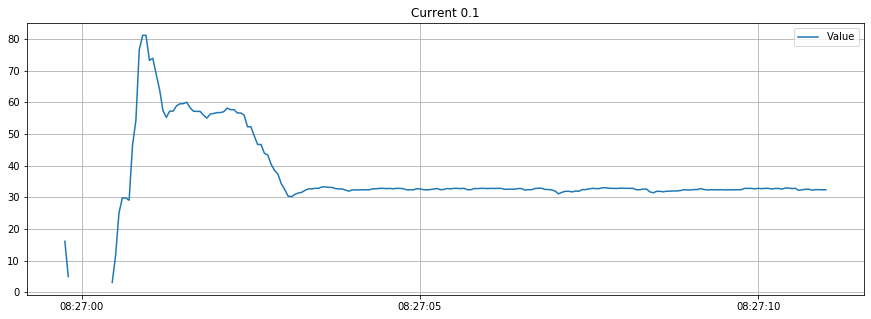

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 08:28:03.400000' and '2019-10-14 08:28:23.400000' ORDER BY DataSavedTime ASC


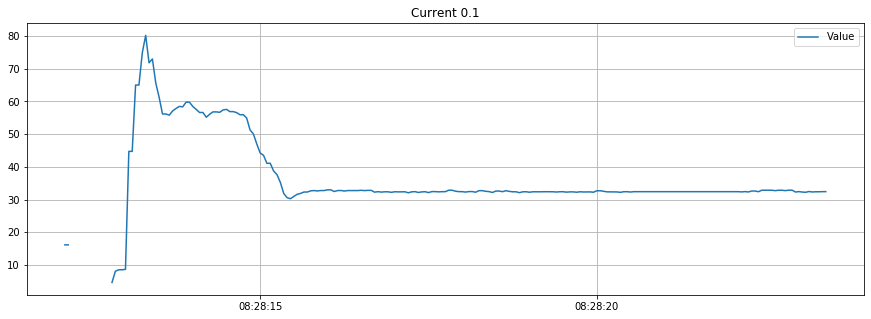

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 08:50:36.800000' and '2019-10-14 08:50:56.800000' ORDER BY DataSavedTime ASC


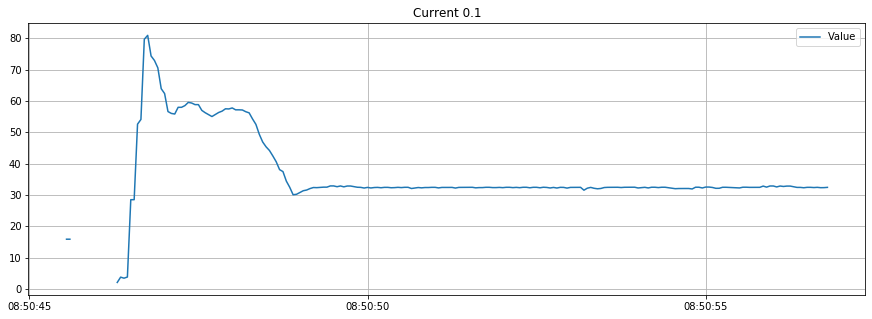

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 09:02:05.900000' and '2019-10-14 09:02:25.900000' ORDER BY DataSavedTime ASC


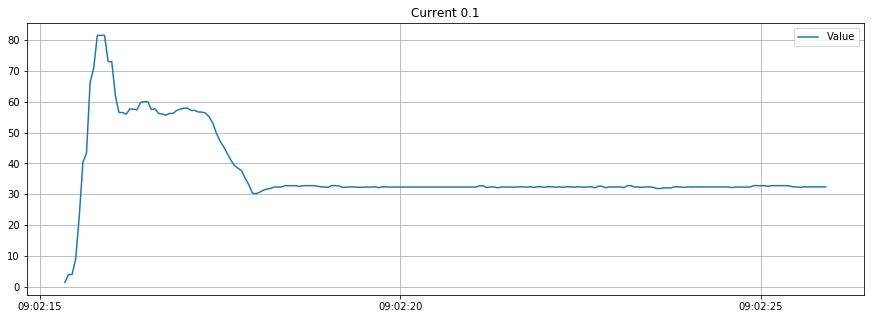

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 09:02:06' and '2019-10-14 09:02:26' ORDER BY DataSavedTime ASC


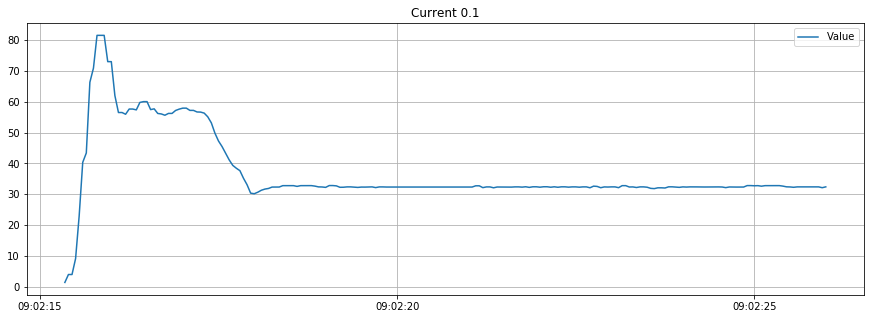

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 09:22:18.100000' and '2019-10-14 09:22:38.100000' ORDER BY DataSavedTime ASC


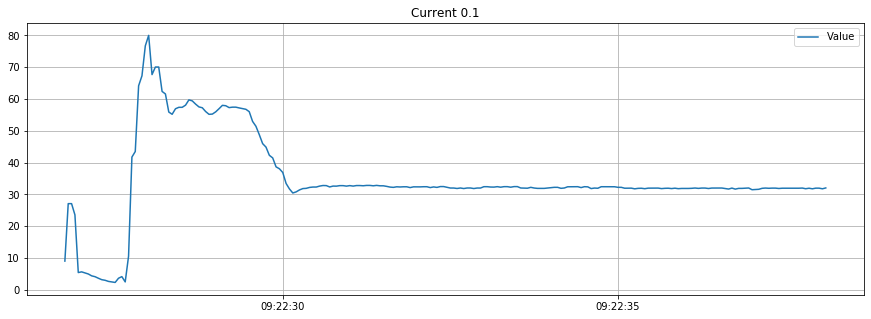

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 09:48:39' and '2019-10-14 09:48:59' ORDER BY DataSavedTime ASC


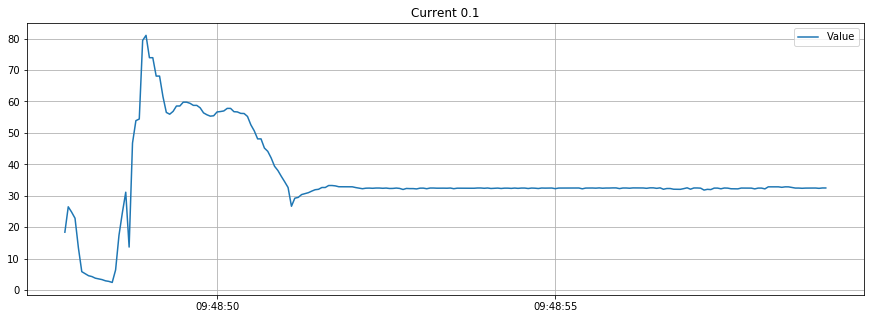

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 09:54:16.400000' and '2019-10-14 09:54:36.400000' ORDER BY DataSavedTime ASC


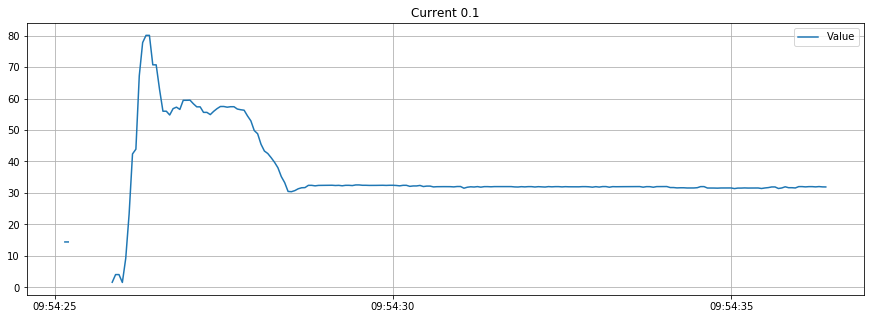

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 09:54:16.500000' and '2019-10-14 09:54:36.500000' ORDER BY DataSavedTime ASC


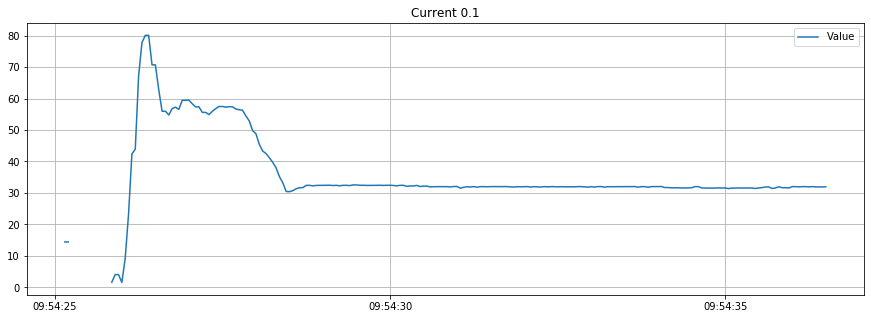

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 10:01:35.600000' and '2019-10-14 10:01:55.600000' ORDER BY DataSavedTime ASC


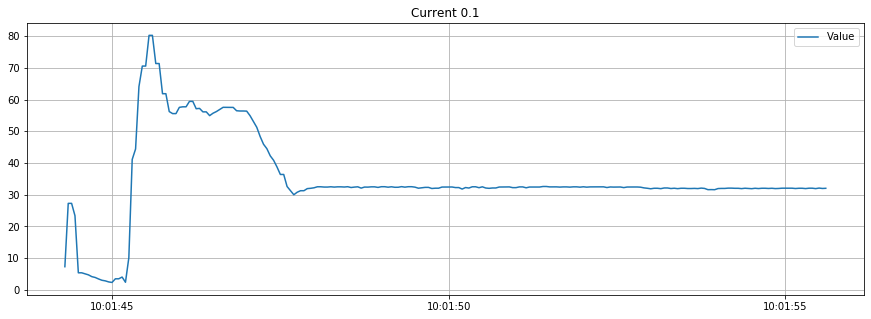

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 10:01:35.700000' and '2019-10-14 10:01:55.700000' ORDER BY DataSavedTime ASC


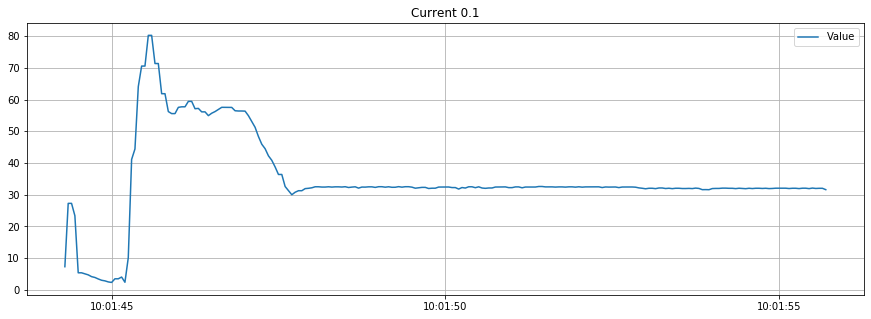

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 10:34:26.900000' and '2019-10-14 10:34:46.900000' ORDER BY DataSavedTime ASC


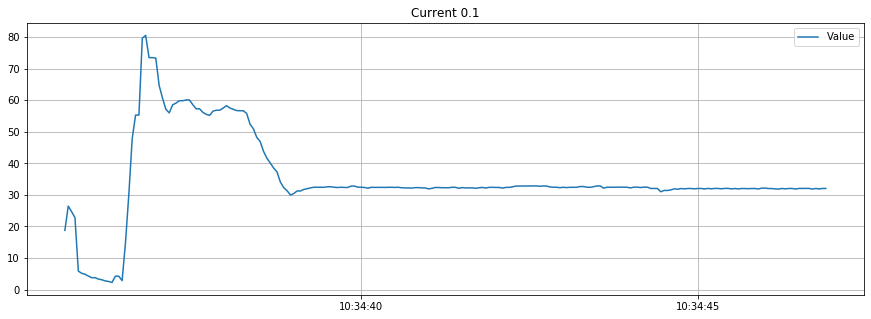

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 11:34:48.100000' and '2019-10-14 11:35:08.100000' ORDER BY DataSavedTime ASC


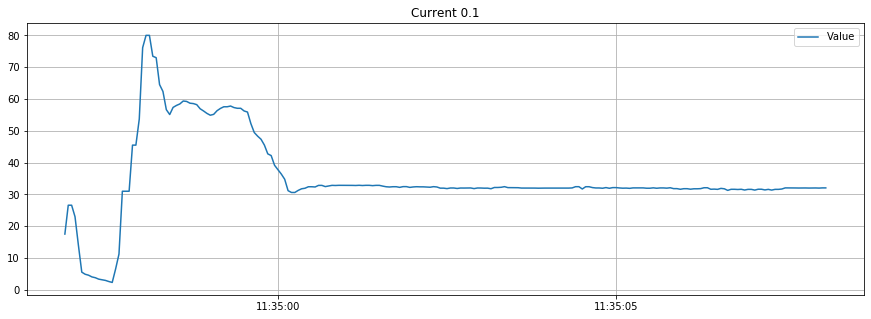

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 11:34:48.200000' and '2019-10-14 11:35:08.200000' ORDER BY DataSavedTime ASC


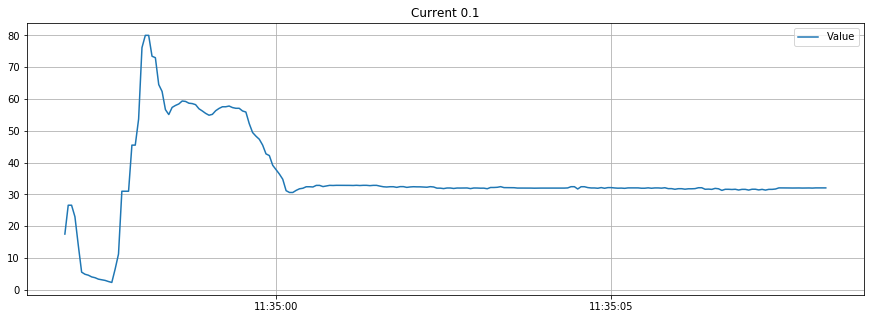

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 11:54:30' and '2019-10-14 11:54:50' ORDER BY DataSavedTime ASC


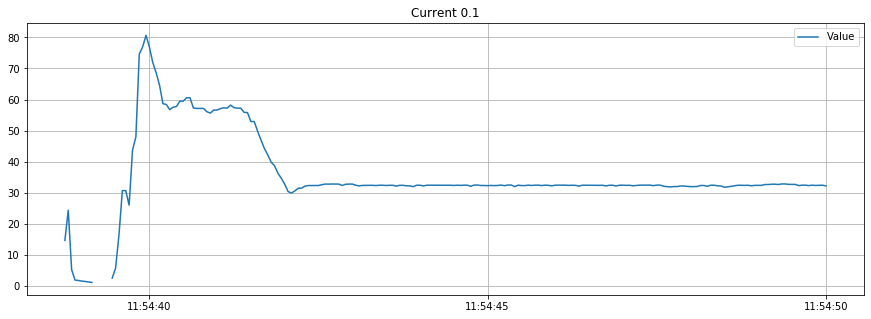

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 12:57:51.400000' and '2019-10-14 12:58:11.400000' ORDER BY DataSavedTime ASC


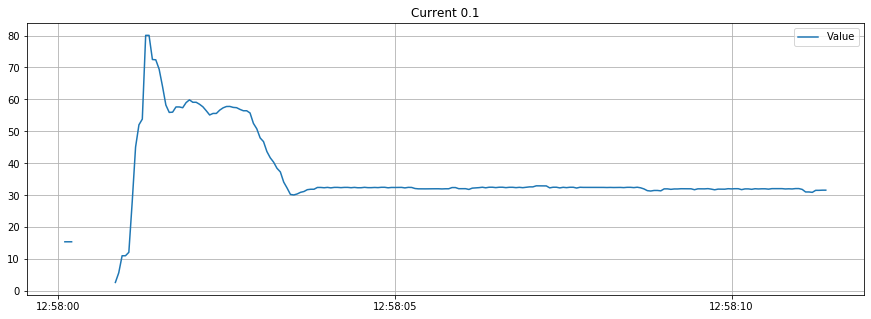

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 12:59:28.500000' and '2019-10-14 12:59:48.500000' ORDER BY DataSavedTime ASC


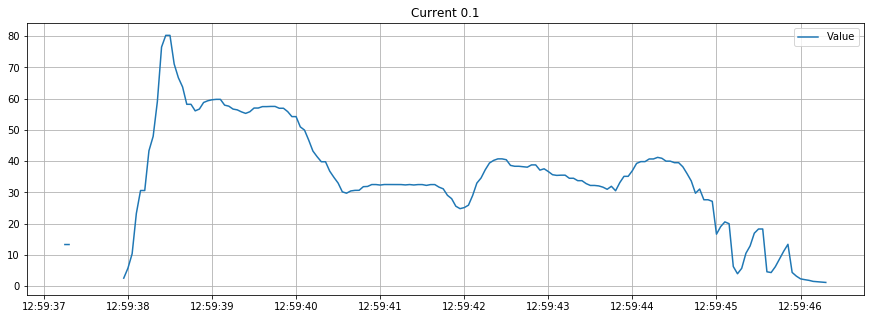

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 12:59:28.600000' and '2019-10-14 12:59:48.600000' ORDER BY DataSavedTime ASC


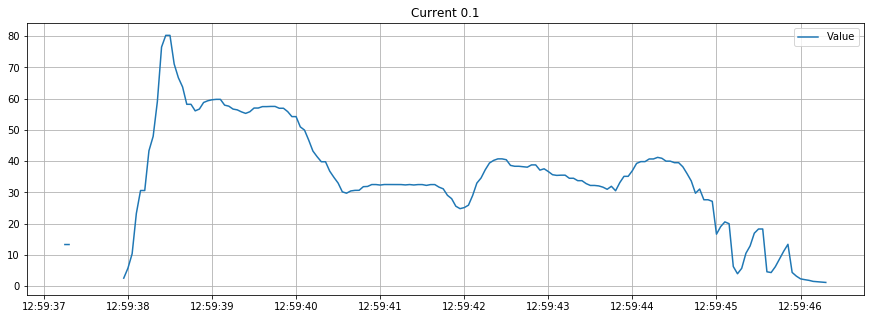

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 13:05:48.300000' and '2019-10-14 13:06:08.300000' ORDER BY DataSavedTime ASC


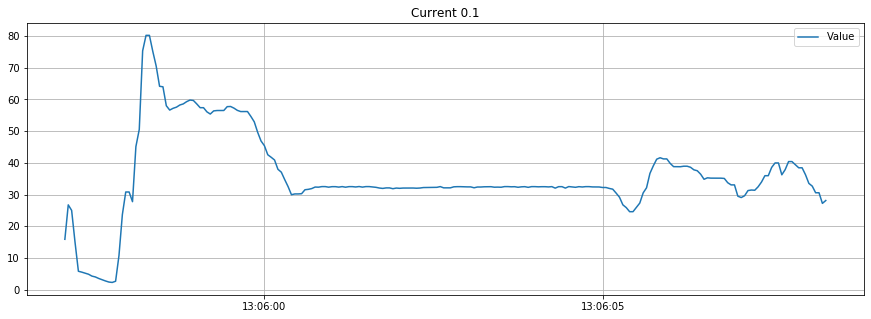

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 13:05:48.400000' and '2019-10-14 13:06:08.400000' ORDER BY DataSavedTime ASC


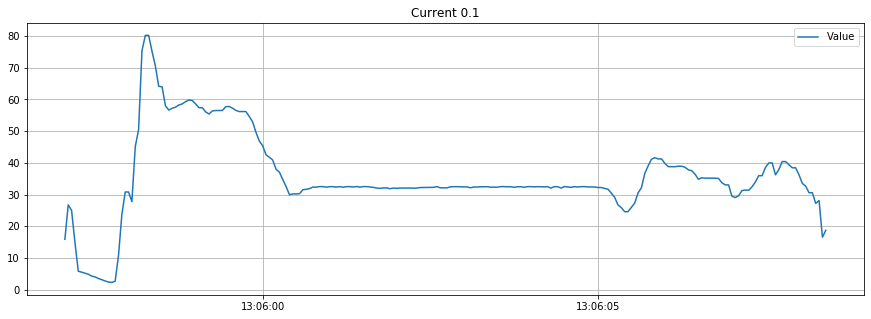

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 14:40:29' and '2019-10-14 14:40:49' ORDER BY DataSavedTime ASC


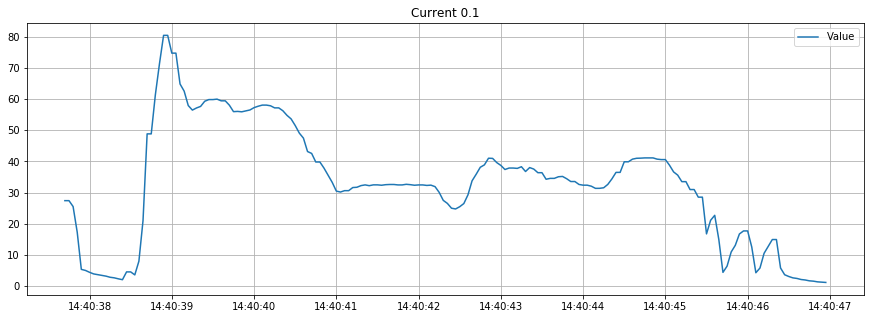

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 15:06:07.900000' and '2019-10-14 15:06:27.900000' ORDER BY DataSavedTime ASC


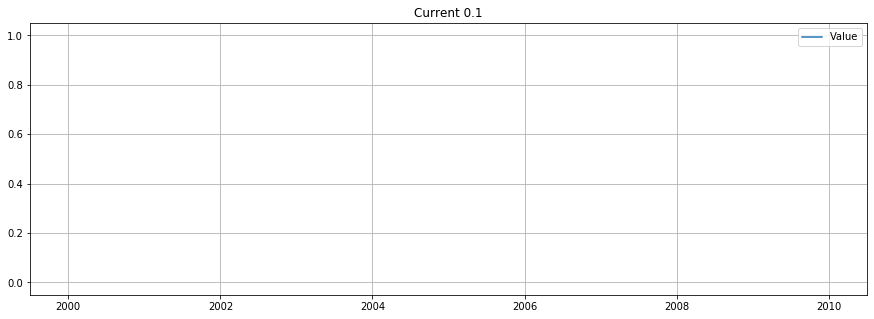

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 16:18:07.400000' and '2019-10-14 16:18:27.400000' ORDER BY DataSavedTime ASC


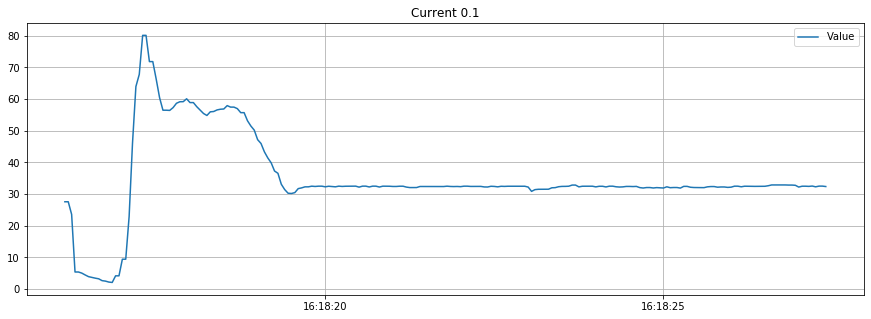

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 16:30:24.100000' and '2019-10-14 16:30:44.100000' ORDER BY DataSavedTime ASC


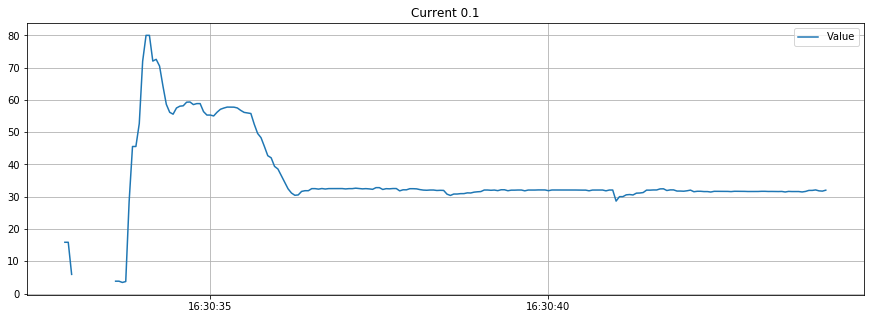

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 16:30:24.200000' and '2019-10-14 16:30:44.200000' ORDER BY DataSavedTime ASC


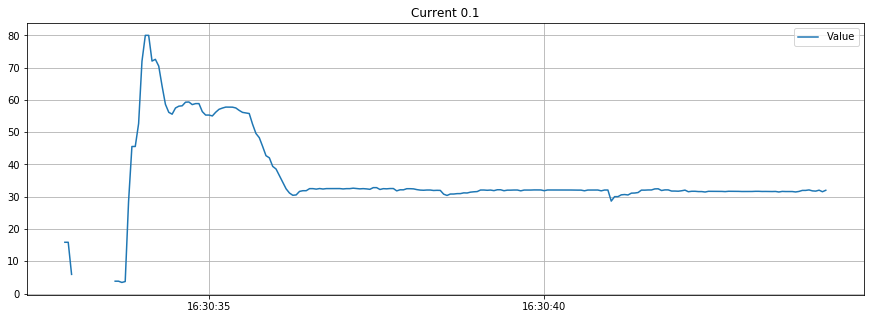

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 17:23:39.900000' and '2019-10-14 17:23:59.900000' ORDER BY DataSavedTime ASC


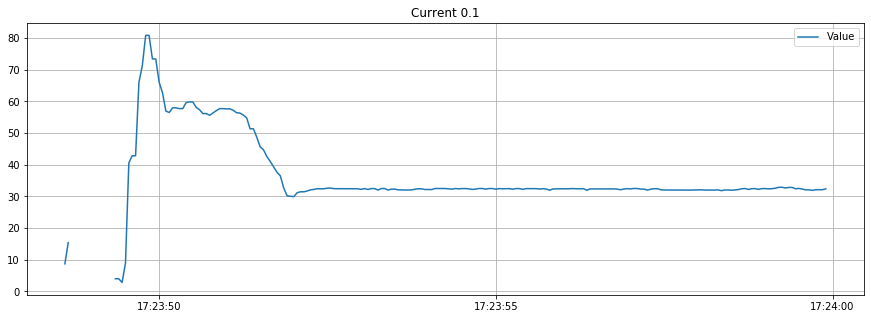

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 17:30:20.500000' and '2019-10-14 17:30:40.500000' ORDER BY DataSavedTime ASC


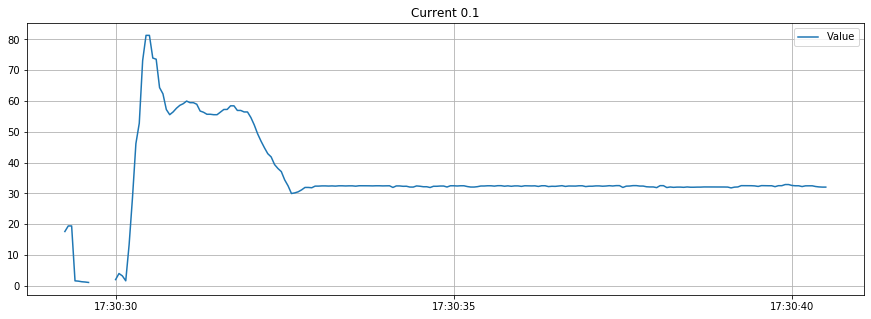

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 17:30:20.600000' and '2019-10-14 17:30:40.600000' ORDER BY DataSavedTime ASC


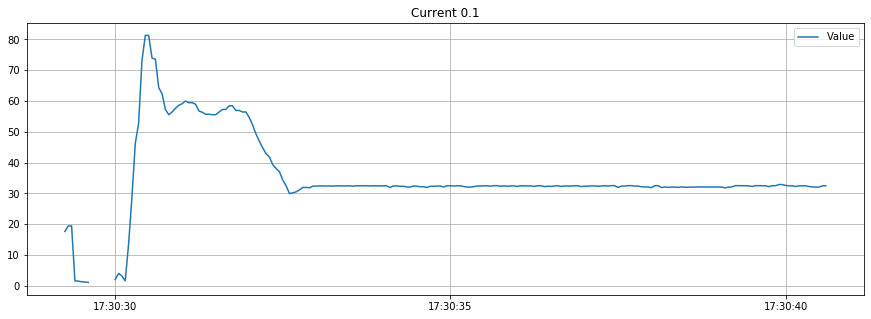

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 18:00:34' and '2019-10-14 18:00:54' ORDER BY DataSavedTime ASC


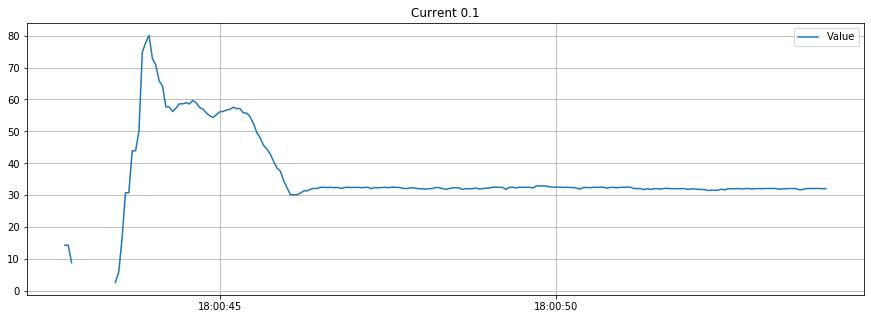

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-14 18:54:20.700000' and '2019-10-14 18:54:40.700000' ORDER BY DataSavedTime ASC


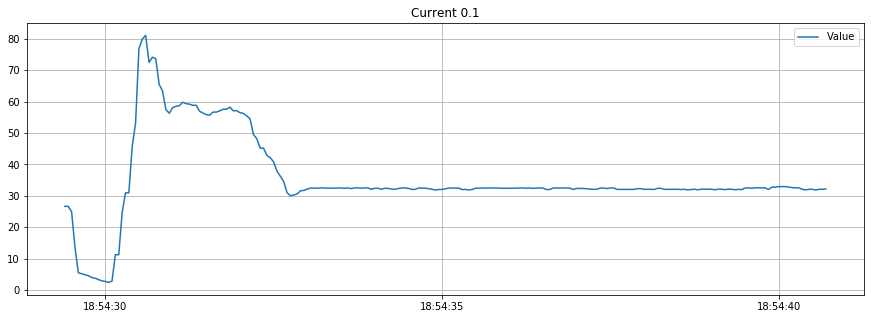

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-15 08:27:11.700000' and '2019-10-15 08:27:31.700000' ORDER BY DataSavedTime ASC


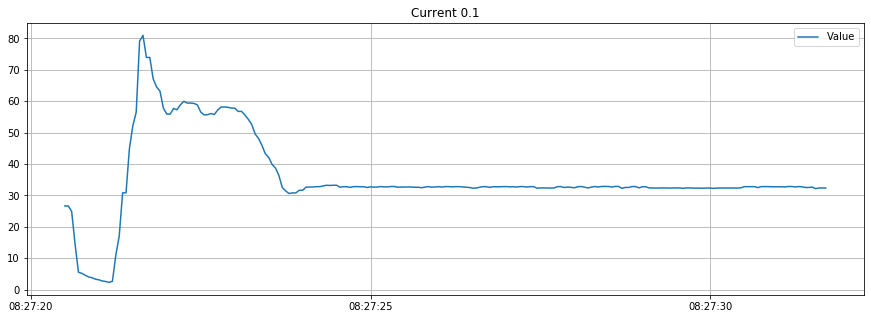

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-15 08:29:47.600000' and '2019-10-15 08:30:07.600000' ORDER BY DataSavedTime ASC


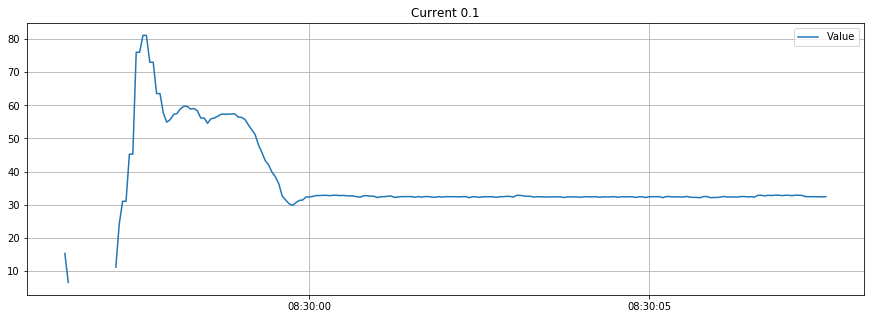

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-15 08:29:47.700000' and '2019-10-15 08:30:07.700000' ORDER BY DataSavedTime ASC


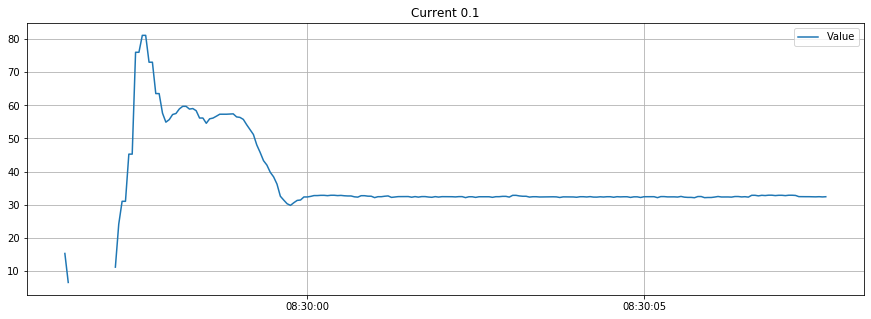

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-15 08:36:56.200000' and '2019-10-15 08:37:16.200000' ORDER BY DataSavedTime ASC


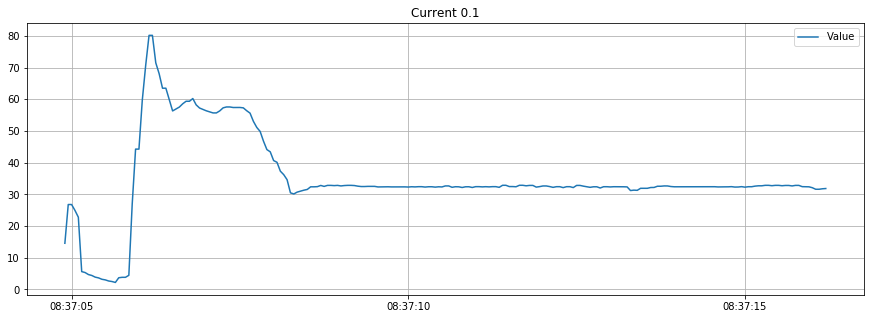

SELECT DataSavedTime, Item005 FROM HisItemCurrHalf         WHERE DataSavedTime         BETWEEN '2019-10-15 08:36:56.300000' and '2019-10-15 08:37:16.300000' ORDER BY DataSavedTime ASC


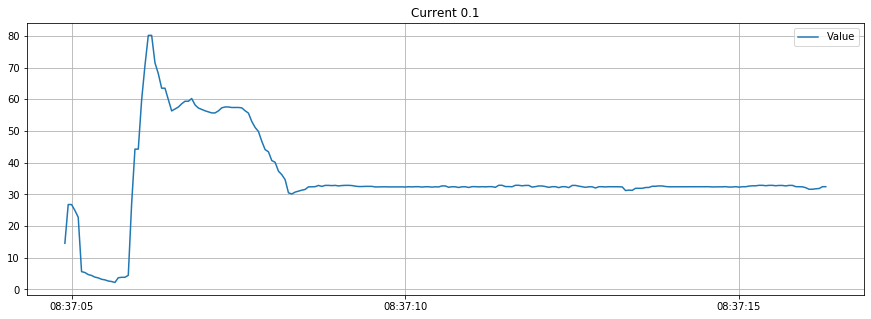

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [12]:
conn = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)
curs = conn.cursor()

for sql in sqls:
    curs.execute(sql)
    rows=curs.fetchall()

    data = list(rows)
    df = pd.DataFrame(data)

    df.columns = ['DataSavedTime', 'Item005']
    print(sql)
    plt.figure(figsize=(15,5))
    plt.plot(df['DataSavedTime'], df['Item005'], label="Value")
    plt.legend(loc='best')
    plt.title("Current 0.1")
    plt.grid()
    plt.show()

conn.close()